# Data Preparation

## I. Import Libraries

In [1]:
import numpy as np
import pandas as pd

## II. Import Data
The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2014 by Lending Club: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used a version available on kaggle.com. A newer version of this dataset is available here: https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv

In [2]:
#loan_data =pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv')  # use this after saving file on gdrive if using colab

loan_data =pd.read_csv('loan_data_2007_2014.csv') 
# use this if using sagemaker lab. csv file only has to be in the same folder as this notebook

/tmp/ipykernel_215/980873448.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data =pd.read_csv('loan_data_2007_2014.csv')


## III. Initial Data Exploration

In [3]:
# Display all the columns of the dataset
pd.options.display.max_columns = None

In [4]:
loan_data

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
0                4975.0   36 months     10.65       162.87     B        B2   
1                2500.0   60 months     15.27        59.83     C        C4   
2                2400.0   36 months     15.96        84.33     C        C5   
3               10000.0   36 months     13.49       339.31     C        C1   
4                3000.0   60 months     12.69        67.79     B        B5   
...                 ...         ...       ...          ...   ...       ...   
466280          18400.0   60 months     14.47       432.64     C        C2   
466281          22000.0   60 months     19.97       582.50     D        D5   
466282          20700.0   60 months     16.99       514.34     D        D1   
466283           2000.0   36 months      7.90        62.59     A        A4   
466284           9975.0   36 months     19.20       367.58     D        D3   

                                    emp_title emp_length home_ownership  \
0                                         NaN  10+ years           RENT   
1                                       Ryder   < 1 year           RENT   
2                                         NaN  10+ years           RENT   
3                         AIR RESOURCES BOARD  10+ years           RENT   
4                    University Medical Group     1 year           RENT   
...                                       ...        ...            ...   
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                    NaN  10+ years       MORTGAGE   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
0          24000.0            Verified  Dec-11   Fully Paid          n   
1          30000.0     Source Verified  Dec-11  Charged Off          n   
2          12252.0        Not Verified  Dec-11   Fully Paid          n   
3          49200.0     Source Verified  Dec-11   Fully Paid          n   
4          80000.0     Source Verified  Dec-11      Current          n   
...            ...                 ...     ...          ...        ...   
466280    110000.0     Source Verified  Jan-14      Current          n   
466281     78000.0            Verified  Jan-14  Charged Off          n   
466282     46000.0            Verified  Jan-14      Current          n   
466283     83000.0            Verified  Jan-14   Fully Paid          n   
466284     46000.0            Verified  Jan-14      Current          n   

                                                      url  \
0       https://www.lendingclub.com/browse/loanDetail....   
1       https://www.lendingclub.com/browse/loanDetail....   
2       https://www.lendingclub.com/browse/loanDetail....   
3       https://www.lendingclub.com/browse/loanDetail....   
4       https://www.lendingclub.com/browse/loanDetail....   
...                                                   ...   
466280  https://www.lendingclub.com/browse/loanDetail....   


In [5]:
loan_data.head() # Shows the top 5 rows

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [6]:
loan_data.tail() # Shows the bottom 5 rows

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
466280          18400.0   60 months     14.47       432.64     C        C2   
466281          22000.0   60 months     19.97       582.50     D        D5   
466282          20700.0   60 months     16.99       514.34     D        D1   
466283           2000.0   36 months      7.90        62.59     A        A4   
466284           9975.0   36 months     19.20       367.58     D        D3   

                                    emp_title emp_length home_ownership  \
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                    NaN  10+ years       MORTGAGE   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
466280    110000.0     Source Verified  Jan-14      Current          n   
466281     78000.0            Verified  Jan-14  Charged Off          n   
466282     46000.0            Verified  Jan-14      Current          n   
466283     83000.0            Verified  Jan-14   Fully Paid          n   
466284     46000.0            Verified  Jan-14      Current          n   

                                                      url  \
466280  https://www.lendingclub.com/browse/loanDetail....   
466281  https://www.lendingclub.com/browse/loanDetail....   
466282  https://www.lendingclub.com/browse/loanDetail....   
466283  https://www.lendingclub.com/browse/loanDetail....   
466284  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
466280                                                NaN  debt_consolidation   
466281                                                NaN  debt_consolidation   
466282    Borrower added on 12/06/13 > I am going to c...  debt_consolidation   
466283                                                NaN         credit_card   
466284    Borrower added on 12/04/13 > I will like a l...               other   

                          title zip_code addr_state    dti  delinq_2yrs  \
466280       Debt consolidation    773xx         TX  19.85          0.0   
466281       Debt consolidation    377xx         TN  18.45          0.0   
466282       Debt consolidation    458xx         OH  25.65          0.0   
466283  Credit card refinancing    913xx         CA   5.39          3.0   
466284                    Other    950xx         CA  22.78          1.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
466280           Apr-03             2.0                     NaN   
466281           Jun-97             5.0                     NaN   
466282           Dec-01             2.0                    65.0   
466283           Feb-03             1.0                    13.0   
466284           Feb-00             0.0                     9.0   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
466280                     NaN      18.0      0.0      23208        77.6   
466281                   116.0      18.0      1.0      18238        46.3   
466282                     NaN      18.0      0.0       6688        51.1   
466283                     NaN      21.0      0.0      11404        21.5   
466284                     NaN       6.0      0.0      11325        70.8   

        total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \


In [7]:
# Displays all column names.
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [8]:
# Displays column names, complete (non-missing) cases per column, and datatype per column.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [9]:
# Returns summary statistics for numerical featutures
loan_data.describe()

Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.000000      8000.000000      10.990000     256.690000   
50%     12000.000000     12000.000000      13.660000     379.890000   
75%     20000.000000     19950.000000      16.490000     566.580000   
max     35000.000000     35000.000000      26.060000    1409.990000   

         annual_inc            dti    delinq_2yrs  inq_last_6mths  \
count  4.662810e+05  466285.000000  466256.000000   466256.000000   
mean   7.327738e+04      17.218758       0.284678        0.804745   
std    5.496357e+04       7.851121       0.797365        1.091598   
min    1.896000e+03       0.000000       0.000000        0.000000   
25%    4.500000e+04      11.360000       0.000000        0.000000   
50%    6.300000e+04      16.870000       0.000000        0.000000   
75%    8.896000e+04      22.780000       0.000000        1.000000   
max    7.500000e+06      39.990000      29.000000       33.000000   

       mths_since_last_delinq  mths_since_last_record       open_acc  \
count           215934.000000            62638.000000  466256.000000   
mean                34.104430               74.306012      11.187069   
std                 21.778487               30.357653       4.987526   
min                  0.000000                0.000000       0.000000   
25%                 16.000000               53.000000       8.000000   
50%                 31.000000               76.000000      10.000000   
75%                 49.000000              102.000000      14.000000   
max                188.000000              129.000000      84.000000   

             pub_rec     revol_bal     revol_util      total_acc  \
count  466256.000000  4.662850e+05  465945.000000  466256.000000   
mean        0.160564  1.623020e+04      56.176947      25.064430   
std         0.510863  2.067625e+04      23.732628      11.600141   
min         0.000000  0.000000e+00       0.000000       1.000000   
25%         0.000000  6.413000e+03      39.200000      17.000000   
50%         0.000000  1.176400e+04      57.600000      23.000000   
75%         0.000000  2.033300e+04      74.700000      32.000000   
max        63.000000  2.568995e+06     892.300000     156.000000   

           out_prncp  out_prncp_inv    total_pymnt  total_pymnt_inv  \
count  466285.000000  466285.000000  466285.000000    466285.000000   
mean     4410.062342    4408.452258   11540.686220     11469.892747   
std      6355.078769    6353.198001    8265.627112      8254.157579   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       0.000000    5552.125349      5499.250000   
50%       441.470000     441.380000    9419.250943      9355.430000   
75%      7341.650000    7338.390000   15308.158460     15231.310000   
max     32160.380000   32160.380000   57777.579870     57777.580000   

       total_rec_prncp  total_rec_int  total_rec_late_fee     recoveries  \
count    466285.000000  466285.000000       466285.000000  466285.000000   
mean       8866.014657    2588.677225            0.650129      85.344211   
std        703

## IV. Pre-processing

### 1. emp_length --> emp_length_int

In [10]:
# Check all unique values in a column
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

As seen above there are several values containing symbols like + and <. We will use str.replace to clean these values.
We will create a new column named emp_length_int in which we will clear and store emp_length

In [11]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '') # replace + years with empty string
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0)) # replace <1 year with 0 as a string
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0)) # replace n/a with 0 as a string
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')  # replace with empty string
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '') # replae with empty string
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('10+ years', '') # replace + years with empty string
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('+', '') # replace + years with empty string

In [12]:
loan_data['emp_length_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [13]:
# Checks the datatype of a single element of a column.
type(loan_data['emp_length_int'][0])

str

In [14]:
# Transforms the values to numeric.
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [15]:
# Checks the datatype of a single element of a column.
type(loan_data['emp_length_int'][0])

numpy.float64

### 2. earliest_cr_line --> mths_since_earliest_cr_line

In [16]:
# Check earliest_cr_line column
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [17]:
# Step 1: Convert 'earliest_cr_line' to datetime
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')

In [18]:
# Step 2: Calculate the difference in days between '2017-12-01' and 'earliest_cr_line_date'
difference_in_days = pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

In [19]:
# Step 3: Convert the difference to months and round the values
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric(difference_in_days.dt.days / 30))

In [20]:
# Shows some descriptive statisics for the values of a column.
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.979220
std          95.344015
min        -621.000000
25%         186.000000
50%         228.000000
75%         289.000000
max         596.000000
Name: mths_since_earliest_cr_line, dtype: float64

Dates from 1969 and before are not being converted well, i.e., they have become 2069 leading to negative differences  being calculated. This has to be fixed.

In [21]:
# To identify the rows returning negative values, take three columns from the dataframe.
# Then, we display them only for the rows where a variable has negative value.
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580             Sep-62            2062-09-01                       -545.0
1770             Sep-68            2068-09-01                       -618.0
2799             Sep-64            2064-09-01                       -569.0
3282             Sep-67            2067-09-01                       -606.0
3359             Feb-65            2065-02-01                       -574.0
...                 ...                   ...                          ...
464003           Jan-68            2068-01-01                       -610.0
464260           Jul-66            2066-07-01                       -591.0
465100           Oct-67            2067-10-01                       -607.0
465500           Sep-67            2067-09-01                       -606.0
465655           Jan-56            2056-01-01                       -464.0

[1169 rows x 3 columns]

In [22]:
# Step 4: Correct the negative values by adding 1200
loan_data['mths_since_earliest_cr_line'] = loan_data['mths_since_earliest_cr_line'].apply(lambda x: x + 1200 if x < 0 else x)

In [23]:
# Step 5: Display descriptive statistics
print(loan_data['mths_since_earliest_cr_line'].describe())

count    466256.000000
mean        245.987867
std          88.002269
min          74.000000
25%         187.000000
50%         229.000000
75%         289.000000
max         882.000000
Name: mths_since_earliest_cr_line, dtype: float64


### 3. term --> term_int

In [24]:
loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [25]:
# Descriptive statistics
loan_data['term'].describe()

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

In [26]:
# Replace unwanted sub-strings and capture results in a new column
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')

In [27]:
loan_data['term_int']

0          36
1          60
2          36
3          36
4          60
         ... 
466280     60
466281     60
466282     60
466283     36
466284     36
Name: term_int, Length: 466285, dtype: object

In [28]:
# Sanity check of data type of a random element
type(loan_data['term_int'][3])

str

In [29]:
# Change the type of the column to numeric
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [30]:
# Sanity check of data type of a random elemen
type(loan_data['term_int'][3])

numpy.int64

### 4. issue_d --> mths_since_issue_d

In [31]:
# check issue_d
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [32]:
# Assume we are now in December 2017
# Extracts the date and the time from a string variable.
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

In [33]:
# Compute difference between dates in months and cast to numeric and save in a new column
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']).dt.days/30))

In [34]:
# Get statistics of new column as a sanity check
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         52.265887
std          14.385250
min          37.000000
25%          42.000000
50%          48.000000
75%          58.000000
max         128.000000
Name: mths_since_issue_d, dtype: float64

This does not seem to have anything alarming like we saw before so this is fine

## V. Processing discrete features

In [35]:
# Displays column names, complete (non-missing) cases per column, and datatype per column.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

There are several discrete variables:

1. grade
2. sub_grade
3. home_ownership
4. verification_status
5. loan_status
6. purpose
7. addr_state
8. initial_list_status.



In [36]:
loan_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [37]:
# pd.get_dummies does one-hot encoding for a column with discrete values
pd.get_dummies(loan_data['grade'], dtype='int')

A  B  C  D  E  F  G
0       0  1  0  0  0  0  0
1       0  0  1  0  0  0  0
2       0  0  1  0  0  0  0
3       0  0  1  0  0  0  0
4       0  1  0  0  0  0  0
...    .. .. .. .. .. .. ..
466280  0  0  1  0  0  0  0
466281  0  0  0  1  0  0  0
466282  0  0  0  1  0  0  0
466283  1  0  0  0  0  0  0
466284  0  0  0  1  0  0  0

[466285 rows x 7 columns]

The column names assigned to dummy columns are meaningless.
Let us give them some meaningful names


In [38]:
# using prefix and prefix_sep parameters allows giving columns a meaningful name
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':',dtype='int')

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0             0        1        0        0        0        0        0
1             0        0        1        0        0        0        0
2             0        0        1        0        0        0        0
3             0        0        1        0        0        0        0
4             0        1        0        0        0        0        0
...         ...      ...      ...      ...      ...      ...      ...
466280        0        0        1        0        0        0        0
466281        0        0        0        1        0        0        0
466282        0        0        0        1        0        0        0
466283        1        0        0        0        0        0        0
466284        0        0        0        1        0        0        0

[466285 rows x 7 columns]

In [39]:
# Repeat the above code for all discrete features
# Code below creates a dummy variable for each discrete feature and saves it to a list
# Naming convention for dummy variables is <feature name>: value

loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':',dtype='int'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':',dtype='int'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':',dtype='int'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':',dtype='int'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':',dtype='int'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':',dtype='int'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':',dtype='int'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':',dtype='int')]

In [40]:
# Join the elements of the list to create a dataframe
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [41]:
# sanity check
type (loan_data_dummies)

pandas.core.frame.DataFrame

In [42]:
# Join the above dataframe with the original dataframe
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [43]:
# Sanity check
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [44]:
# Sanity check
loan_data.shape

(466285, 207)

### VI. Processing missing values

In [45]:
# Check for missing values
loan_data.isnull()

Unnamed: 0     id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0            False  False      False      False        False            False   
1            False  False      False      False        False            False   
2            False  False      False      False        False            False   
3            False  False      False      False        False            False   
4            False  False      False      False        False            False   
...            ...    ...        ...        ...          ...              ...   
466280       False  False      False      False        False            False   
466281       False  False      False      False        False            False   
466282       False  False      False      False        False            False   
466283       False  False      False      False        False            False   
466284       False  False      False      False        False            False   

         term  int_rate  installment  grade  sub_grade  emp_title  emp_length  \
0       False     False        False  False      False       True       False   
1       False     False        False  False      False      False       False   
2       False     False        False  False      False       True       False   
3       False     False        False  False      False      False       False   
4       False     False        False  False      False      False       False   
...       ...       ...          ...    ...        ...        ...         ...   
466280  False     False        False  False      False      False       False   
466281  False     False        False  False      False      False       False   
466282  False     False        False  False      False      False       False   
466283  False     False        False  False      False      False       False   
466284  False     False        False  False      False       True       False   

        home_ownership  annual_inc  verification_status  issue_d  loan_status  \
0                False       False                False    False        False   
1                False       False                False    False        False   
2                False       False                False    False        False   
3                False       False                False    False        False   
4                False       False                False    False        False   
...                ...         ...                  ...      ...          ...   
466280           False       False                False    False        False   
466281           False       False                False    False        False   
466282           False       False                False    False        False   
466283           False       False                False    False        False   
466284           False       False                False    False        False   

        pymnt_plan    url   desc  purpose  title  zip_code  addr_state    dti  \
0            False  False  False    False  False     False       False  False   
1            False  False  False    False  False     False       False  False   
2            False  False   True    False  False     False       False  False   
3            False  False  False    False  False     False       False  False   
4            False  False  False    False  False     False       False  False   
...            ...    ...    ...      ...    ...       ...         ...    ...   
466280       False  False   True    False  False     False       False  False   
466281       False  False   True    False  False     False       False  False   
466282       False  False  False    False  False     False       False  False   
466283       False  False   True    False  False     False       False  False   
466284       False  False  False    False  False     False       False  False   

        delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0             False             Fal

This returns the entire dataframe. We need a count of nulls by feature

In [46]:
# Sets the pandas dataframe options to display all columns/ rows.
pd.options.display.max_rows = None
# Compute count of nulls in each column
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

### 1. total_rev_hi_lim

In [47]:
# Look at total_rev_hi_lim. it has 70276 nulls
loan_data['total_rev_hi_lim'].isnull().sum()

70276

In [48]:
# funded_amnt does not have any missing values
loan_data['funded_amnt'].isnull().sum()

0

Total revolving high credit is another name for credit limit, so it makes sense to replace the missing values with funded_amt.
This is an example of very domain knowledge/experience is helpful.
A good data scientist must know when he/she should consult a domain expert.

In [49]:
# Replace missing values in total_rev_hi_lim with values from
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)

In [50]:
# sanity check
loan_data['total_rev_hi_lim'].isnull().sum()

0

### 2. annual_inc (mean imputation)

In [51]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['annual_inc'].isnull().sum()

0

### 3. columns representing counts or durations (median imputation)

In [52]:
# Replace missing values with the median for the specified columns
columns_to_impute = [
    'mths_since_earliest_cr_line',
    'acc_now_delinq',
    'total_acc',
    'pub_rec',
    'open_acc',
    'inq_last_6mths',
    'delinq_2yrs',
    'emp_length_int'
]

for column in columns_to_impute:
    median_value = loan_data[column].median()
    loan_data[column].fillna(median_value, inplace=True)

# Check if there are any remaining missing values
print(loan_data[columns_to_impute].isnull().sum())

mths_since_earliest_cr_line    0
acc_now_delinq                 0
total_acc                      0
pub_rec                        0
open_acc                       0
inq_last_6mths                 0
delinq_2yrs                    0
emp_length_int                 0
dtype: int64


In [53]:
# Save pre-processed data into a pkl file
pd.to_pickle(loan_data, 'loan_data_2007_2014_preprocessed.pkl')

# PD Model

Lets start by creating the dependent variable.
We discussed the good\bad loan and default\non-default definitions.


In [54]:
# Check values in loan_status column
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [55]:
# Chek distribution of values in loan_status column
loan_data['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

## Which values fit into our definition default?

The following should be treated as a default \ bad loan \ 0

Charged Off / Default / Late (31-120 days) / Does not meet the credit policy. Status:Charged Off

In [56]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

In [57]:
# loan_data['good_bad'] # sanity check
loan_data['good_bad'].head()

0    1
1    0
2    1
3    1
4    1
Name: good_bad, dtype: int64

## Separate the dependent and independent variables


In [58]:
loan_data_inputs=loan_data.drop('good_bad', axis = 1) # separate dataframe containing features (x)
loan_data_targets=loan_data['good_bad'] # separate the target variable

## I. Computing weight of evidence (WoE), information value (IV) and plotting of results of discrete features

In [59]:
# Copy data into 2 new dataframes
df_inputs_prepr = loan_data_inputs
df_targets_prepr = loan_data_targets

In [60]:
# WoE function for discrete unordered variables
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    #df['diff_prop_good'] = df['prop_good'].diff().abs()
    #df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [61]:
# run the following if seaborn is not installed
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Sets default style of the graphs to the seaborn style.

In [63]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'b')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

### 1. grade

In [64]:
# Check
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     A   74867   0.961305    0.160561   71970.0   2897.0     0.173289   
1     B  136929   0.921426    0.293659  126170.0  10759.0     0.303792   
2     C  125293   0.885197    0.268705  110909.0  14384.0     0.267047   
3     D   76888   0.845906    0.164895   65040.0  11848.0     0.156603   
4     E   35757   0.805241    0.076685   28793.0   6964.0     0.069328   
5     F   13229   0.758712    0.028371   10037.0   3192.0     0.024167   
6     G    3322   0.721854    0.007124    2398.0    924.0     0.005774   

   prop_n_bad       WoE        IV  
0    0.056840  1.114730  0.290782  
1    0.211093  0.364043  0.290782  
2    0.282216 -0.055251  0.290782  
3    0.232460 -0.395001  0.290782  
4    0.136635 -0.678466  0.290782  
5    0.062628 -0.952214  0.290782  
6    0.018129 -1.144166  0.290782

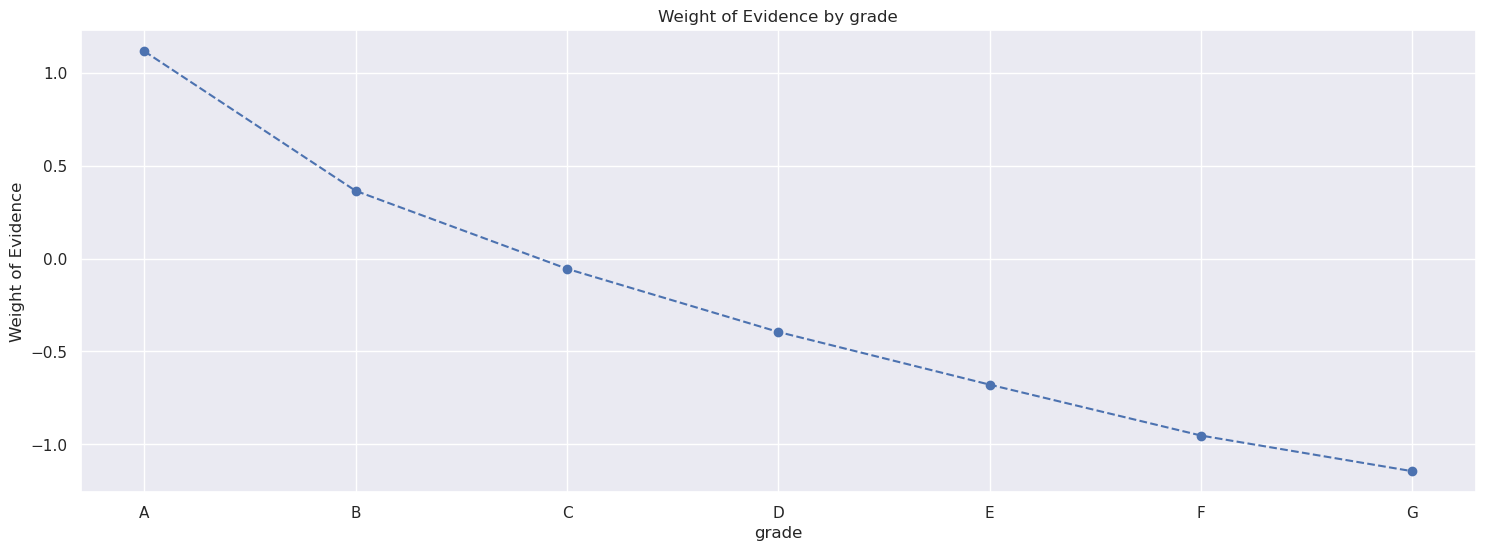

In [65]:
# Test the function
plot_by_woe(df_temp)

### 2. home_ownership


In [66]:
# run woe_discrete function on home_ownership feature
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

home_ownership   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0            ANY       1   1.000000    0.000002       1.0      0.0   
1       MORTGAGE  235875   0.904017    0.505860  213235.0  22640.0   
2           NONE      50   0.840000    0.000107      42.0      8.0   
3          OTHER     182   0.791209    0.000390     144.0     38.0   
4            OWN   41704   0.891737    0.089439   37189.0   4515.0   
5           RENT  188473   0.873897    0.404201  164706.0  23767.0   

   prop_n_good  prop_n_bad       WoE   IV  
0     0.000002    0.000000       inf  inf  
1     0.513427    0.444200  0.144832  inf  
2     0.000101    0.000157 -0.439616  inf  
3     0.000347    0.000746 -0.765617  inf  
4     0.089544    0.088585  0.010764  inf  
5     0.396579    0.466312 -0.161980  inf

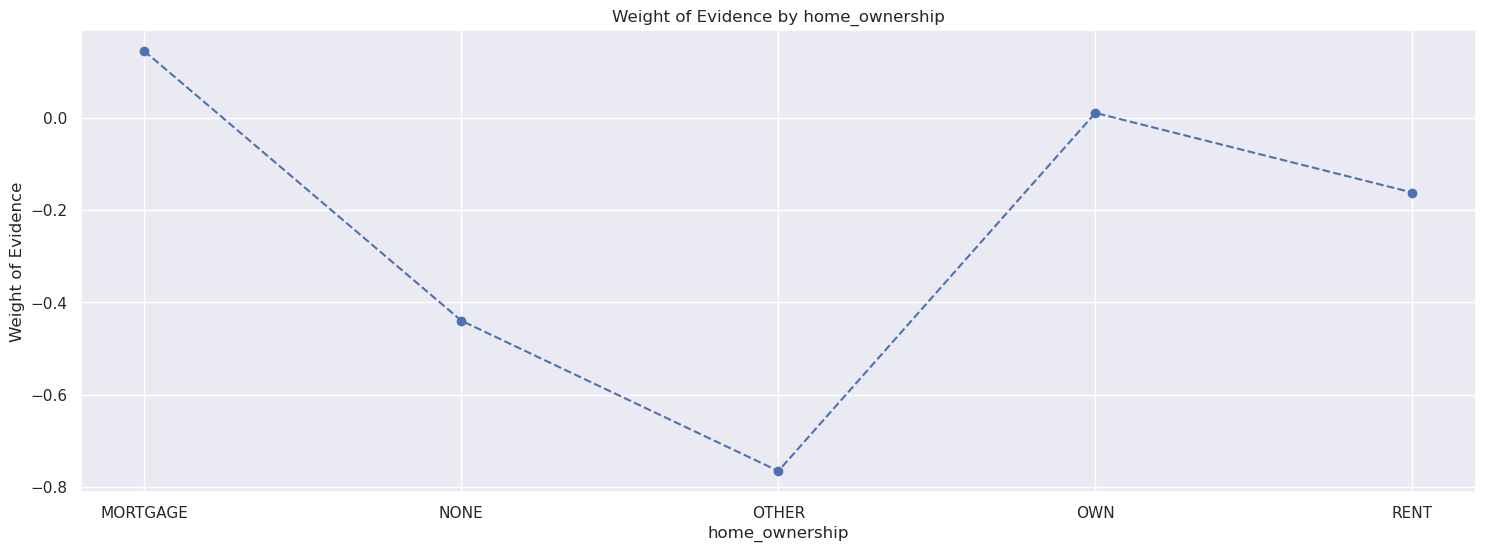

In [67]:
# Plot the graph
plot_by_woe(df_temp)

There are many categories with very few observations and many categories with very different "good" %.

Therefore, we create a new discrete variable where we combine some of the categories.

'OTHERS' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.

'ANY' are least risky but have very few observations. Conceptually, they belong to the same category. Also, their inclusion would not change anything.

We can combine them in one category, 'RENT_OTHER_NONE_ANY'.

We end up with 3 categories: 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.

This is somewhat arbitrary and one can create a different grouping too.


In [68]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])


'RENT_OTHER_NONE_ANY' is called a  reference category.

### 3. addr_state

In [69]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [70]:
# Compute  weight of evidence.
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
#Sort data by WoE
df_temp.sort_values(by=['WoE'], inplace= True)
df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
28         NE     14   0.428571    0.000030      6.0     8.0     0.000014   
12         IA     14   0.785714    0.000030     11.0     3.0     0.000026   
32         NV   6519   0.862862    0.013981   5625.0   894.0     0.013544   
11         HI   2487   0.873743    0.005334   2173.0   314.0     0.005232   
9          FL  31637   0.874640    0.067849  27671.0  3966.0     0.066626   
1          AL   5853   0.876474    0.012552   5130.0   723.0     0.012352   
33         NY  40242   0.883182    0.086303  35541.0  4701.0     0.085576   
18         LA   5489   0.883403    0.011772   4849.0   640.0     0.011675   
31         NM   2588   0.884467    0.005550   2289.0   299.0     0.005511   
35         OK   4117   0.884625    0.008829   3642.0   475.0     0.008769   
27         NC  12682   0.884876    0.027198  11222.0  1460.0     0.027020   
24         MO   7508   0.884923    0.016102   6644.0   864.0     0.015997   
20         MD  10974   0.885274    0.023535   9715.0  1259.0     0.023392   
30         NJ  18061   0.885665    0.038734  15996.0  2065.0     0.038515   
44         VA  14222   0.886092    0.030501  12602.0  1620.0     0.030343   
4          CA  71450   0.886396    0.153232  63333.0  8117.0     0.152493   
3          AZ  10712   0.888350    0.022973   9516.0  1196.0     0.022913   
22         MI  11549   0.888735    0.024768  10264.0  1285.0     0.024714   
43         UT   3428   0.888856    0.007352   3047.0   381.0     0.007337   
41         TN   5984   0.888870    0.012833   5319.0   665.0     0.012807   
2          AR   3488   0.889335    0.007480   3102.0   386.0     0.007469   
37         PA  16424   0.889978    0.035223  14617.0  1807.0     0.035195   
38         RI   2050   0.890732    0.004396   1826.0   224.0     0.004397   
34         OH  15237   0.891842    0.032677  13589.0  1648.0     0.032720   
17         KY   4438   0.891843    0.009518   3958.0   480.0     0.009530   
8          DE   1272   0.892296    0.002728   1135.0   137.0     0.002733   
23         MN   8158   0.892498    0.017496   7281.0   877.0     0.017531   
40         SD    980   0.892857    0.002102    875.0   105.0     0.002107   
19         MA  11072   0.893605    0.023745   9894.0  1178.0     0.023823   
15         IN   6525   0.894100    0.013994   5834.0   691.0     0.014047   
10         GA  14975   0.896361    0.032116  13423.0  1552.0     0.032320   
46         WA  10517   0.897689    0.022555   9441.0  1076.0     0.022732   
47         WI   5911   0.899171    0.012677   5315.0   596.0     0.012797   
36         OR   5949   0.899479    0.012758   5351.0   598.0     0.012884   
42         TX  36439   0.904251    0.078147  32950.0  3489.0     0.079337   
14         IL  18612   0.905652    0.039916  16856.0  1756.0     0.040586   
6          CT   7204   0.906302    0.015450   6529.0   675.0     0.015721   
26         MT   1396   0.906877    0.002994   1266.0   130.0     0.003048   
5          CO   9739   0.908615    0.020886   8849.0   890.0     0.021307   
39         SC   5583   0.908651    0.011973   5073.0   510.0     0.012215   
16         KS   4190   0.910501    0.008986   3815.0   375.0     0.009186   
45         VT    905   0.912707    0.001941    826.0    79.0     0.001989   
0          AK   1251   0.912870    0.002683   1142.0   109.0     0.002750   
25         MS   1226   0.914356    0.002629   1121.0   105.0     0.002699   
13         ID     12   0.916667    0.000026     11.0     1.0     0.000026   
29         NH   2232   0.917115    0.004787   2047.0   185.0     0.004929   
48         WV   2412   0.919569    0.005173   2218.0   194.0     0.005340   
49         WY   1128   0.926418    0.002419   1045.0    83.0     0.002516   
7          DC   1426   0.931978    0.003058   1329.0    97.0     0.003200   
21         ME      4   1.000000    0.000009      4.0     0.0     0.000010   

    prop_n_bad       WoE   IV  
28    0.000157 -2.385526  inf  
12    0.000

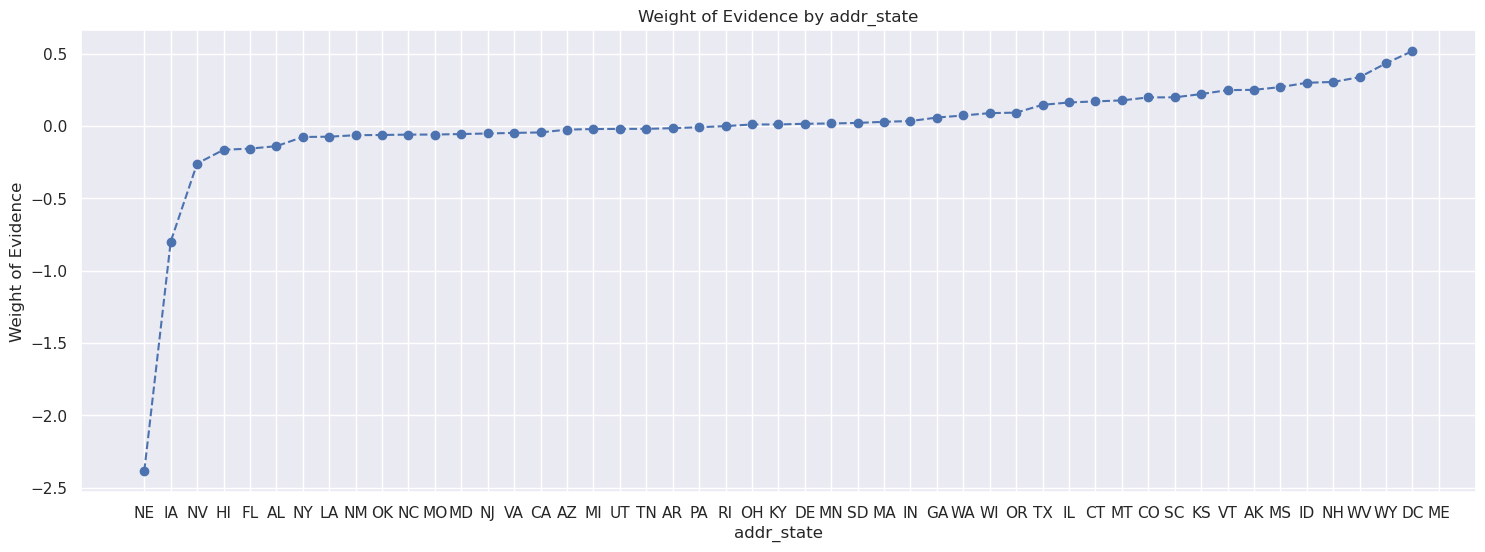

In [71]:
# Plot WoE
plot_by_woe(df_temp)

In [72]:
print (df_temp.shape)

(50, 10)


Note there is one missing stated named North Dakota (ND) which means that this dataset does not contain any samples from North Dakota. We must create a dummy variable for ND in case we have samples from ND in the future

In [73]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

The top 2 states (NE and IA) have 14 samples and bottom 2 states (ME and ID) also have very few samples.
We can club them into a category

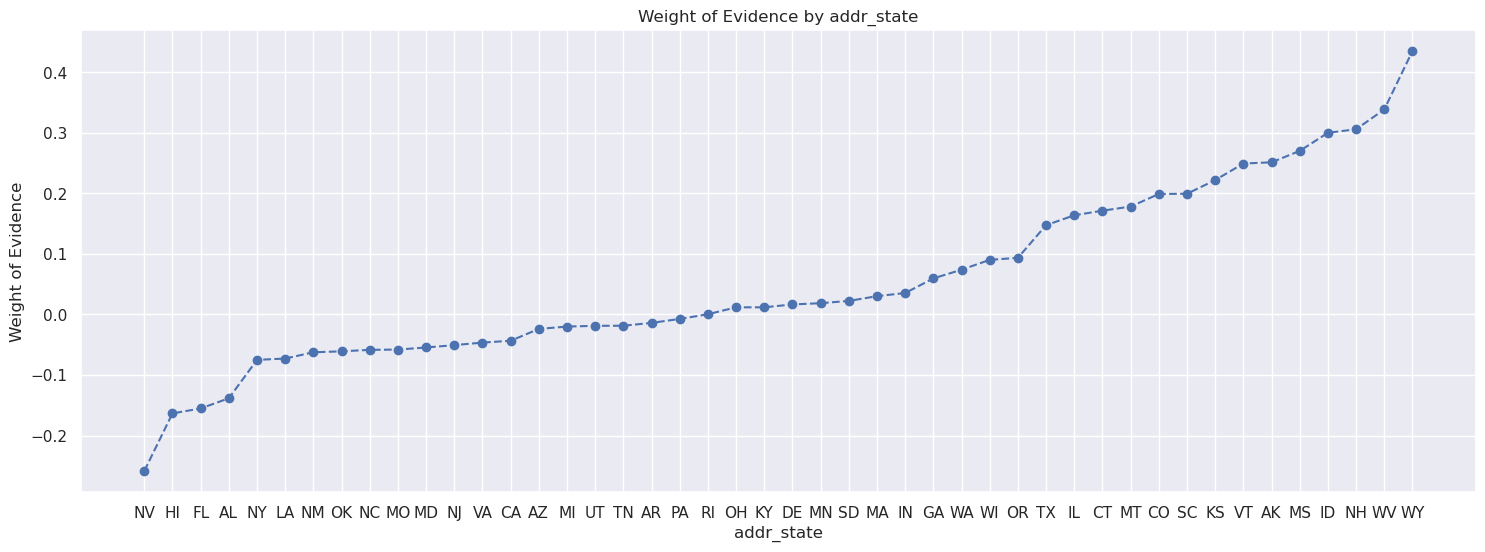

In [74]:
# Plot excluding first 2 and last 3 states
plot_by_woe(df_temp.iloc[2: -2, : ])

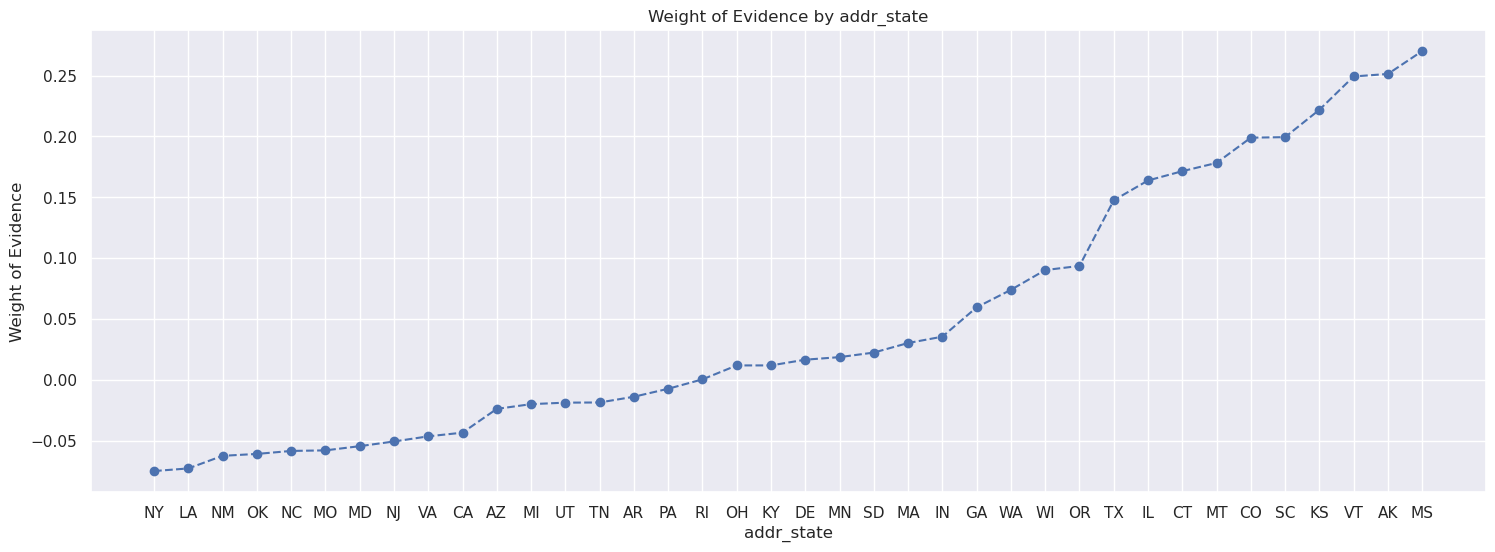

In [75]:
#Plot excluding first 5 and last 5 values
plot_by_woe(df_temp.iloc[6: -6, : ])

 We create the following categories:

 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL' # States with least information and therefore highest risk in a single cateory

 'NM' 'VA'

 'NY' # High number of samples (borrowers)

 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'

 'CA' # High number of samples (borrowers)

 'UT' 'KY' 'AZ' 'NJ' # Similar WoE also have similar number of observations (borrowers)

 'AR' 'MI' 'PA' 'OH' 'MN' # Similar WoE also have similar number of observations (borrowers)

 'RI' 'MA' 'DE' 'SD' 'IN' # Similar WoE also have similar number of observations (borrowers)

 'GA' 'WA' 'OR' # Similar WoE also have similar number of observations (borrowers)

 'WI' 'MT' # Similar WoE but a bit apart in number of observations (borrowers)

 'TX' # Large number of observation

 'IL' 'CT' ## Similar WoE and number of observations are similar

 'KS' 'SC' 'CO' 'VT' 'AK' 'MS' # Similar WoE and number of observations are similar

 'WV' 'NH' 'WY' 'DC' 'ME' 'ID' # States with low number of observations and therefore they are clubbed together

 'IA_NV_HI_ID_AL_FL' will be the reference category. This is the category with lowest weight of evidence

In [76]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                      
                                                          df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

### 4. verification_status

In [77]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

verification_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0        Not Verified  148237   0.905921    0.317911  134291.0  13946.0   
1     Source Verified  149993   0.895882    0.321677  134376.0  15617.0   
2            Verified  168055   0.872631    0.360413  146650.0  21405.0   

   prop_n_good  prop_n_bad       WoE        IV  
0     0.323346    0.273623  0.166972  0.020831  
1     0.323550    0.306408  0.054438  0.020831  
2     0.353104    0.419969 -0.173420  0.020831

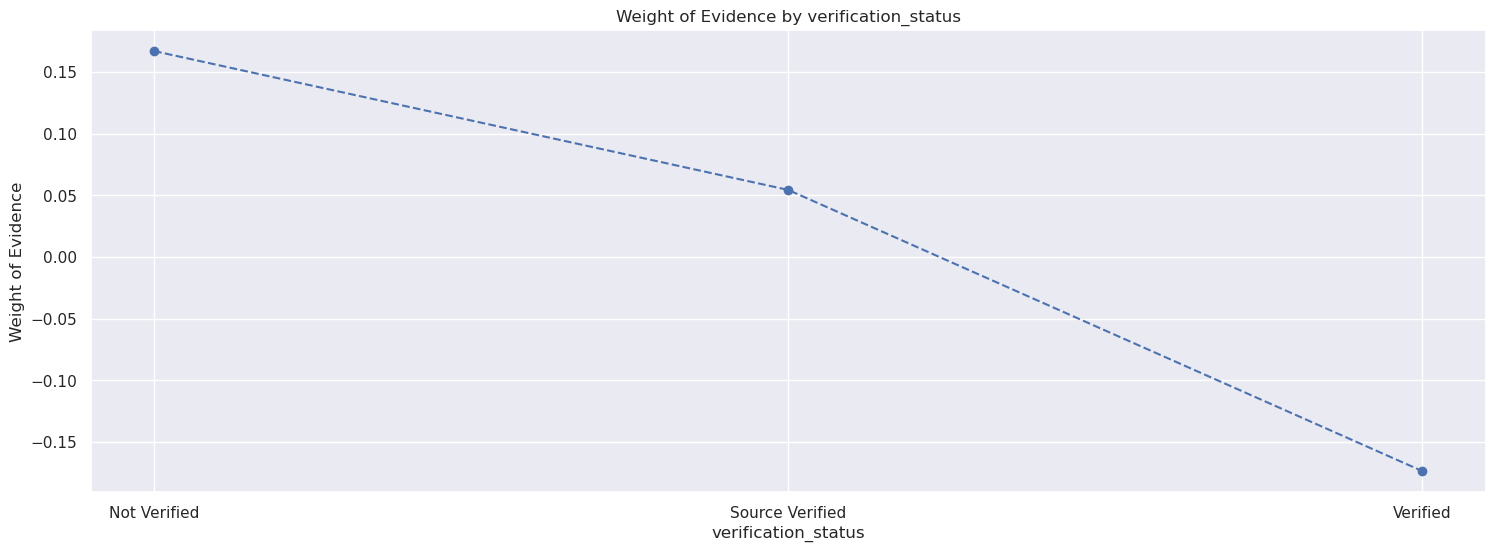

In [78]:
# plot WoE
plot_by_woe(df_temp)

Nothing left to do here.

### 5. purpose

In [79]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

purpose   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0                  car    5397   0.910876    0.011574    4916.0    481.0   
1          credit_card  104157   0.913774    0.223376   95176.0   8981.0   
2   debt_consolidation  274195   0.886690    0.588042  243126.0  31069.0   
3          educational     422   0.791469    0.000905     334.0     88.0   
4     home_improvement   26537   0.901835    0.056912   23932.0   2605.0   
5                house    2269   0.859850    0.004866    1951.0    318.0   
6       major_purchase    9828   0.904457    0.021077    8889.0    939.0   
7              medical    4602   0.866145    0.009870    3986.0    616.0   
8               moving    2994   0.847361    0.006421    2537.0    457.0   
9                other   23690   0.862009    0.050806   20421.0   3269.0   
10    renewable_energy     351   0.846154    0.000753     297.0     54.0   
11      small_business    7013   0.784258    0.015040    5500.0   1513.0   
12            vacation    2487   0.882187    0.005334    2194.0    293.0   
13             wedding    2343   0.878361    0.005025    2058.0    285.0   

    prop_n_good  prop_n_bad       WoE       IV  
0      0.011837    0.009437  0.226539  0.03698  
1      0.229165    0.176209  0.262772  0.03698  
2      0.585399    0.609579 -0.040475  0.03698  
3      0.000804    0.001727 -0.764040  0.03698  
4      0.057623    0.051111  0.119940  0.03698  
5      0.004698    0.006239 -0.283798  0.03698  
6      0.021403    0.018423  0.149910  0.03698  
7      0.009597    0.012086 -0.230548  0.03698  
8      0.006109    0.008966 -0.383790  0.03698  
9      0.049170    0.064138 -0.265764  0.03698  
10     0.000715    0.001059 -0.393096  0.03698  
11     0.013243    0.029685 -0.807190  0.03698  
12     0.005283    0.005749 -0.084535  0.03698  
13     0.004955    0.005592 -0.120843  0.03698

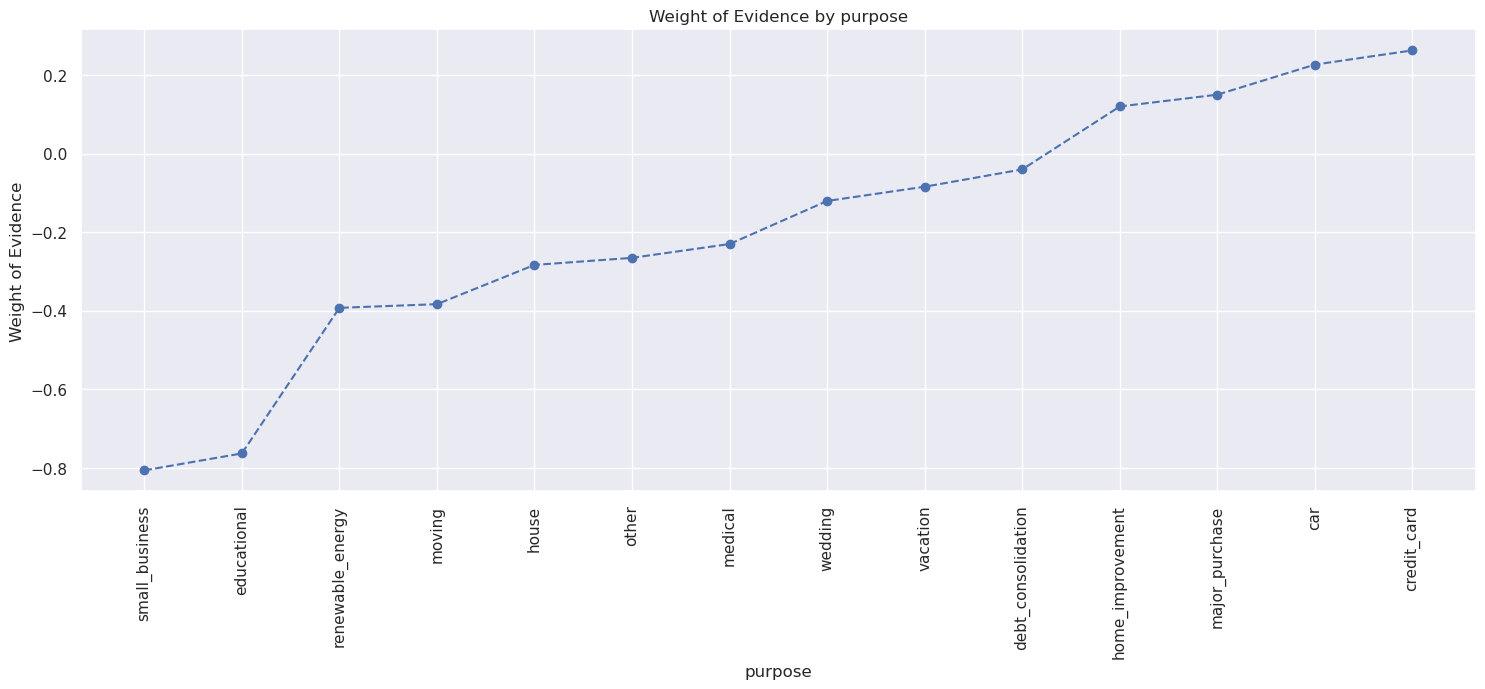

In [80]:
# plot WoE
df_temp.sort_values(by=['WoE'], inplace=True)
plot_by_woe(df_temp,90)

 We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.

 We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.

We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.

We leave 'debt_consolidtion' in a separate category.

We leave 'credit_card' in a separate category.


'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.



In [81]:
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

### 6. initial_list_status

In [82]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0                   f  303005   0.879692    0.649828  266551.0  36454.0   
1                   w  163280   0.911110    0.350172  148766.0  14514.0   

   prop_n_good  prop_n_bad       WoE        IV  
0     0.641801    0.715233 -0.108330  0.024801  
1     0.358199    0.284767  0.229417  0.024801

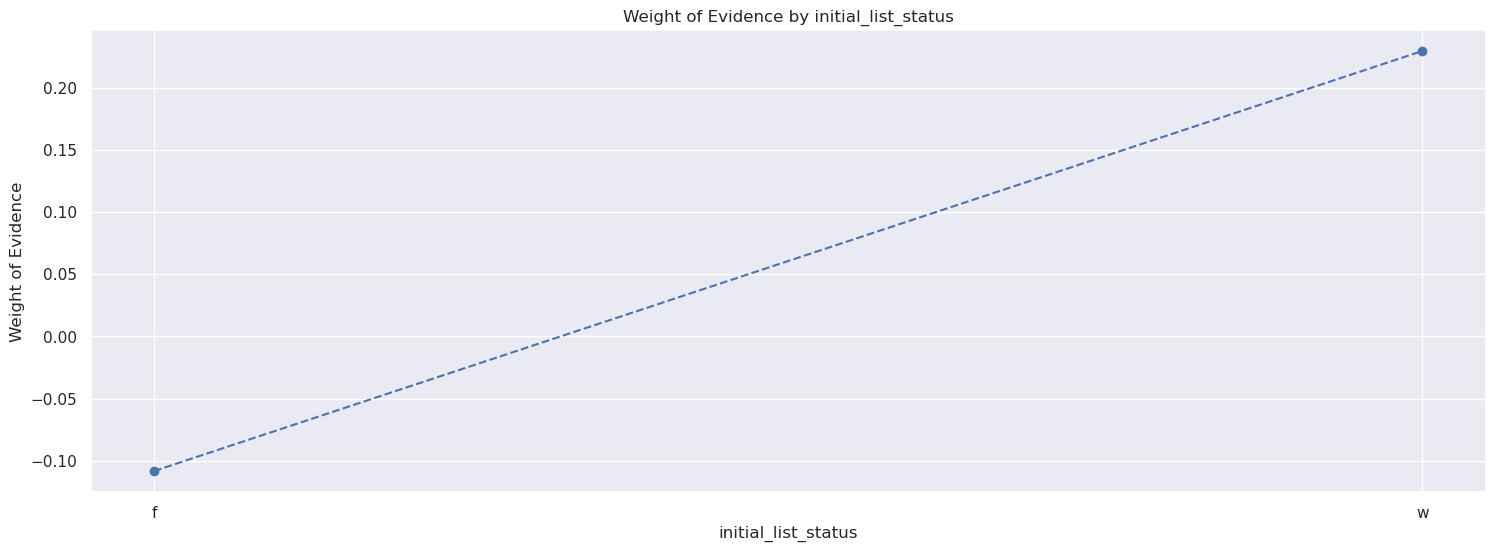

In [83]:
# plot WoE
plot_by_woe(df_temp)

Nothing to do for "initial_list_status" either

## Handling continuous features

In [84]:
# WoE function for ordered discrete and continuous variables
# Same function as before difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE']) # commented out because we want to preserve natural ordering
    #df = df.reset_index(drop = True) # not neededss
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

## II. Creating dummy variables for continuous features

Note: term_int and emp_length_int are ordered discrete variables that are assumed to be continuous and have very few distinct values

### 1. term_int

In [85]:
# Check the values in term_int
df_inputs_prepr['term_int'].unique()

array([36, 60])

In [86]:
# Compute WoE using woe_ordered_continuous function

df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

term_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0        36  337953   0.902915    0.724778  305143.0  32810.0     0.734723   
1        60  128332   0.858508    0.275222  110174.0  18158.0     0.265277   

   prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0    0.643737  0.132203             NaN       NaN  0.03886  
1    0.356263 -0.294894        0.044408  0.427097  0.03886

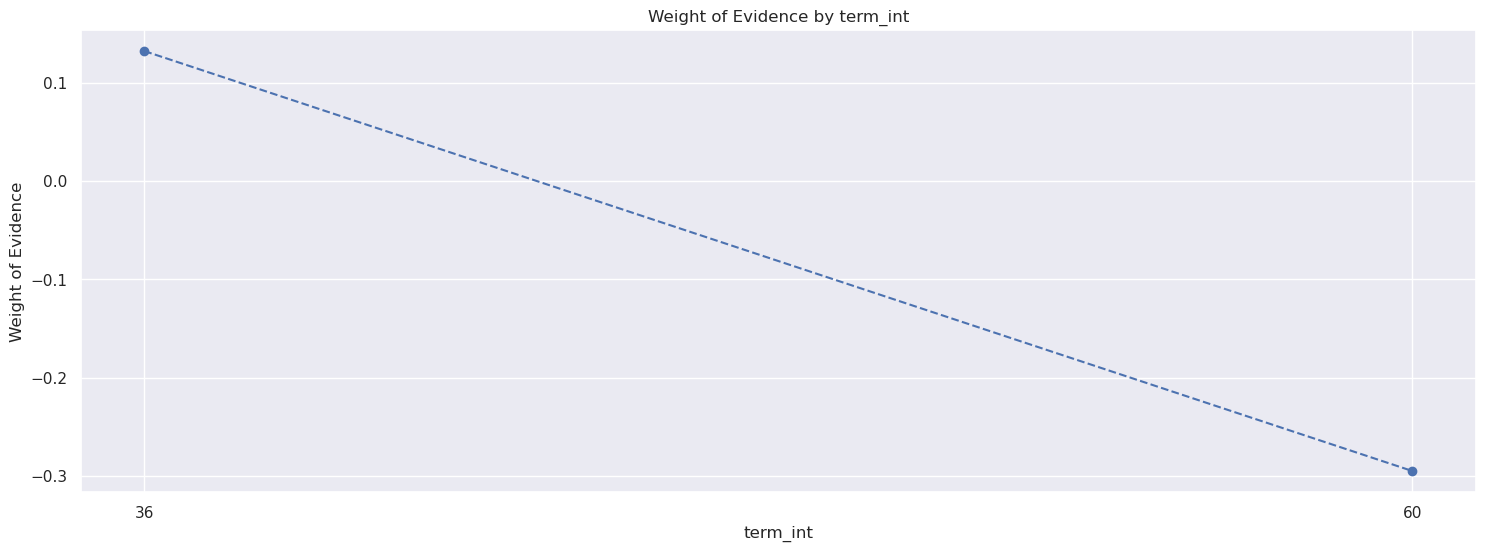

In [87]:
#Check plot
plot_by_woe(df_temp)

Create dummy categories but we dont have to create different bins here
term:60 will be the reference category

In [88]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

### 2. emp_length_int

In [89]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [90]:
# Compute WoE
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

emp_length_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0   36265   0.881015    0.077774   31950.0   4315.0   
1              1.0   29622   0.888124    0.063528   26308.0   3314.0   
2              2.0   41373   0.890242    0.088729   36832.0   4541.0   
3              3.0   36596   0.890480    0.078484   32588.0   4008.0   
4              4.0   28023   0.890411    0.060098   24952.0   3071.0   
5              5.0   30774   0.885033    0.065998   27236.0   3538.0   
6              6.0   47120   0.875976    0.101054   41276.0   5844.0   
7              7.0   26180   0.888655    0.056146   23265.0   2915.0   
8              8.0   22395   0.889931    0.048029   19930.0   2465.0   
9              9.0   17888   0.887914    0.038363   15883.0   2005.0   
10            10.0  150049   0.900353    0.321797  135097.0  14952.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.076929    0.084661 -0.095769             NaN       NaN  0.006546  
1      0.063344    0.065021 -0.026127        0.007109  0.069642  0.006546  
2      0.088684    0.089095 -0.004624        0.002119  0.021503  0.006546  
3      0.078465    0.078638 -0.002192        0.000237  0.002432  0.006546  
4      0.060079    0.060253 -0.002893        0.000068  0.000701  0.006546  
5      0.065579    0.069416 -0.056866        0.005379  0.053973  0.006546  
6      0.099384    0.114660 -0.142978        0.009057  0.086112  0.006546  
7      0.056017    0.057193 -0.020764        0.012679  0.122215  0.006546  
8      0.047987    0.048364 -0.007810        0.001275  0.012954  0.006546  
9      0.038243    0.039338 -0.028239        0.002017  0.020429  0.006546  
10     0.325286    0.293361  0.103304        0.012439  0.131543  0.006546

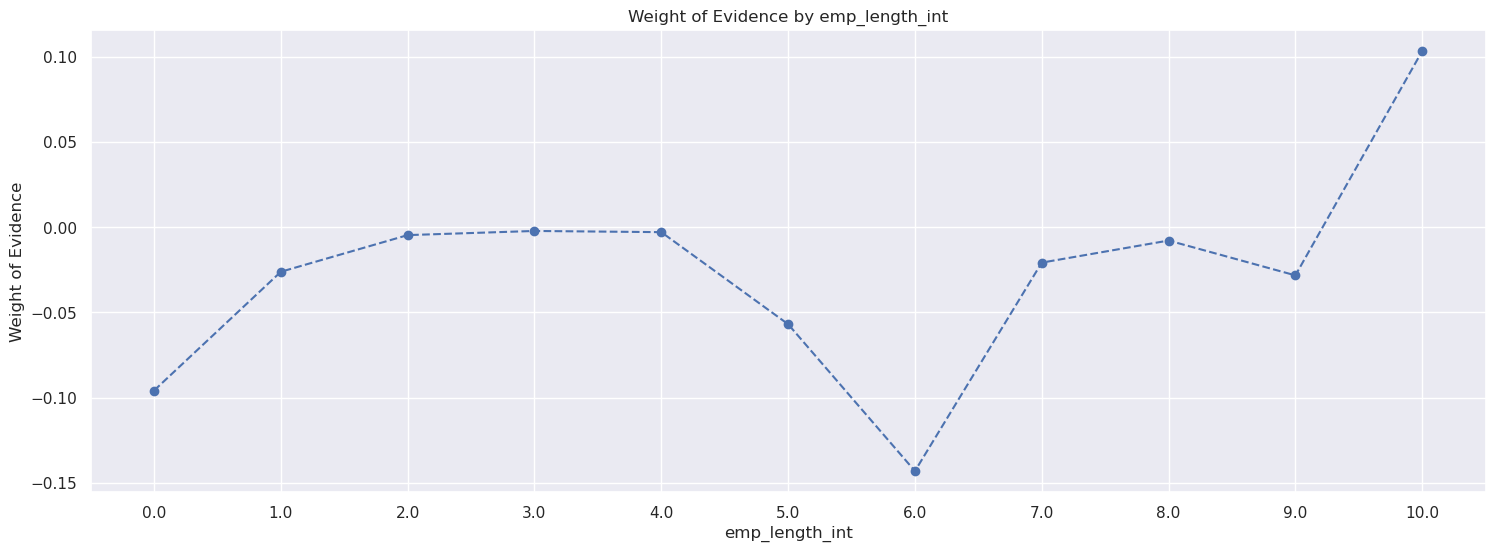

In [91]:
# Plot WoE
plot_by_woe(df_temp)

We create the following categories for emp_length_int

emp_length:0 - lowest Woe. This will also be the reference category

emp_length:1

emp_length:2-4 - Similar WoE and similar number of observations

emp_length:5-6 - Similar WoE and similar number of observations

emp_length:7-9 - Similar WoE and similar number of observations. One can also create 3 different categories here but fewer dummy variables are preferred. This is a judgement call.

emp_length:10 - High WoE



In [92]:
# Create categories
# 'emp_length:0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

## III. Creating dummy variables for continuous features  (advanced)

Strategy:

1. Use Fine classing to create categories based on values

2. Use coarse classing to combine some of the categories created using fine classing if required

### 1. mths_since_issue_d

In [93]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
        95.,  96.,  97.,  98.,  99., 100., 101., 102., 104., 105., 106.,
       107., 108., 109., 110., 111., 112., 113., 114., 115., 116., 117.,
       118., 119., 120., 121., 122., 123., 124., 125., 126., 127., 128.,
        49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,
        71.,  72.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.])

In [94]:
# Fine classing step using pd.cut to divide into 50 categories

df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [95]:
df_inputs_prepr['mths_since_issue_d_factor'].head(15)

0     (71.58, 73.4]
1     (71.58, 73.4]
2     (71.58, 73.4]
3     (71.58, 73.4]
4     (71.58, 73.4]
5     (71.58, 73.4]
6     (71.58, 73.4]
7     (71.58, 73.4]
8     (71.58, 73.4]
9     (71.58, 73.4]
10    (71.58, 73.4]
11    (71.58, 73.4]
12    (71.58, 73.4]
13    (71.58, 73.4]
14    (71.58, 73.4]
Name: mths_since_issue_d_factor, dtype: category
Categories (50, interval[float64, right]): [(36.909, 38.82] < (38.82, 40.64] < (40.64, 42.46] < (42.46, 44.28] ... (120.72, 122.54] < (122.54, 124.36] < (124.36, 126.18] < (126.18, 128.0]]

As seen above each sample as been assigned to category.

Lets get a list of all unique categories

(43.2, 45.0] - refers to a value between 43.2 (inclusive) and 45 ( not included).

In order words, 43.2 <= value < 45



In [96]:
# Compute woe using the previous created function
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_215/2487834626.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_215/2487834626.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            (36.909, 38.82]  35361   0.942960    0.075836  33344.0  2017.0   
1             (38.82, 40.64]  49388   0.928809    0.105918  45872.0  3516.0   
2             (40.64, 42.46]  48120   0.917810    0.103199  44165.0  3955.0   
3             (42.46, 44.28]  36278   0.908705    0.077802  32966.0  3312.0   
4              (44.28, 46.1]  35584   0.902007    0.076314  32097.0  3487.0   
5              (46.1, 47.92]  15269   0.898487    0.032746  13719.0  1550.0   
6             (47.92, 49.74]  30648   0.897155    0.065728  27496.0  3152.0   
7             (49.74, 51.56]  28790   0.887843    0.061743  25561.0  3229.0   
8             (51.56, 53.38]  25661   0.880207    0.055033  22587.0  3074.0   
9              (53.38, 55.2]  22809   0.868298    0.048916  19805.0  3004.0   
10             (55.2, 57.02]  19769   0.858819    0.042397  16978.0  2791.0   
11            (57.02, 58.84]   8273   0.866916    0.017742   7172.0  1101.0   
12            (58.84, 60.66]  14433   0.857895    0.030953  12382.0  2051.0   
13            (60.66, 62.48]  12448   0.851783    0.026696  10603.0  1845.0   
14             (62.48, 64.3]  12350   0.851903    0.026486  10521.0  1829.0   
15             (64.3, 66.12]  10046   0.835357    0.021545   8392.0  1654.0   
16            (66.12, 67.94]   3817   0.819230    0.008186   3127.0   690.0   
17            (67.94, 69.76]   6630   0.843439    0.014219   5592.0  1038.0   
18            (69.76, 71.58]   5474   0.845269    0.011740   4627.0   847.0   
19             (71.58, 73.4]   4869   0.825221    0.010442   4018.0   851.0   
20             (73.4, 75.22]   4350   0.852184    0.009329   3707.0   643.0   
21            (75.22, 77.04]   4001   0.856036    0.008581   3425.0   576.0   
22            (77.04, 78.86]   1875   0.852267    0.004021   1598.0   277.0   
23            (78.86, 80.68]   3539   0.842611    0.007590   2982.0   557.0   
24             (80.68, 82.5]   3011   0.856858    0.006457   2580.0   431.0   
25             (82.5, 84.32]   2678   0.867438    0.005743   2323.0   355.0   
26            (84.32, 86.14]   2559   0.868699    0.005488   2223.0   336.0   
27            (86.14, 87.96]   1232   0.845779    0.002642   1042.0   190.0   
28            (87.96, 89.78]   2364   0.839679    0.005070   1985.0   379.0   
29             (89.78, 91.6]   2309   0.846254    0.004952   1954.0   355.0   
30             (91.6, 93.42]   1901   0.871120    0.004077   1656.0   245.0   
31            (93.42, 95.24]   1510   0.892715    0.003238   1348.0   162.0   
32            (95.24, 97.06]   1320   0.876515    0.002831   1157.0   163.0   
33            (97.06, 98.88]    662   0.853474    0.001420    565.0    97.0   
34            (98.88, 100.7]   1111   0.850585    0.002383    945.0   166.0   
35           (100.7, 102.52]    857   0.873979    0.001838    749.0   108.0   
36          (102.52, 104.34]    406   0.857143    0.000871    348.0    58.0   
37          (104.34, 106.16]    692   0.855491    0.001484    592.0   100.0   
38          (106.16, 107.98]    324   0.873457    0.000695    283.0    41.0   
39           (107.98, 109.8]    571   0.856392    0.001225    489.0    82.0   
40           (109.8, 111.62]    462   0.829004    0.000991    383.0    79.0   
41          (111.62, 113.44]    179   0.826816    0.000384    148.0    31.0   
42          (113.44, 115.26]    241   0.825726    0.000517    199.0    42.0   
43          (115.26, 117.08]    239   0.803347    0.000513    192.0    47.0   
44           (117.08, 118.9]    259   0.756757    0.000555    196.0    63.0   
45           (118.9, 120.72]    708   0.788136    0.001518    558.0   150.0   
46          (120.72, 122.54]    477   0.725367    0.001023    346.0   131.0   
47          (122.54, 124.36]    217   0.686636    0.000465    149.0    68.0   
48          (124.36, 126.18]    127   0.740157    0.000272     94.0    33.0   
49           (126.18, 128.0]     87   0.885057    0.0

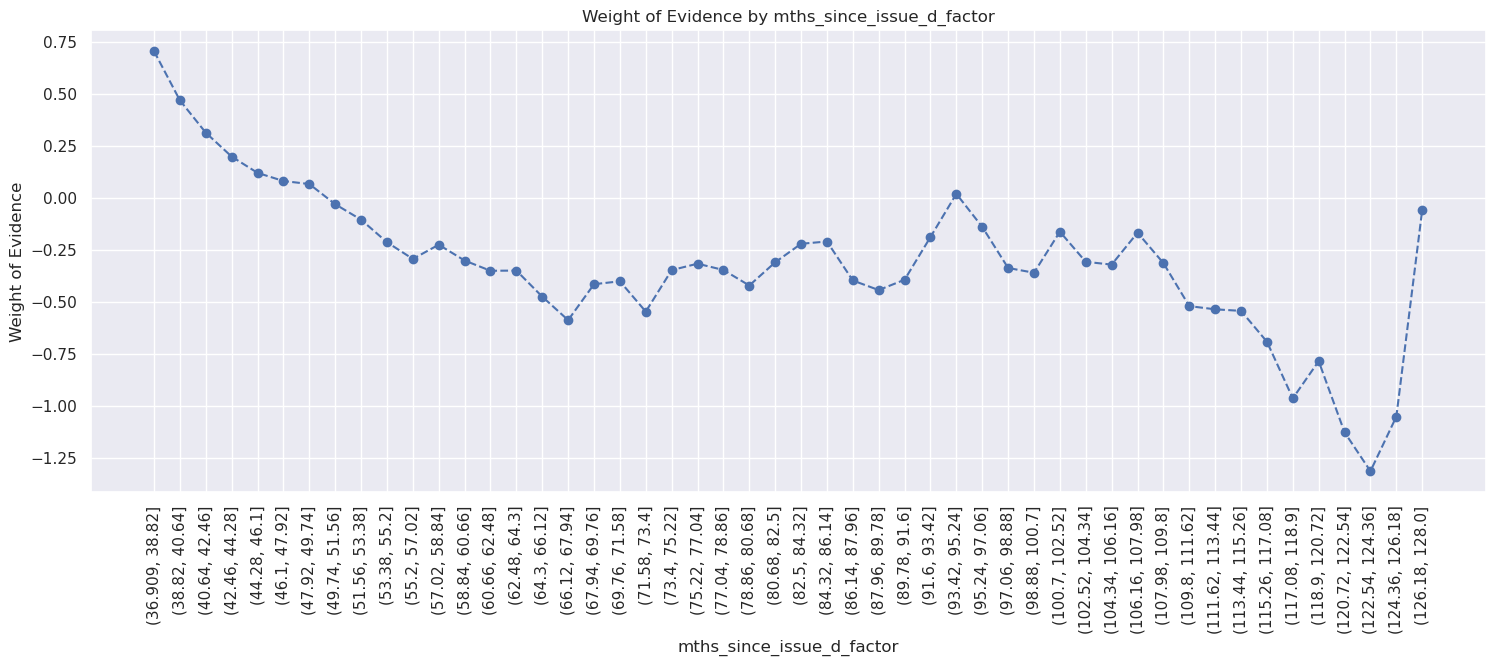

In [97]:
#Plot weight by evidence. The second parameter rotates the xlabel by 90 degrees
plot_by_woe(df_temp,90)

The first 3 values should have their own category because the WoE is quite different for each of them
We will create a separate dummy variable for each of the following categories

1. <38
2. 38-39
3. 40-41


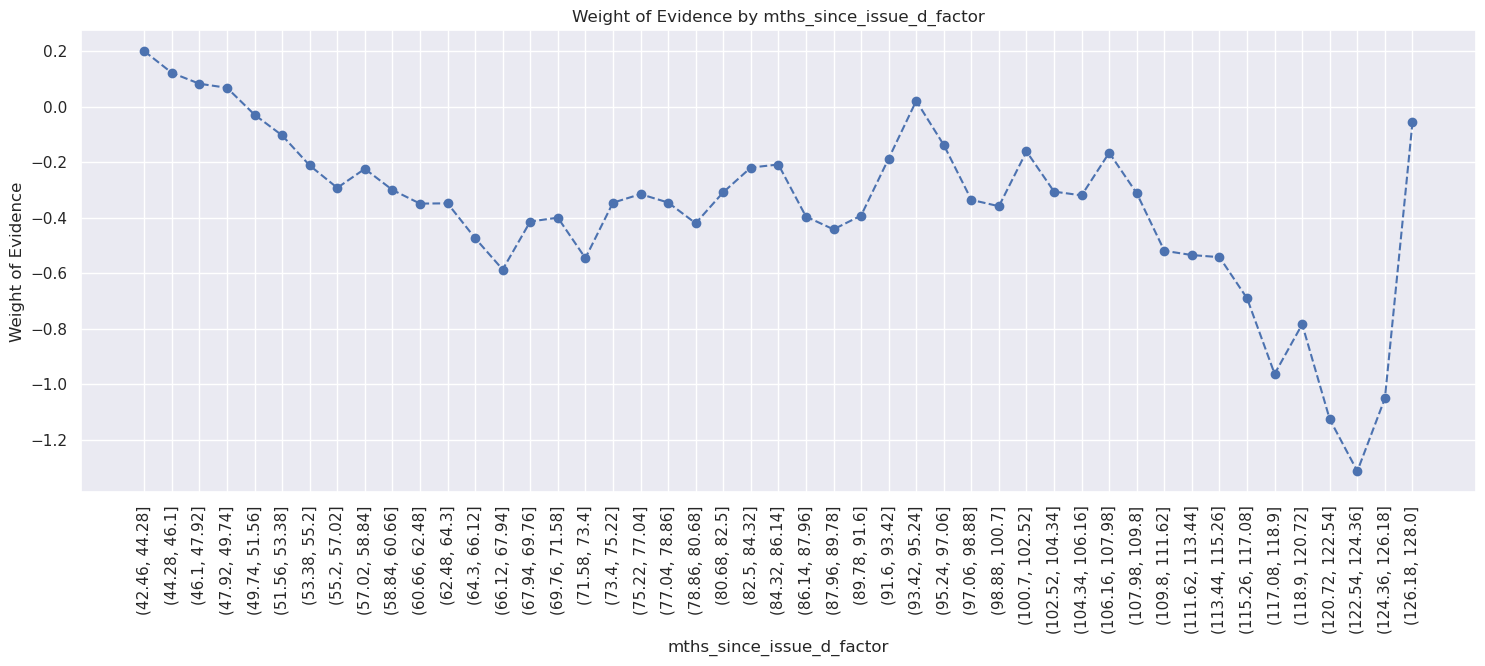

In [98]:
# Exlcude first 3 categories and look at others
plot_by_woe(df_temp.iloc[3: , : ], 90)



We create the following categories based on above graph

42 - 48 - Their WoE and number of samples is similar

49 - 52 - Their WoE and number of samples is similar

53 - 64 - Their WoE and number of samples is similar

65 - 84 - number of samples is similar

< 84 - number of samples is similar

In [99]:
# New categories: Coarse classing step
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

### 2. int_rate

In [100]:
# Fine classing  using pd.cut to put into 50 categories
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [101]:
# compute the WoE
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_215/2487834626.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_215/2487834626.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


int_rate_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (5.399, 5.833]    983   0.963377    0.002108    947.0    36.0   
1     (5.833, 6.246]  10545   0.980275    0.022615  10337.0   208.0   
2     (6.246, 6.658]   9800   0.971633    0.021017   9522.0   278.0   
3     (6.658, 7.071]   2293   0.968600    0.004918   2221.0    72.0   
4     (7.071, 7.484]   3947   0.977451    0.008465   3858.0    89.0   
5     (7.484, 7.897]  15826   0.962972    0.033941  15240.0   586.0   
6      (7.897, 8.31]  12116   0.949653    0.025984  11506.0   610.0   
7      (8.31, 8.722]   8274   0.965313    0.017745   7987.0   287.0   
8     (8.722, 9.135]  11923   0.938354    0.025570  11188.0   735.0   
9     (9.135, 9.548]   8271   0.966389    0.017738   7993.0   278.0   
10    (9.548, 9.961]   9469   0.931777    0.020307   8823.0   646.0   
11   (9.961, 10.374]  13707   0.934194    0.029396  12805.0   902.0   
12  (10.374, 10.786]   7247   0.914447    0.015542   6627.0   620.0   
13  (10.786, 11.199]  22315   0.931167    0.047857  20779.0  1536.0   
14  (11.199, 11.612]   6089   0.918377    0.013059   5592.0   497.0   
15  (11.612, 12.025]  19334   0.932813    0.041464  18035.0  1299.0   
16  (12.025, 12.438]  15413   0.895153    0.033055  13797.0  1616.0   
17   (12.438, 12.85]  13819   0.922353    0.029636  12746.0  1073.0   
18   (12.85, 13.263]  26769   0.903172    0.057409  24177.0  2592.0   
19  (13.263, 13.676]  19198   0.905771    0.041172  17389.0  1809.0   
20  (13.676, 14.089]  13683   0.896441    0.029345  12266.0  1417.0   
21  (14.089, 14.502]  29196   0.887587    0.062614  25914.0  3282.0   
22  (14.502, 14.914]   5520   0.863949    0.011838   4769.0   751.0   
23  (14.914, 15.327]  23743   0.881902    0.050920  20939.0  2804.0   
24   (15.327, 15.74]  15473   0.887352    0.033184  13730.0  1743.0   
25   (15.74, 16.153]   9346   0.838648    0.020044   7838.0  1508.0   
26  (16.153, 16.566]  16221   0.857469    0.034788  13909.0  2312.0   
27  (16.566, 16.978]   5272   0.844461    0.011306   4452.0   820.0   
28  (16.978, 17.391]  14239   0.852448    0.030537  12138.0  2101.0   
29  (17.391, 17.804]  15280   0.839071    0.032770  12821.0  2459.0   
30  (17.804, 18.217]   1592   0.825377    0.003414   1314.0   278.0   
31   (18.217, 18.63]  13765   0.833854    0.029521  11478.0  2287.0   
32   (18.63, 19.042]   8643   0.819276    0.018536   7081.0  1562.0   
33  (19.042, 19.455]   5560   0.799820    0.011924   4447.0  1113.0   
34  (19.455, 19.868]   8443   0.822220    0.018107   6942.0  1501.0   
35  (19.868, 20.281]   6143   0.835748    0.013174   5134.0  1009.0   
36  (20.281, 20.694]   4026   0.799056    0.008634   3217.0   809.0   
37  (20.694, 21.106]   4972   0.798069    0.010663   3968.0  1004.0   
38  (21.106, 21.519]   3430   0.775219    0.007356   2659.0   771.0   
39  (21.519, 21.932]   1211   0.767960    0.002597    930.0   281.0   
40  (21.932, 22.345]   4308   0.791318    0.009239   3409.0   899.0   
41  (22.345, 22.758]   2837   0.758195    0.006084   2151.0   686.0   
42   (22.758, 23.17]   1910   0.756021    0.004096   1444.0   466.0   
43   (23.17, 23.583]   3307   0.781978    0.007092   2586.0   721.0   
44  (23.583, 23.996]   1981   0.729430    0.004248   1445.0   536.0   
45  (23.996, 24.409]   1848   0.781926    0.003963   1445.0   403.0   
46  (24.409, 24.822]   2100   0.767619    0.004504   1612.0   488.0   
47  (24.822, 25.234]   1666   0.775510    0.003573   1292.0   374.0   
48  (25.234, 25.647]    972   0.740741    0.002085    720.0   252.0   
49   (25.647, 26.06]   2260   0.751327    0.004847   1698.0   562.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.002280    0.000706  1.171936             NaN       NaN  0.347385  
1      0.024889    0.004081  1.808103        0.016898  0.636167  0.347385  
2      0.022927    0.005454  1.435895        0.008642  0.372208  0.347385  
3      0.005348    0.001413  1.331203        0.003033  0.104692  0.347385  
4  

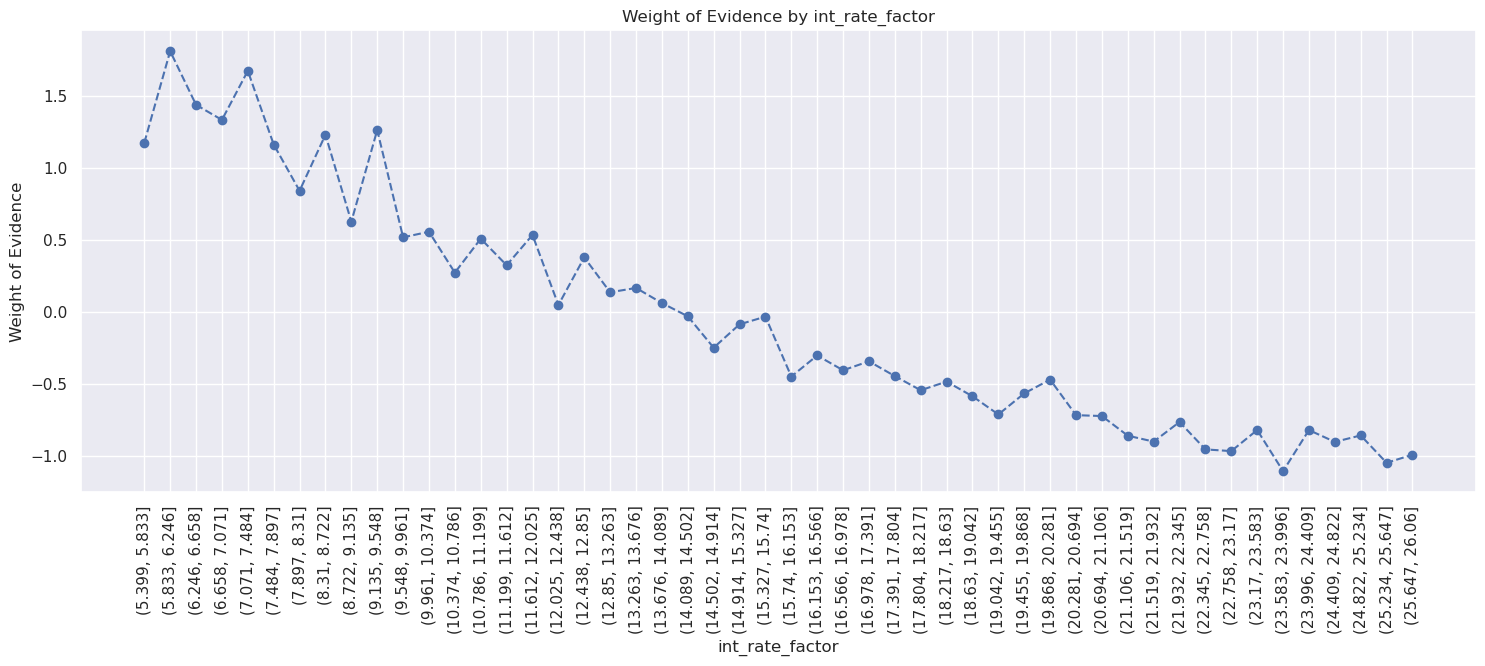

In [102]:
#plot with rotation
plot_by_woe(df_temp, 90)

There seems to a continous down trend overall in this field so coarse grouping should be easier

The first 9 points have WoE is up and down. Therefore, we look at the number of samples.

Since the number of samples is similar we group them together in a category named "< 9.548"

Categories


"< 9.548" - WoE varies but similar number of samples

"9.548 - 12.025" - WoE is range bound

"12.025 - 15.74" - WoE is range bound

"15.74 - 20.281" - WoE is range bound

"> 20.281" - WoE is range bound and few samples in each category




In [103]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

### 3. mths_since_earliest_cr_line

In [104]:
# fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
#Compute WoE
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_215/2487834626.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_215/2487834626.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                     (73.192, 90.16]   2496   0.902644    0.005353   2253.0   
1                     (90.16, 106.32]   4114   0.859261    0.008823   3535.0   
2                    (106.32, 122.48]   8791   0.868161    0.018853   7632.0   
3                    (122.48, 138.64]  18793   0.863513    0.040304  16228.0   
4                     (138.64, 154.8]  22021   0.875710    0.047226  19284.0   
5                     (154.8, 170.96]  26899   0.879103    0.057688  23647.0   
6                    (170.96, 187.12]  36251   0.888665    0.077744  32215.0   
7                    (187.12, 203.28]  42081   0.883510    0.090247  37179.0   
8                    (203.28, 219.44]  46493   0.884972    0.099709  41145.0   
9                     (219.44, 235.6]  43544   0.888412    0.093385  38685.0   
10                    (235.6, 251.76]  30508   0.888685    0.065428  27112.0   
11                   (251.76, 267.92]  29842   0.892936    0.063999  26647.0   
12                   (267.92, 284.08]  30686   0.899205    0.065810  27593.0   
13                   (284.08, 300.24]  22705   0.903017    0.048693  20503.0   
14                    (300.24, 316.4]  14436   0.903851    0.030960  13048.0   
15                    (316.4, 332.56]  14246   0.903341    0.030552  12869.0   
16                   (332.56, 348.72]  13782   0.905529    0.029557  12480.0   
17                   (348.72, 364.88]  11266   0.904935    0.024161  10195.0   
18                   (364.88, 381.04]   9241   0.911698    0.019818   8425.0   
19                    (381.04, 397.2]   7544   0.908404    0.016179   6853.0   
20                    (397.2, 413.36]   6734   0.907336    0.014442   6110.0   
21                   (413.36, 429.52]   5230   0.914149    0.011216   4781.0   
22                   (429.52, 445.68]   3477   0.914006    0.007457   3178.0   
23                   (445.68, 461.84]   2544   0.913522    0.005456   2324.0   
24                    (461.84, 478.0]   2888   0.912396    0.006194   2635.0   
25                    (478.0, 494.16]   2403   0.909280    0.005154   2185.0   
26                   (494.16, 510.32]   1729   0.916136    0.003708   1584.0   
27                   (510.32, 526.48]   1164   0.912371    0.002496   1062.0   
28                   (526.48, 542.64]   1014   0.914201    0.002175    927.0   
29                    (542.64, 558.8]    911   0.907794    0.001954    827.0   
30                    (558.8, 574.96]    588   0.901361    0.001261    530.0   
31                   (574.96, 591.12]    794   0.891688    0.001703    708.0   
32                   (591.12, 607.28]    464   0.870690    0.000995    404.0   
33                   (607.28, 623.44]    198   0.868687    0.000425    172.0   
34                    (623.44, 639.6]    145   0.882759    0.000311    128.0   
35                    (639.6, 655.76]    100   0.880000    0.000214     88.0   
36                   (655.76, 671.92]     38   0.947368    0.000081     36.0   
37                   (671.92, 688.08]     52   0.903846    0.000112     47.0   
38                   (688.08, 704.24]     27   0.851852    0.000058     23.0   
39                    (704.24, 720.4]     11   0.909091    0.000024     10.0   
40                    (720.4, 736.56]      9   0.666667    0.000019      6.0   
41                   (736.56, 752.72]     10   0.800000    0.000021      8.0   
42                   (752.72, 768.88]      2   1.000000    0.000004      2.0   
43                   (768.88, 785.04]      2   1.000000    0.000004      2.0   
44                    (785.04, 801.2]      6   1.000000    0.000013      6.0   
45                    (801.2, 817.36]      2   1.000000    0.000004      2.0   
46                   (817.36, 833.52]      0        NaN    0.000000      NaN   
47                   (833.52, 849.68]      1   1.000000    0.000002      1.0   
48                   (849.68, 865.84]      2   1.000000    0.000004      2.0   
49 

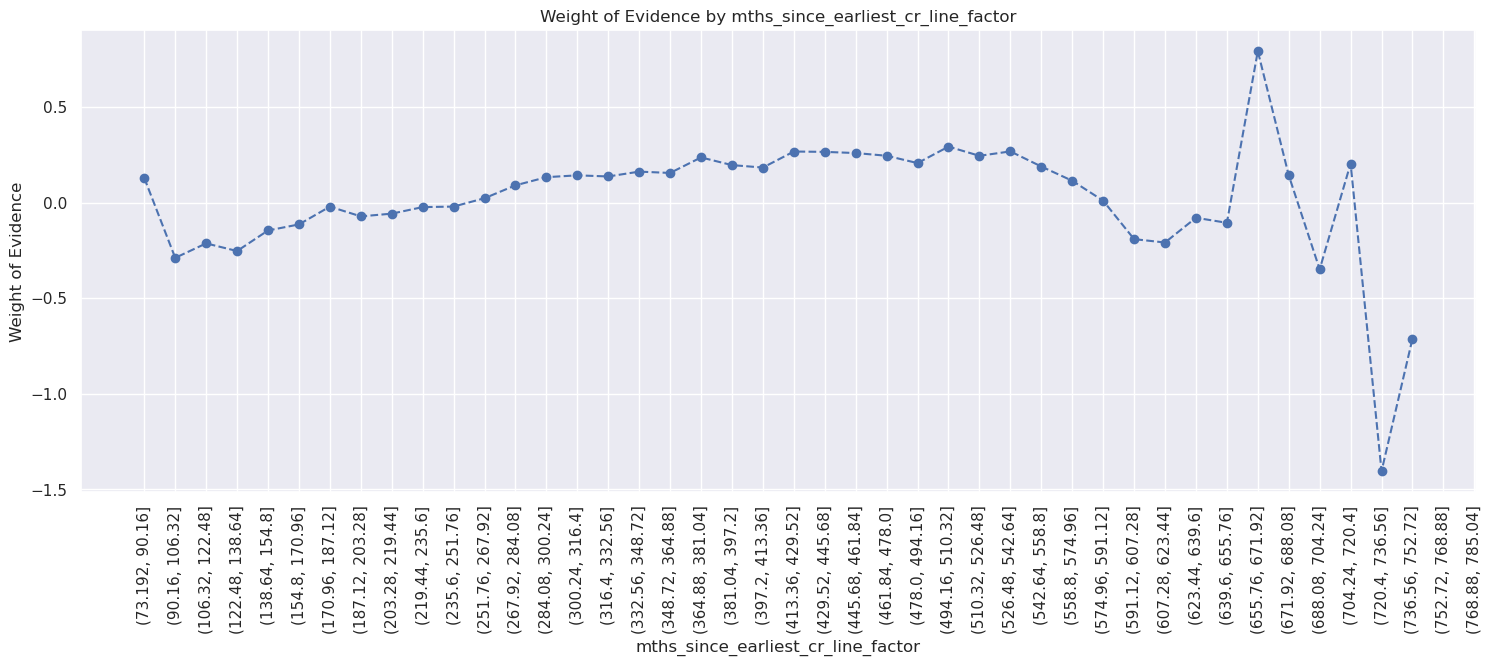

In [105]:
#Plot WoE
plot_by_woe(df_temp, 90)

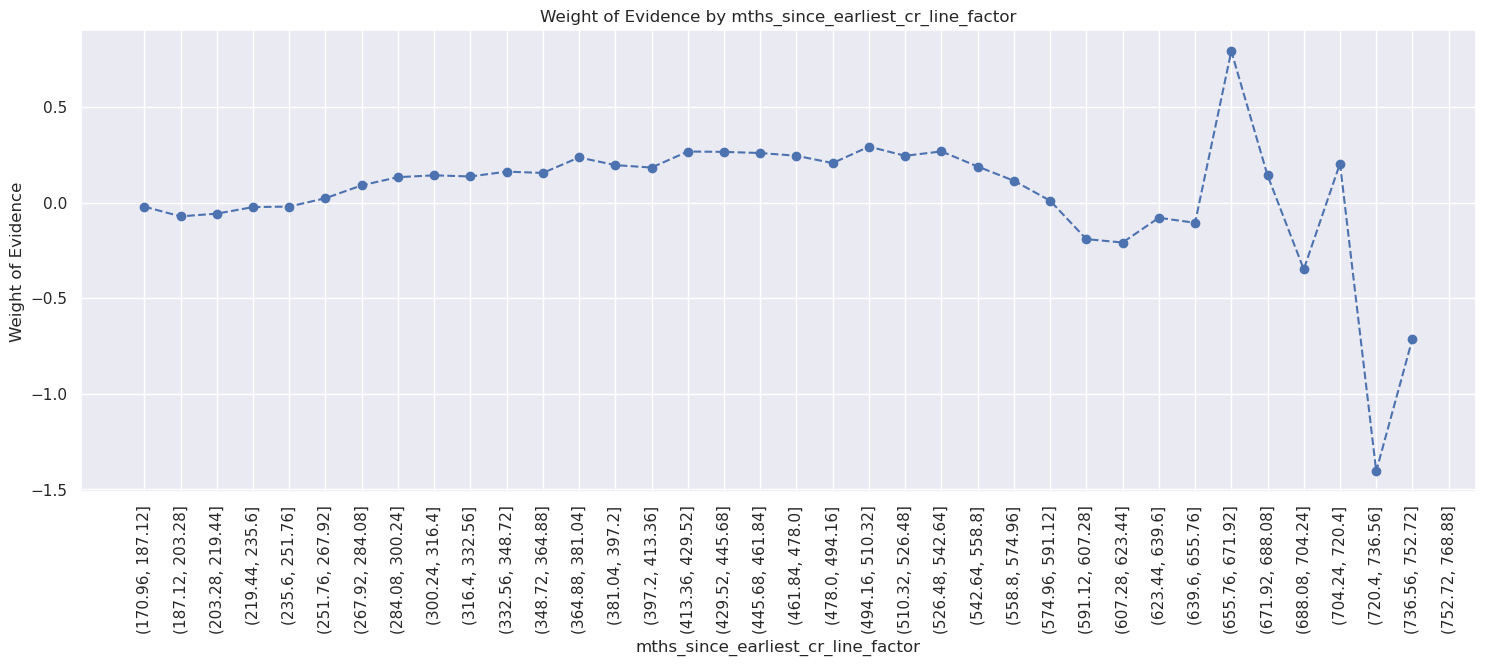

In [106]:
#Plot WoE leaving first 5 samples
plot_by_woe(df_temp.iloc[6: , : ], 90)

Following categories are created

1. "< 140"

2. 141 - 164

3. 165 - 247

4. 248 - 270

5. 271 - 352

6.  "> 352"

In [107]:
# Coarse binning step
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

### 4. delinq_2yrs

In [108]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

delinq_2yrs   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0           0.0  382983   0.890588    0.821350  341080.0  41903.0   
1           1.0   56224   0.892679    0.120579   50190.0   6034.0   
2           2.0   16310   0.888228    0.034979   14487.0   1823.0   
3           3.0    5684   0.885292    0.012190    5032.0    652.0   
4           4.0    2378   0.896131    0.005100    2131.0    247.0   
5           5.0    1236   0.888350    0.002651    1098.0    138.0   
6           6.0     629   0.893482    0.001349     562.0     67.0   
7           7.0     346   0.872832    0.000742     302.0     44.0   
8           8.0     177   0.903955    0.000380     160.0     17.0   
9           9.0     111   0.900901    0.000238     100.0     11.0   
10         10.0      65   0.861538    0.000139      56.0      9.0   
11         11.0      41   0.926829    0.000088      38.0      3.0   
12         12.0      38   0.710526    0.000081      27.0     11.0   
13         13.0      25   0.840000    0.000054      21.0      4.0   
14         14.0       8   0.875000    0.000017       7.0      1.0   
15         15.0       7   0.857143    0.000015       6.0      1.0   
16         16.0       5   1.000000    0.000011       5.0      0.0   
17         17.0       3   0.666667    0.000006       2.0      1.0   
18         18.0       6   0.833333    0.000013       5.0      1.0   
19         19.0       3   1.000000    0.000006       3.0      0.0   
20         21.0       2   0.500000    0.000004       1.0      1.0   
21         22.0       2   1.000000    0.000004       2.0      0.0   
22         24.0       1   1.000000    0.000002       1.0      0.0   
23         29.0       1   1.000000    0.000002       1.0      0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.821252    0.822143 -0.001084             NaN       NaN  inf  
1      0.120847    0.118388  0.020562        0.002091  0.021646  inf  
2      0.034882    0.035768 -0.025076        0.004451  0.045637  inf  
3      0.012116    0.012792 -0.054316        0.002936  0.029240  inf  
4      0.005131    0.004846  0.057114        0.010839  0.111430  inf  
5      0.002644    0.002708 -0.023852        0.007782  0.080966  inf  
6      0.001353    0.001315  0.028965        0.005132  0.052817  inf  
7      0.000727    0.000863 -0.171607        0.020649  0.200572  inf  
8      0.000385    0.000334  0.144116        0.031122  0.315723  inf  
9      0.000241    0.000216  0.109431        0.003054  0.034686  inf  
10     0.000135    0.000177 -0.269717        0.039362  0.379148  inf  
11     0.000091    0.000059  0.441130        0.065291  0.710847  inf  
12     0.000065    0.000216 -1.199903        0.216303  1.641032  inf  
13     0.000051    0.000078 -0.439616        0.129474  0.760286  inf  
14     0.000017    0.000020 -0.151934        0.035000  0.287682  inf  
15     0.000014    0.000020 -0.306085        0.017857  0.154151  inf  
16     0.000012    0.000000       inf        0.142857       inf  inf  
17     0.000005    0.000020 -1.404697        0.333333       inf  inf  
18     0.000012    0.000020 -0.488406        0.166667  0.916291  inf  
19     0.000007    0.000000       inf        0.166667       inf  inf  
20     0.000002    0.000020 -2.097844        0.500000       inf  inf  
21     0.000005    0.000000       inf        0.500000       inf  inf  
22     0.000002    0.000000       inf        0.000000       NaN  inf  
23     0.000002    0.000000       inf        0.000000       NaN  inf

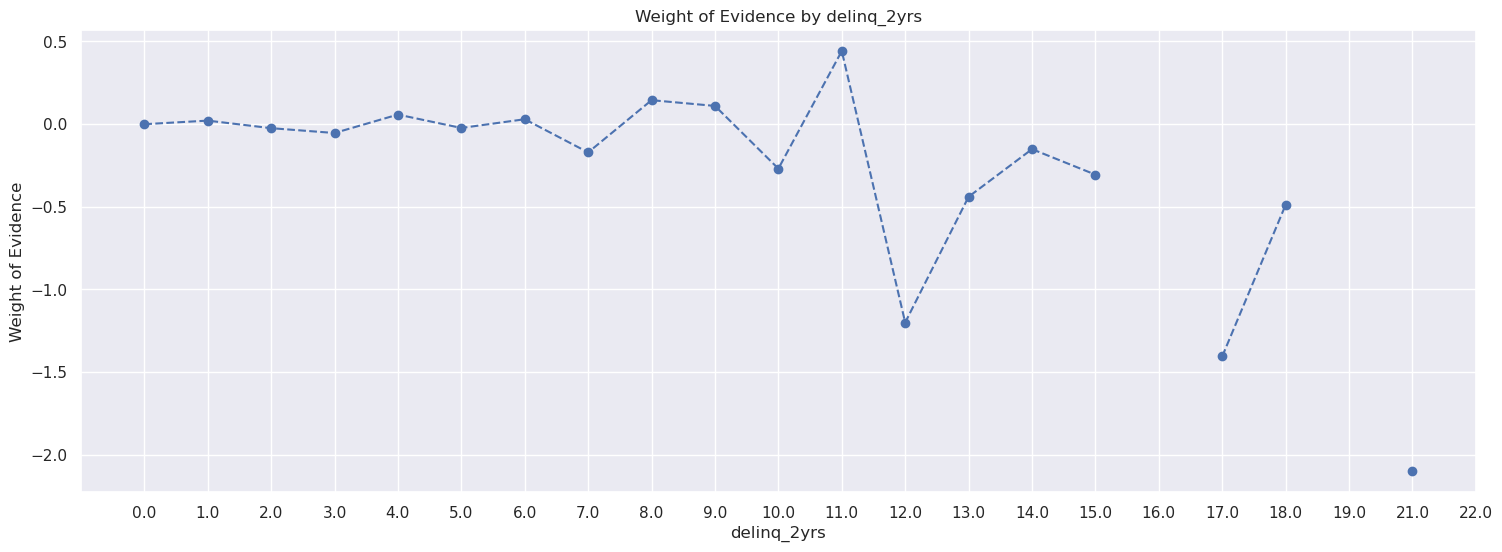

In [109]:
plot_by_woe(df_temp)

Categories created:

1.  0

2. 1-3

3. ">= 4"



In [110]:
#create categories
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

### 5. inq_last_6mths

In [111]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inq_last_6mths   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0  241527   0.908735    0.517981  219484.0  22043.0   
1              1.0  130148   0.884439    0.279117  115108.0  15040.0   
2              2.0   57825   0.863606    0.124012   49938.0   7887.0   
3              3.0   25126   0.841001    0.053885   21131.0   3995.0   
4              4.0    7241   0.846982    0.015529    6133.0   1108.0   
5              5.0    2768   0.828396    0.005936    2293.0    475.0   
6              6.0    1188   0.783670    0.002548     931.0    257.0   
7              7.0     195   0.651282    0.000418     127.0     68.0   
8              8.0     122   0.622951    0.000262      76.0     46.0   
9              9.0      50   0.640000    0.000107      32.0     18.0   
10            10.0      24   0.875000    0.000051      21.0      3.0   
11            11.0      15   0.800000    0.000032      12.0      3.0   
12            12.0      15   0.600000    0.000032       9.0      6.0   
13            13.0       6   0.666667    0.000013       4.0      2.0   
14            14.0       6   0.166667    0.000013       1.0      5.0   
15            15.0       9   0.444444    0.000019       4.0      5.0   
16            16.0       3   1.000000    0.000006       3.0      0.0   
17            17.0       2   0.500000    0.000004       1.0      1.0   
18            18.0       4   0.500000    0.000009       2.0      2.0   
19            19.0       2   1.000000    0.000004       2.0      0.0   
20            20.0       1   0.000000    0.000002       0.0      1.0   
21            24.0       2   1.000000    0.000004       2.0      0.0   
22            25.0       1   0.000000    0.000002       0.0      1.0   
23            27.0       1   1.000000    0.000002       1.0      0.0   
24            28.0       1   1.000000    0.000002       1.0      0.0   
25            31.0       1   1.000000    0.000002       1.0      0.0   
26            32.0       1   0.000000    0.000002       0.0      1.0   
27            33.0       1   0.000000    0.000002       0.0      1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.528473    0.432487  0.200440             NaN       NaN  inf  
1      0.277157    0.295087 -0.062687        0.024296  0.263127  inf  
2      0.120241    0.154744 -0.252278        0.020834  0.189591  inf  
3      0.050879    0.078383 -0.432147        0.022604  0.179869  inf  
4      0.014767    0.021739 -0.386717        0.005981  0.045430  inf  
5      0.005521    0.009320 -0.523543        0.018587  0.136826  inf  
6      0.002242    0.005042 -0.810661        0.044726  0.287118  inf  
7      0.000306    0.001334 -1.473165        0.132388  0.662504  inf  
8      0.000183    0.000903 -1.595752        0.028331  0.122587  inf  
9      0.000077    0.000353 -1.522480        0.017049  0.073272  inf  
10     0.000051    0.000059 -0.151934        0.235000  1.370546  inf  
11     0.000029    0.000059 -0.711550        0.075000  0.559616  inf  
12     0.000022    0.000118 -1.692379        0.200000  0.980829  inf  
13     0.000010    0.000039 -1.404697        0.066667  0.287682  inf  
14     0.000002    0.000098 -3.707282        0.500000  2.302585  inf  
15     0.000010    0.000098 -2.320988        0.277778  1.386294  inf  
16     0.000007    0.000000       inf        0.555556       inf  inf  
17     0.000002    0.000020 -2.097844        0.500000       inf  inf  
18     0.000005    0.000039 -2.097844        0.000000  0.000000  inf  
19     0.000005    0.000000       inf        0.500000       inf  inf  
20     0.000000    0.000020      -inf        1.000000       inf  inf  
21     0.000005    0.000000       inf        1.000000       inf  inf  
22     0.000000    0.000020      -inf        1.000000       inf  inf  
23     0.000002    0.000000       inf        1.000000       inf  inf  
24     0.000002    0.000000       inf        0.000000       NaN  inf  
25     0.000002    0.000000       inf        0.000000       NaN  inf 

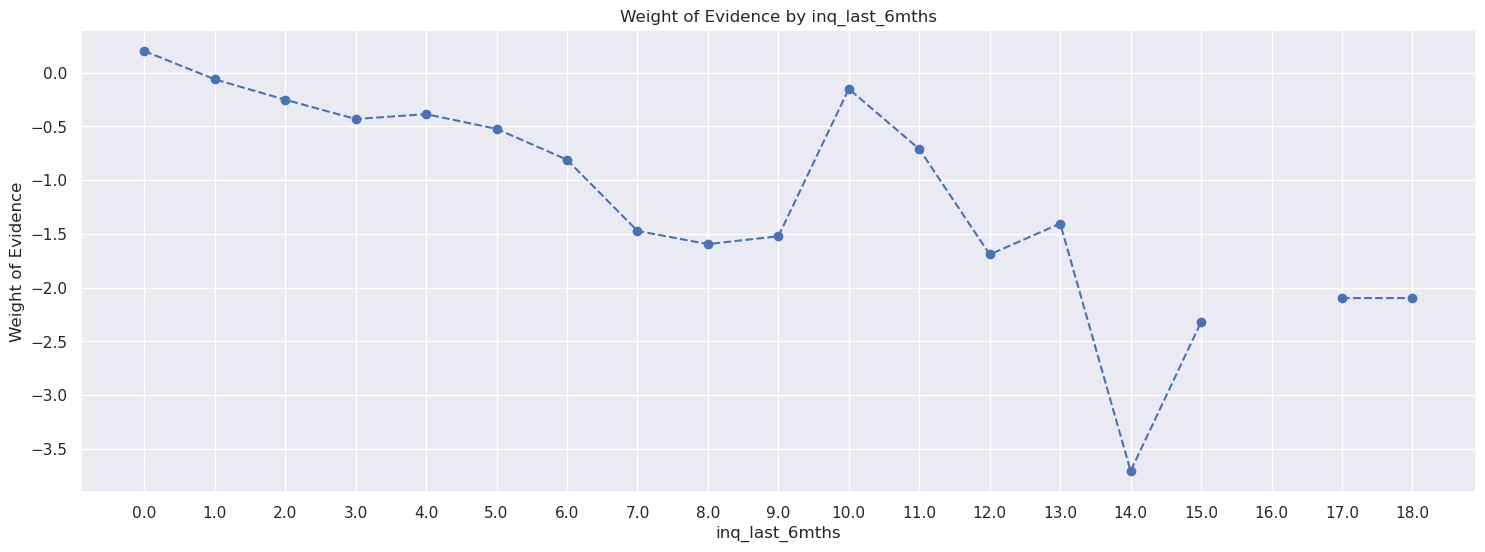

In [112]:
plot_by_woe(df_temp)

Categories identified

1. 0

2. 1 - 2

3. 3 - 6

4. "> 6"


In [113]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

### 6. open_acc

In [114]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


open_acc  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        0.0      7   0.428571    0.000015      3.0     4.0     0.000007   
1        1.0    142   0.873239    0.000305    124.0    18.0     0.000299   
2        2.0   1790   0.844134    0.003839   1511.0   279.0     0.003638   
3        3.0   5500   0.869455    0.011795   4782.0   718.0     0.011514   
4        4.0  12588   0.891643    0.026996  11224.0  1364.0     0.027025   
5        5.0  21544   0.891292    0.046204  19202.0  2342.0     0.046235   
6        6.0  30837   0.892045    0.066133  27508.0  3329.0     0.066234   
7        7.0  37602   0.890618    0.080642  33489.0  4113.0     0.080635   
8        8.0  41893   0.891509    0.089844  37348.0  4545.0     0.089926   
9        9.0  44019   0.889002    0.094404  39133.0  4886.0     0.094224   
10      10.0  42541   0.889072    0.091234  37822.0  4719.0     0.091068   
11      11.0  39112   0.887605    0.083880  34716.0  4396.0     0.083589   
12      12.0  34585   0.888796    0.074171  30739.0  3846.0     0.074013   
13      13.0  29806   0.895021    0.063922  26677.0  3129.0     0.064233   
14      14.0  24730   0.890619    0.053036  22025.0  2705.0     0.053032   
15      15.0  20234   0.891865    0.043394  18046.0  2188.0     0.043451   
16      16.0  16809   0.894759    0.036049  15040.0  1769.0     0.036213   
17      17.0  13392   0.890905    0.028721  11931.0  1461.0     0.028727   
18      18.0  10865   0.896641    0.023301   9742.0  1123.0     0.023457   
19      19.0   8647   0.892795    0.018544   7720.0   927.0     0.018588   
20      20.0   6668   0.895021    0.014300   5968.0   700.0     0.014370   
21      21.0   5279   0.893730    0.011321   4718.0   561.0     0.011360   
22      22.0   4097   0.892604    0.008786   3657.0   440.0     0.008805   
23      23.0   3158   0.901520    0.006773   2847.0   311.0     0.006855   
24      24.0   2452   0.891109    0.005259   2185.0   267.0     0.005261   
25      25.0   1933   0.888257    0.004146   1717.0   216.0     0.004134   
26      26.0   1314   0.902588    0.002818   1186.0   128.0     0.002856   
27      27.0   1067   0.903468    0.002288    964.0   103.0     0.002321   
28      28.0    766   0.904700    0.001643    693.0    73.0     0.001669   
29      29.0    624   0.889423    0.001338    555.0    69.0     0.001336   
30      30.0    484   0.890496    0.001038    431.0    53.0     0.001038   
31      31.0    358   0.902235    0.000768    323.0    35.0     0.000778   
32      32.0    296   0.912162    0.000635    270.0    26.0     0.000650   
33      33.0    222   0.873874    0.000476    194.0    28.0     0.000467   
34      34.0    185   0.886486    0.000397    164.0    21.0     0.000395   
35      35.0    157   0.923567    0.000337    145.0    12.0     0.000349   
36      36.0    126   0.849206    0.000270    107.0    19.0     0.000258   
37      37.0    100   0.880000    0.000214     88.0    12.0     0.000212   
38      38.0     78   0.884615    0.000167     69.0     9.0     0.000166   
39      39.0     67   0.925373    0.000144     62.0     5.0     0.000149   
40      40.0     39   0.846154    0.000084     33.0     6.0     0.000079   
41      41.0     36   0.888889    0.000077     32.0     4.0     0.000077   
42      42.0     29   0.965517    0.000062     28.0     1.0     0.000067   
43      43.0     19   0.894737    0.000041     17.0     2.0     0.000041   
44      44.0     12   0.916667    0.000026     11.0     1.0     0.000026   
45      45.0     18   0.888889    0.000039     16.0     2.0     0.000039   
46      46.0      7   1.000000    0.000015      7.0     0.0     0.000017   
47      47.0      6   0.833333    0.000013      5.0     1.0     0.000012   
48      48.0      6   1.000000    0.000013      6.0     0.0     0.000014   
49      49.0      8   1.000000    0.000017      8.0     0.0     0.000019   
50      50.0      5   1.000000    0.000011      5.0     0.0     0.000012   
51      51.0      5   1.000000    0.000011      5.0 

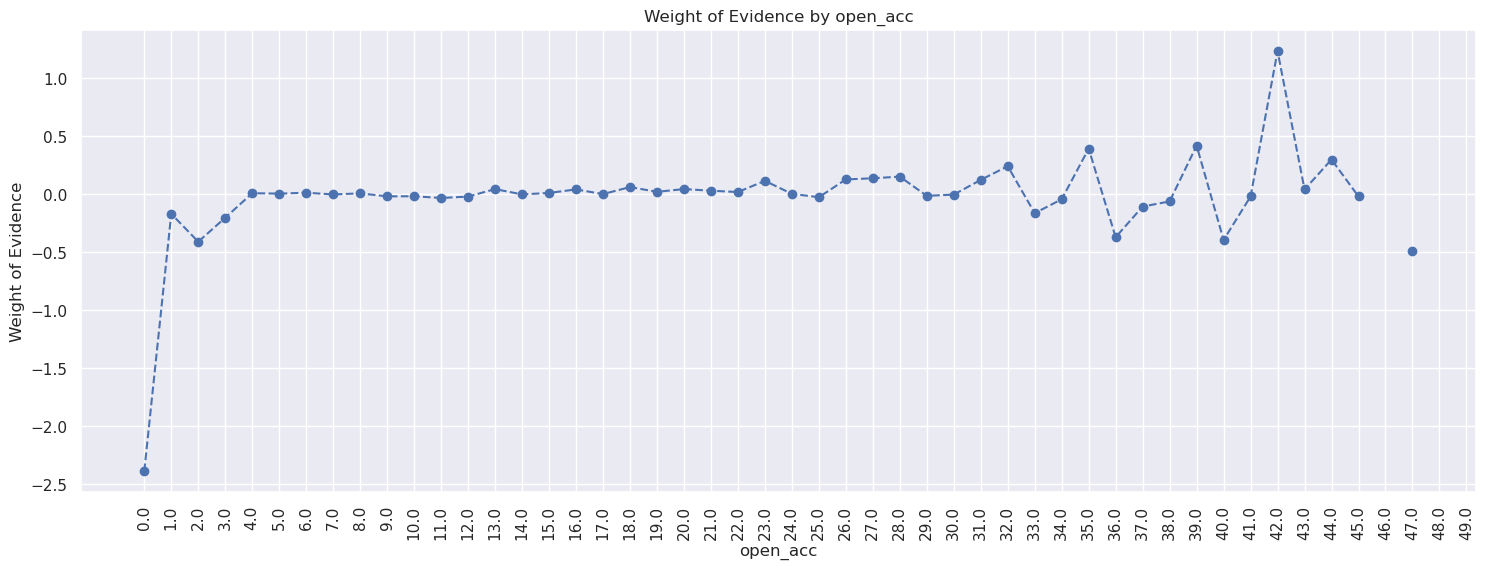

In [115]:
plot_by_woe(df_temp, 90)

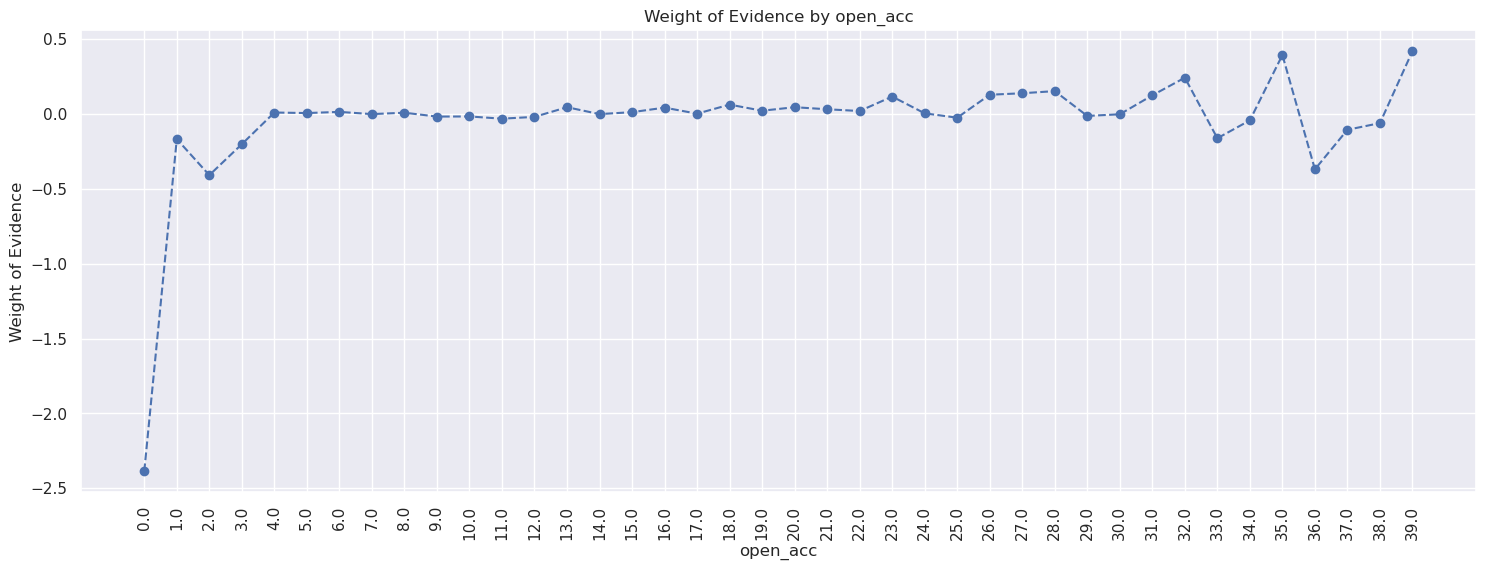

In [116]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

Categories identified

1. 0
2. 1-3
3. 4-12
4. 13-17
5. 18-22
6. 23-25
7. 26-30
8. '>30'

In [117]:
# create categories
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

### 7. pub_rec

In [118]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

pub_rec   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0       0.0  404922   0.889789    0.868400  360295.0  44627.0     0.867518   
1       1.0   53051   0.894969    0.113774   47479.0   5572.0     0.114320   
2       2.0    5624   0.903450    0.012061    5081.0    543.0     0.012234   
3       3.0    1611   0.916201    0.003455    1476.0    135.0     0.003554   
4       4.0     520   0.909615    0.001115     473.0     47.0     0.001139   
5       5.0     276   0.909420    0.000592     251.0     25.0     0.000604   
6       6.0     136   0.926471    0.000292     126.0     10.0     0.000303   
7       7.0      62   0.919355    0.000133      57.0      5.0     0.000137   
8       8.0      29   0.965517    0.000062      28.0      1.0     0.000067   
9       9.0      16   0.812500    0.000034      13.0      3.0     0.000031   
10     10.0      13   1.000000    0.000028      13.0      0.0     0.000031   
11     11.0       8   1.000000    0.000017       8.0      0.0     0.000019   
12     12.0       2   1.000000    0.000004       2.0      0.0     0.000005   
13     13.0       2   1.000000    0.000004       2.0      0.0     0.000005   
14     14.0       1   1.000000    0.000002       1.0      0.0     0.000002   
15     15.0       1   1.000000    0.000002       1.0      0.0     0.000002   
16     16.0       1   1.000000    0.000002       1.0      0.0     0.000002   
17     17.0       1   1.000000    0.000002       1.0      0.0     0.000002   
18     18.0       2   1.000000    0.000004       2.0      0.0     0.000005   
19     19.0       1   1.000000    0.000002       1.0      0.0     0.000002   
20     21.0       1   1.000000    0.000002       1.0      0.0     0.000002   
21     34.0       1   1.000000    0.000002       1.0      0.0     0.000002   
22     40.0       1   1.000000    0.000002       1.0      0.0     0.000002   
23     49.0       1   1.000000    0.000002       1.0      0.0     0.000002   
24     54.0       1   1.000000    0.000002       1.0      0.0     0.000002   
25     63.0       1   1.000000    0.000002       1.0      0.0     0.000002   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.875589 -0.009260             NaN       NaN  inf  
1     0.109323  0.044689        0.005180  0.053949  inf  
2     0.010654  0.138310        0.008481  0.093621  inf  
3     0.002649  0.293972        0.012752  0.155662  inf  
4     0.000922  0.211104        0.006586  0.082868  inf  
5     0.000491  0.208733        0.000195  0.002371  inf  
6     0.000196  0.435853        0.017050  0.227120  inf  
7     0.000098  0.335769        0.007116  0.100083  inf  
8     0.000020  1.234360        0.046162  0.898591  inf  
9     0.000059 -0.631507        0.153017  1.865867  inf  
10    0.000000       inf        0.187500       inf  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf  
15    0.000000       inf        0.000000       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf  
19    0.000000       inf        0.000000       NaN  inf  
20    0.000000       inf        0.000000       NaN  inf  
21    0.000000       inf        0.000000       NaN  inf  
22    0.000000       inf        0.000000       NaN  inf  
23    0.000000       inf        0.000000       NaN  inf  
24    0.000000       inf        0.000000       NaN  inf  
25    0.000000       inf        0.000000       NaN  inf

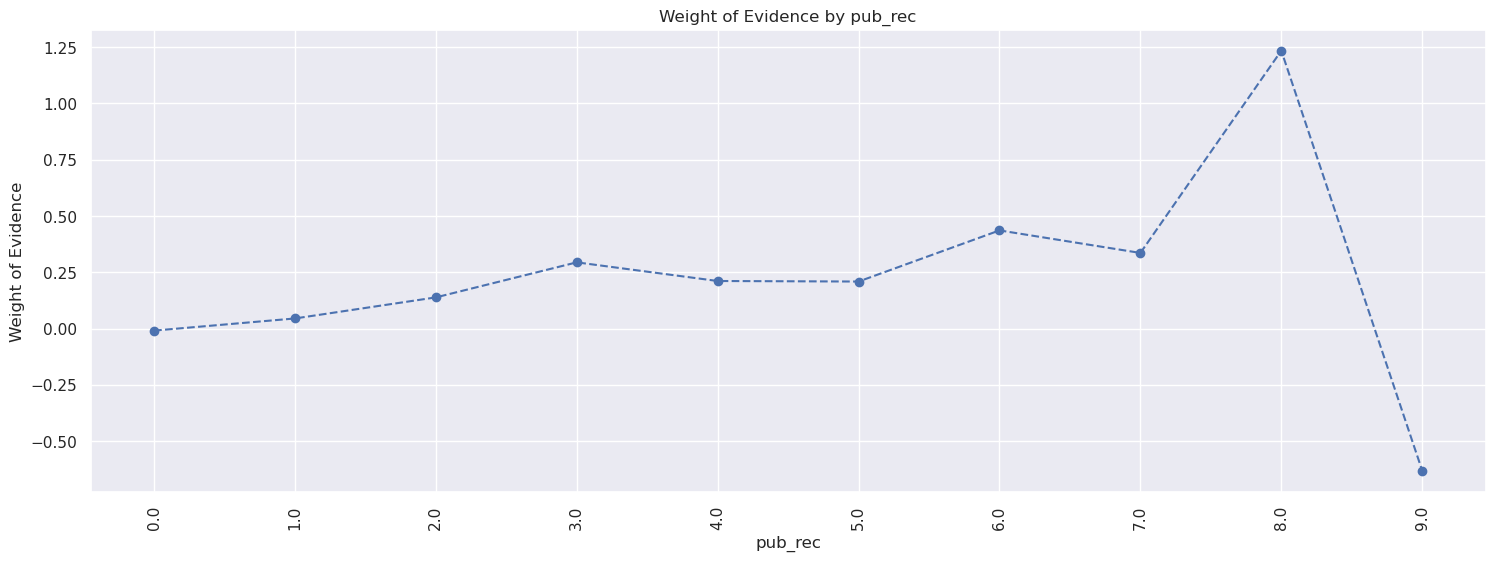

In [119]:
plot_by_woe(df_temp, 90)

Categories indentified

1. 0-2

2. 3-4

3. ">=5"



In [120]:
#create categories

df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

### 8. total_acc

In [121]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_215/2487834626.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_215/2487834626.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (0.845, 4.1]   2059   0.835357    0.004416   1720.0   339.0   
1        (4.1, 7.2]  10849   0.867361    0.023267   9410.0  1439.0   
2       (7.2, 10.3]  23089   0.875222    0.049517  20208.0  2881.0   
3      (10.3, 13.4]  35337   0.880437    0.075784  31112.0  4225.0   
4      (13.4, 16.5]  44537   0.884456    0.095515  39391.0  5146.0   
5      (16.5, 19.6]  49609   0.887924    0.106392  44049.0  5560.0   
6      (19.6, 22.7]  51188   0.890443    0.109778  45580.0  5608.0   
7      (22.7, 25.8]  48850   0.890317    0.104764  43492.0  5358.0   
8      (25.8, 28.9]  43514   0.897527    0.093321  39055.0  4459.0   
9      (28.9, 32.0]  48183   0.897516    0.103334  43245.0  4938.0   
10     (32.0, 35.1]  27980   0.898070    0.060006  25128.0  2852.0   
11     (35.1, 38.2]  21751   0.900648    0.046647  19590.0  2161.0   
12     (38.2, 41.3]  16808   0.900048    0.036047  15128.0  1680.0   
13     (41.3, 44.4]  12636   0.897911    0.027099  11346.0  1290.0   
14     (44.4, 47.5]   9039   0.896117    0.019385   8100.0   939.0   
15     (47.5, 50.6]   6463   0.897261    0.013861   5799.0   664.0   
16     (50.6, 53.7]   4565   0.907996    0.009790   4145.0   420.0   
17     (53.7, 56.8]   3099   0.903195    0.006646   2799.0   300.0   
18     (56.8, 59.9]   2205   0.892517    0.004729   1968.0   237.0   
19     (59.9, 63.0]   3273   0.888176    0.007019   2907.0   366.0   
20     (63.0, 66.1]    388   0.920103    0.000832    357.0    31.0   
21     (66.1, 69.2]    275   0.920000    0.000590    253.0    22.0   
22     (69.2, 72.3]    150   0.926667    0.000322    139.0    11.0   
23     (72.3, 75.4]    141   0.907801    0.000302    128.0    13.0   
24     (75.4, 78.5]     80   0.900000    0.000172     72.0     8.0   
25     (78.5, 81.6]     65   0.876923    0.000139     57.0     8.0   
26     (81.6, 84.7]     36   0.888889    0.000077     32.0     4.0   
27     (84.7, 87.8]     36   0.944444    0.000077     34.0     2.0   
28     (87.8, 90.9]     28   0.892857    0.000060     25.0     3.0   
29     (90.9, 94.0]     22   0.863636    0.000047     19.0     3.0   
30     (94.0, 97.1]      8   1.000000    0.000017      8.0     0.0   
31    (97.1, 100.2]      6   0.833333    0.000013      5.0     1.0   
32   (100.2, 103.3]      3   1.000000    0.000006      3.0     0.0   
33   (103.3, 106.4]      5   1.000000    0.000011      5.0     0.0   
34   (106.4, 109.5]      0        NaN    0.000000      NaN     NaN   
35   (109.5, 112.6]      0        NaN    0.000000      NaN     NaN   
36   (112.6, 115.7]      0        NaN    0.000000      NaN     NaN   
37   (115.7, 118.8]      3   1.000000    0.000006      3.0     0.0   
38   (118.8, 121.9]      2   1.000000    0.000004      2.0     0.0   
39   (121.9, 125.0]      1   1.000000    0.000002      1.0     0.0   
40   (125.0, 128.1]      0        NaN    0.000000      NaN     NaN   
41   (128.1, 131.2]      0        NaN    0.000000      NaN     NaN   
42   (131.2, 134.3]      0        NaN    0.000000      NaN     NaN   
43   (134.3, 137.4]      0        NaN    0.000000      NaN     NaN   
44   (137.4, 140.5]      0        NaN    0.000000      NaN     NaN   
45   (140.5, 143.6]      0        NaN    0.000000      NaN     NaN   
46   (143.6, 146.7]      0        NaN    0.000000      NaN     NaN   
47   (146.7, 149.8]      0        NaN    0.000000      NaN     NaN   
48   (149.8, 152.9]      1   1.000000    0.000002      1.0     0.0   
49   (152.9, 156.0]      1   1.000000    0.000002      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.004141    0.006651 -0.473765             NaN       NaN  inf  
1      0.022657    0.028233 -0.220020        0.032004  0.253745  inf  
2      0.048657    0.056526 -0.149903        0.007861  0.070117  inf  
3      0.074911    0.082895 -0.101270        0.005215  0.048633  inf  
4      0.094846    0.100965 -0.062526        0.004019  0.038743  inf  
5     

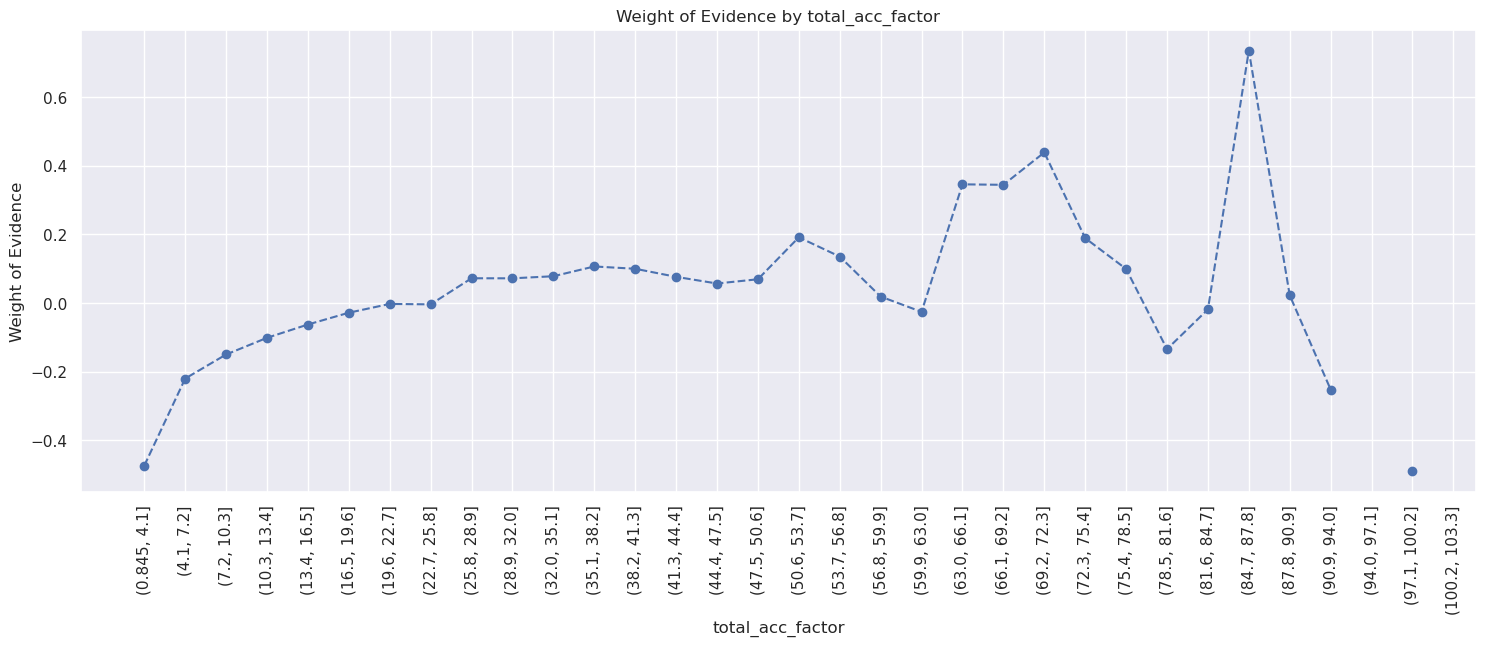

In [122]:
plot_by_woe(df_temp, 90)

Categories identified

1. <=27'
2. '28-51'
3. '>51'


In [123]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

### 9. acc_now_delinq

In [124]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0             0.0  464553   0.890684    0.996286  413770.0  50783.0   
1             1.0    1623   0.893407    0.003481    1450.0    173.0   
2             2.0      92   0.902174    0.000197      83.0      9.0   
3             3.0      11   0.818182    0.000024       9.0      2.0   
4             4.0       4   1.000000    0.000009       4.0      0.0   
5             5.0       2   0.500000    0.000004       1.0      1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.996275    0.996370 -0.000095             NaN       NaN  inf  
1     0.003491    0.003394  0.028183        0.002723  0.028279  inf  
2     0.000200    0.000177  0.123772        0.008767  0.095589  inf  
3     0.000022    0.000039 -0.593767        0.083992  0.717539  inf  
4     0.000010    0.000000       inf        0.181818       inf  inf  
5     0.000002    0.000020 -2.097844        0.500000       inf  inf

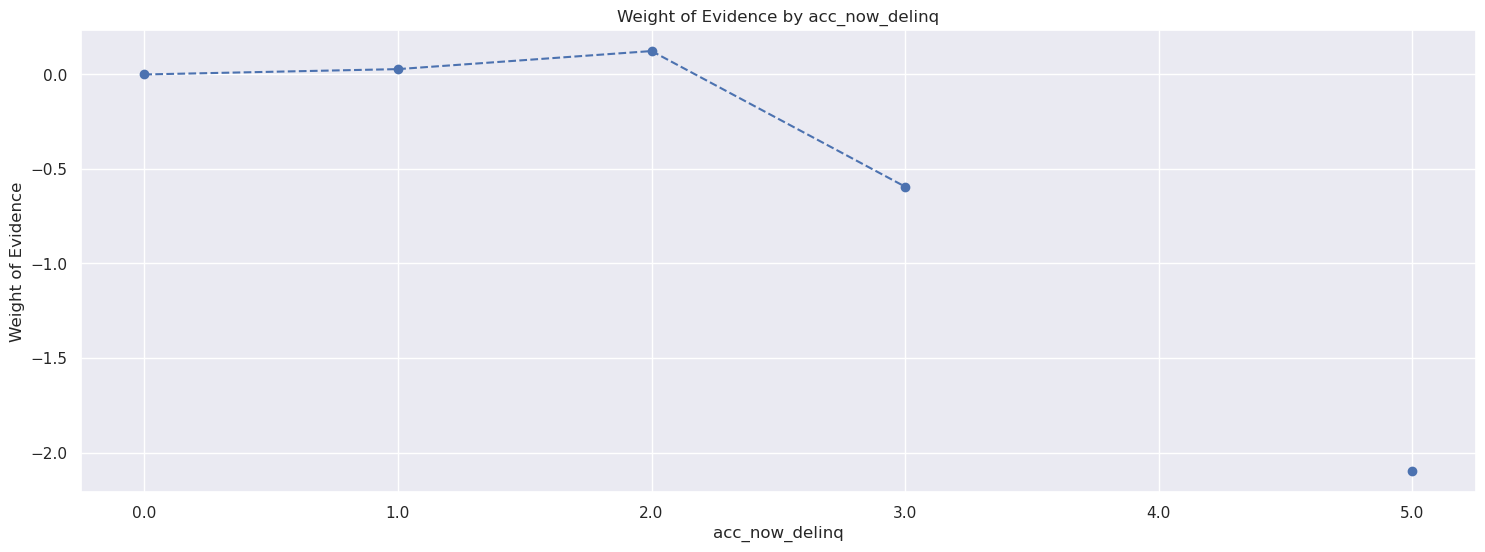

In [125]:
plot_by_woe(df_temp)

Categories identified

1. 0

2. ">=1"



In [126]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

### 10. total_rev_hi_lim

In [127]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp.tail(50)

/tmp/ipykernel_215/2487834626.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_215/2487834626.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
1950  (9749999.025, 9754999.024]      0        NaN    0.000000     NaN    NaN   
1951  (9754999.024, 9759999.024]      0        NaN    0.000000     NaN    NaN   
1952  (9759999.024, 9764999.024]      0        NaN    0.000000     NaN    NaN   
1953  (9764999.024, 9769999.023]      0        NaN    0.000000     NaN    NaN   
1954  (9769999.023, 9774999.022]      0        NaN    0.000000     NaN    NaN   
1955  (9774999.022, 9779999.022]      0        NaN    0.000000     NaN    NaN   
1956  (9779999.022, 9784999.022]      0        NaN    0.000000     NaN    NaN   
1957  (9784999.022, 9789999.021]      0        NaN    0.000000     NaN    NaN   
1958   (9789999.021, 9794999.02]      0        NaN    0.000000     NaN    NaN   
1959    (9794999.02, 9799999.02]      0        NaN    0.000000     NaN    NaN   
1960    (9799999.02, 9804999.02]      0        NaN    0.000000     NaN    NaN   
1961   (9804999.02, 9809999.019]      0        NaN    0.000000     NaN    NaN   
1962  (9809999.019, 9814999.018]      0        NaN    0.000000     NaN    NaN   
1963  (9814999.018, 9819999.018]      0        NaN    0.000000     NaN    NaN   
1964  (9819999.018, 9824999.018]      0        NaN    0.000000     NaN    NaN   
1965  (9824999.018, 9829999.017]      0        NaN    0.000000     NaN    NaN   
1966  (9829999.017, 9834999.016]      0        NaN    0.000000     NaN    NaN   
1967  (9834999.016, 9839999.016]      0        NaN    0.000000     NaN    NaN   
1968  (9839999.016, 9844999.016]      0        NaN    0.000000     NaN    NaN   
1969  (9844999.016, 9849999.015]      0        NaN    0.000000     NaN    NaN   
1970  (9849999.015, 9854999.014]      0        NaN    0.000000     NaN    NaN   
1971  (9854999.014, 9859999.014]      0        NaN    0.000000     NaN    NaN   
1972  (9859999.014, 9864999.014]      0        NaN    0.000000     NaN    NaN   
1973  (9864999.014, 9869999.013]      0        NaN    0.000000     NaN    NaN   
1974  (9869999.013, 9874999.012]      0        NaN    0.000000     NaN    NaN   
1975  (9874999.012, 9879999.012]      0        NaN    0.000000     NaN    NaN   
1976  (9879999.012, 9884999.012]      0        NaN    0.000000     NaN    NaN   
1977  (9884999.012, 9889999.011]      0        NaN    0.000000     NaN    NaN   
1978   (9889999.011, 9894999.01]      0        NaN    0.000000     NaN    NaN   
1979    (9894999.01, 9899999.01]      0        NaN    0.000000     NaN    NaN   
1980    (9899999.01, 9904999.01]      0        NaN    0.000000     NaN    NaN   
1981   (9904999.01, 9909999.009]      0        NaN    0.000000     NaN    NaN   
1982  (9909999.009, 9914999.008]      0        NaN    0.000000     NaN    NaN   
1983  (9914999.008, 9919999.008]      0        NaN    0.000000     NaN    NaN   
1984  (9919999.008, 9924999.008]      0        NaN    0.000000     NaN    NaN   
1985  (9924999.008, 9929999.007]      0        NaN    0.000000     NaN    NaN   
1986  (9929999.007, 9934999.006]      0        NaN    0.000000     NaN    NaN   
1987  (9934999.006, 9939999.006]      0        NaN    0.000000     NaN    NaN   
1988  (9939999.006, 9944999.006]      0        NaN    0.000000     NaN    NaN   
1989  (9944999.006, 9949999.005]      0        NaN    0.000000     NaN    NaN   
1990  (9949999.005, 9954999.004]      0        NaN    0.000000     NaN    NaN   
1991  (9954999.004, 9959999.004]      0        NaN    0.000000     NaN    NaN   
1992  (9959999.004, 9964999.004]      0        NaN    0.000000     NaN    NaN   
1993  (9964999.004, 9969999.003]      0        NaN    0.000000     NaN    NaN   
1994  (9969999.003, 9974999.002]      0        NaN    0.000000     NaN    NaN   
1995  (9974999.002, 9979999.002]      0        NaN    0.000000     NaN    NaN   
1996  (9979999.002, 9984999.002]      0        NaN    0.000000     NaN    NaN   
1997  (9984999.002, 9989999.001]      0        NaN    0.000000     NaN    NaN   
1998    (9989999.001, 9994999.0]      0 

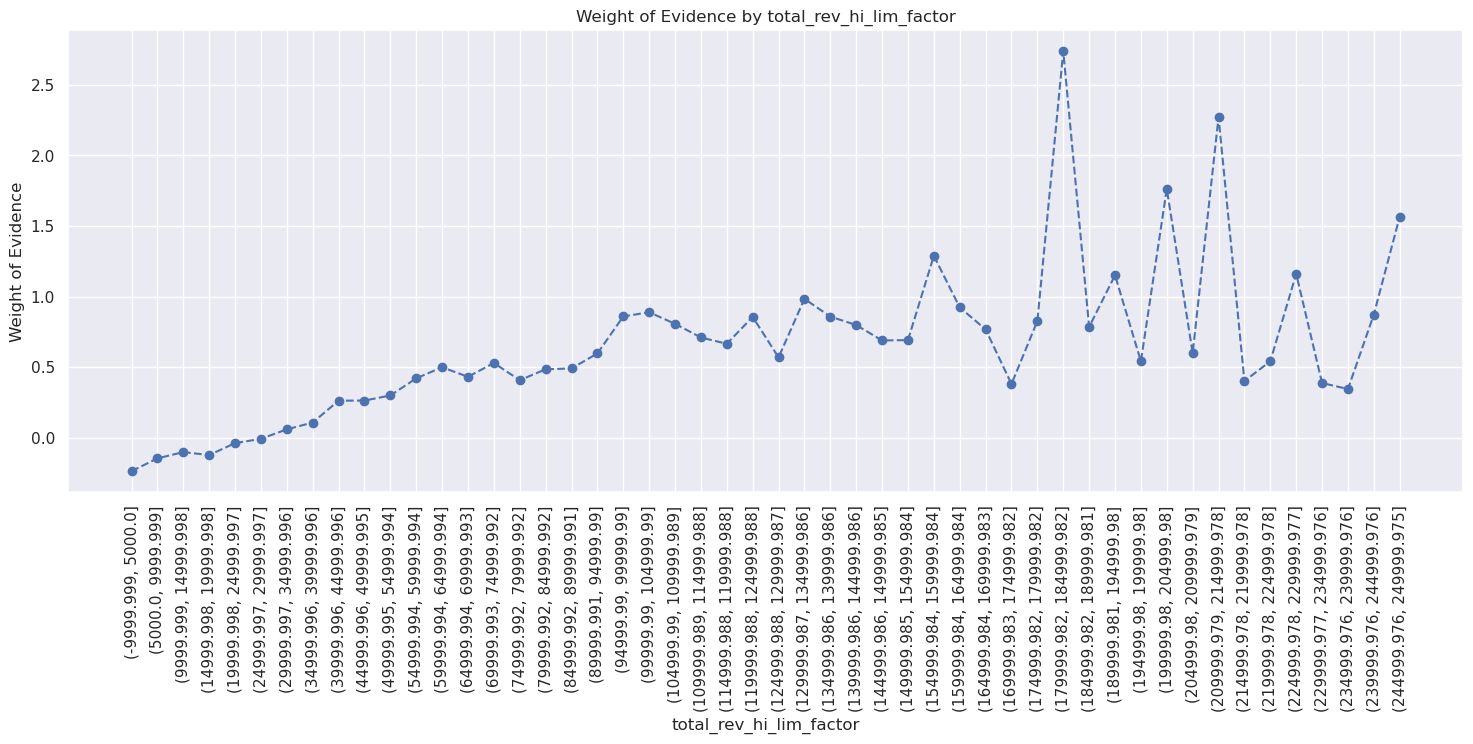

In [128]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

Categories identified

1.  '<=5K'

2.   '5K-10K'

3. '10K-20K'

4. '20K-30K'

5. '30K-40K'

6. '40K-55K'

7. '55K-95K'

8. '>95K'

In [129]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

## IV. Creating dummy variables for continuous features (special case)


Some features like annual_inc might have high variance. Such variables require some special handling


### 1. annual_inc

In [130]:
# Create a feature named "annual_inc_factor" using pd.cut (Fine classing)

df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)

# Compute WoE

df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)


df_temp

/tmp/ipykernel_215/2487834626.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_215/2487834626.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  \
0     (-5602.104, 151858.08]  445843   0.888999    0.956160  396354.0   
1     (151858.08, 301820.16]   18425   0.926947    0.039514   17079.0   
2     (301820.16, 451782.24]    1368   0.933480    0.002934    1277.0   
3     (451782.24, 601744.32]     372   0.940860    0.000798     350.0   
4      (601744.32, 751706.4]     115   0.904348    0.000247     104.0   
5      (751706.4, 901668.48]      73   0.904110    0.000157      66.0   
6    (901668.48, 1051630.56]      33   0.969697    0.000071      32.0   
7   (1051630.56, 1201592.64]      21   1.000000    0.000045      21.0   
8   (1201592.64, 1351554.72]      10   0.900000    0.000021       9.0   
9    (1351554.72, 1501516.8]       6   1.000000    0.000013       6.0   
10   (1501516.8, 1651478.88]       2   1.000000    0.000004       2.0   
11  (1651478.88, 1801440.96]       1   1.000000    0.000002       1.0   
12  (1801440.96, 1951403.04]       2   1.000000    0.000004       2.0   
13  (1951403.04, 2101365.12]       5   1.000000    0.000011       5.0   
14   (2101365.12, 2251327.2]       0        NaN    0.000000       NaN   
15   (2251327.2, 2401289.28]       0        NaN    0.000000       NaN   
16  (2401289.28, 2551251.36]       0        NaN    0.000000       NaN   
17  (2551251.36, 2701213.44]       0        NaN    0.000000       NaN   
18  (2701213.44, 2851175.52]       0        NaN    0.000000       NaN   
19   (2851175.52, 3001137.6]       0        NaN    0.000000       NaN   
20   (3001137.6, 3151099.68]       0        NaN    0.000000       NaN   
21  (3151099.68, 3301061.76]       0        NaN    0.000000       NaN   
22  (3301061.76, 3451023.84]       0        NaN    0.000000       NaN   
23  (3451023.84, 3600985.92]       0        NaN    0.000000       NaN   
24   (3600985.92, 3750948.0]       0        NaN    0.000000       NaN   
25   (3750948.0, 3900910.08]       1   1.000000    0.000002       1.0   
26  (3900910.08, 4050872.16]       0        NaN    0.000000       NaN   
27  (4050872.16, 4200834.24]       0        NaN    0.000000       NaN   
28  (4200834.24, 4350796.32]       0        NaN    0.000000       NaN   
29   (4350796.32, 4500758.4]       0        NaN    0.000000       NaN   
30   (4500758.4, 4650720.48]       1   1.000000    0.000002       1.0   
31  (4650720.48, 4800682.56]       0        NaN    0.000000       NaN   
32  (4800682.56, 4950644.64]       1   1.000000    0.000002       1.0   
33  (4950644.64, 5100606.72]       1   1.000000    0.000002       1.0   
34   (5100606.72, 5250568.8]       0        NaN    0.000000       NaN   
35   (5250568.8, 5400530.88]       0        NaN    0.000000       NaN   
36  (5400530.88, 5550492.96]       0        NaN    0.000000       NaN   
37  (5550492.96, 5700455.04]       0        NaN    0.000000       NaN   
38  (5700455.04, 5850417.12]       0        NaN    0.000000       NaN   
39   (5850417.12, 6000379.2]       1   1.000000    0.000002       1.0   
40   (6000379.2, 6150341.28]       1   1.000000    0.000002       1.0   
41  (6150341.28, 6300303.36]       0        NaN    0.000000       NaN   
42  (6300303.36, 6450265.44]       0        NaN    0.000000       NaN   
43  (6450265.44, 6600227.52]       0        NaN    0.000000       NaN   
44   (6600227.52, 6750189.6]       0        NaN    0.000000       NaN   
45   (6750189.6, 6900151.68]       0        NaN    0.000000       NaN   
46  (6900151.68, 7050113.76]       0        NaN    0.000000       NaN   
47  (7050113.76, 7200075.84]       1   1.000000    0.000002       1.0   
48  (7200075.84, 7350037.92]       0        NaN    0.000000       NaN   
49   (7350037.92, 7500000.0]       2   1.000000    0.000004       2.0   

      n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   49489.0     0.954341    0.970982 -0.017287             NaN       NaN  inf  
1    1346.0     0.041123    0.026409  0.442868        0.037948  0.460155  inf  
2      91.0     0.003075    0.001785  0.543565 

The problem with this categorisation is that the first interval (category) contains 351904 samples which is 94.33% of the total samples. 50 categories dont seem to be enough.
So we need more classes. We can try with 100 This is somewhat arbitrary



In [131]:
# Create a feature named "annual_inc_factor" using pd.cut (Fine classing)
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)

# Compute WoE
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)

df_temp.head(50)

/tmp/ipykernel_215/2487834626.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_215/2487834626.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  \
0      (-5602.104, 76877.04]  306443   0.877357    0.657201  268860.0   
1      (76877.04, 151858.08]  139400   0.914591    0.298959  127494.0   
2     (151858.08, 226839.12]   14866   0.926880    0.031882   13779.0   
3     (226839.12, 301820.16]    3559   0.927227    0.007633    3300.0   
4      (301820.16, 376801.2]     867   0.929642    0.001859     806.0   
5      (376801.2, 451782.24]     501   0.940120    0.001074     471.0   
6     (451782.24, 526763.28]     232   0.952586    0.000498     221.0   
7     (526763.28, 601744.32]     140   0.921429    0.000300     129.0   
8     (601744.32, 676725.36]      55   0.890909    0.000118      49.0   
9      (676725.36, 751706.4]      60   0.916667    0.000129      55.0   
10     (751706.4, 826687.44]      29   0.827586    0.000062      24.0   
11    (826687.44, 901668.48]      44   0.954545    0.000094      42.0   
12    (901668.48, 976649.52]      13   0.923077    0.000028      12.0   
13   (976649.52, 1051630.56]      20   1.000000    0.000043      20.0   
14   (1051630.56, 1126611.6]      10   1.000000    0.000021      10.0   
15   (1126611.6, 1201592.64]      11   1.000000    0.000024      11.0   
16  (1201592.64, 1276573.68]       6   0.833333    0.000013       5.0   
17  (1276573.68, 1351554.72]       4   1.000000    0.000009       4.0   
18  (1351554.72, 1426535.76]       2   1.000000    0.000004       2.0   
19   (1426535.76, 1501516.8]       4   1.000000    0.000009       4.0   
20   (1501516.8, 1576497.84]       1   1.000000    0.000002       1.0   
21  (1576497.84, 1651478.88]       1   1.000000    0.000002       1.0   
22  (1651478.88, 1726459.92]       0        NaN    0.000000       NaN   
23  (1726459.92, 1801440.96]       1   1.000000    0.000002       1.0   
24   (1801440.96, 1876422.0]       0        NaN    0.000000       NaN   
25   (1876422.0, 1951403.04]       2   1.000000    0.000004       2.0   
26  (1951403.04, 2026384.08]       4   1.000000    0.000009       4.0   
27  (2026384.08, 2101365.12]       1   1.000000    0.000002       1.0   
28  (2101365.12, 2176346.16]       0        NaN    0.000000       NaN   
29   (2176346.16, 2251327.2]       0        NaN    0.000000       NaN   
30   (2251327.2, 2326308.24]       0        NaN    0.000000       NaN   
31  (2326308.24, 2401289.28]       0        NaN    0.000000       NaN   
32  (2401289.28, 2476270.32]       0        NaN    0.000000       NaN   
33  (2476270.32, 2551251.36]       0        NaN    0.000000       NaN   
34   (2551251.36, 2626232.4]       0        NaN    0.000000       NaN   
35   (2626232.4, 2701213.44]       0        NaN    0.000000       NaN   
36  (2701213.44, 2776194.48]       0        NaN    0.000000       NaN   
37  (2776194.48, 2851175.52]       0        NaN    0.000000       NaN   
38  (2851175.52, 2926156.56]       0        NaN    0.000000       NaN   
39   (2926156.56, 3001137.6]       0        NaN    0.000000       NaN   
40   (3001137.6, 3076118.64]       0        NaN    0.000000       NaN   
41  (3076118.64, 3151099.68]       0        NaN    0.000000       NaN   
42  (3151099.68, 3226080.72]       0        NaN    0.000000       NaN   
43  (3226080.72, 3301061.76]       0        NaN    0.000000       NaN   
44   (3301061.76, 3376042.8]       0        NaN    0.000000       NaN   
45   (3376042.8, 3451023.84]       0        NaN    0.000000       NaN   
46  (3451023.84, 3526004.88]       0        NaN    0.000000       NaN   
47  (3526004.88, 3600985.92]       0        NaN    0.000000       NaN   
48  (3600985.92, 3675966.96]       0        NaN    0.000000       NaN   
49   (3675966.96, 3750948.0]       0        NaN    0.000000       NaN   

      n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   37583.0     0.647361    0.737384 -0.130205             NaN       NaN  inf  
1   11906.0     0.306980    0.233598  0.273183        0.037234  0.403388  inf  
2    1087.0     0.033177    0.021327  0.441880 

The problem is somewhat alleviated but still persists. The first category now contains 231445 samples which is 62% of the total samples.

This distribution makes sense for annual_inc because sameples with high annual income would be less than the number of samples with low annual income.

One strategy could be treat high income and low income as two seperate categories

Lets create a category having annual income greater than 140K

In [132]:
# Collecting all samples with annual_inc <=140k into a dataframe

df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

In [133]:
# Fine classing using just the samples having annual_inc <= 140K

df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

# Compute WoE
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])

df_temp

/tmp/ipykernel_215/3771464214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
/tmp/ipykernel_215/2487834626.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_215/2487834626.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observe

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (1757.896, 4658.08]     15   0.800000    0.000034     12.0     3.0   
1       (4658.08, 7420.16]     46   0.782609    0.000105     36.0    10.0   
2      (7420.16, 10182.24]    371   0.857143    0.000846    318.0    53.0   
3     (10182.24, 12944.32]    675   0.816296    0.001538    551.0   124.0   
4      (12944.32, 15706.4]   1517   0.834542    0.003458   1266.0   251.0   
5      (15706.4, 18468.48]   1909   0.844421    0.004351   1612.0   297.0   
6     (18468.48, 21230.56]   3678   0.851550    0.008383   3132.0   546.0   
7     (21230.56, 23992.64]   3200   0.845625    0.007293   2706.0   494.0   
8     (23992.64, 26754.72]   8833   0.851240    0.020132   7519.0  1314.0   
9      (26754.72, 29516.8]   7008   0.856450    0.015973   6002.0  1006.0   
10     (29516.8, 32278.88]  14904   0.858629    0.033969  12797.0  2107.0   
11    (32278.88, 35040.96]  15290   0.860039    0.034849  13150.0  2140.0   
12    (35040.96, 37803.04]   9955   0.857760    0.022689   8539.0  1416.0   
13    (37803.04, 40565.12]  22378   0.867280    0.051004  19408.0  2970.0   
14     (40565.12, 43327.2]  15489   0.869068    0.035302  13461.0  2028.0   
15     (43327.2, 46089.28]  20592   0.873883    0.046933  17995.0  2597.0   
16    (46089.28, 48851.36]  12383   0.878785    0.028223  10882.0  1501.0   
17    (48851.36, 51613.44]  23860   0.879505    0.054381  20985.0  2875.0   
18    (51613.44, 54375.52]  15900   0.884969    0.036239  14071.0  1829.0   
19     (54375.52, 57137.6]  20106   0.885358    0.045825  17801.0  2305.0   
20     (57137.6, 59899.68]   8059   0.882988    0.018368   7116.0   943.0   
21    (59899.68, 62661.76]  26679   0.881480    0.060806  23517.0  3162.0   
22    (62661.76, 65423.84]  20065   0.891253    0.045732  17883.0  2182.0   
23    (65423.84, 68185.92]   9987   0.899469    0.022762   8983.0  1004.0   
24     (68185.92, 70948.0]  16174   0.894213    0.036864  14463.0  1711.0   
25     (70948.0, 73710.08]  10449   0.900660    0.023815   9411.0  1038.0   
26    (73710.08, 76472.16]  16520   0.900847    0.037652  14882.0  1638.0   
27    (76472.16, 79234.24]   7110   0.901266    0.016205   6408.0   702.0   
28    (79234.24, 81996.32]  14359   0.903266    0.032727  12970.0  1389.0   
29     (81996.32, 84758.4]   7563   0.913262    0.017237   6907.0   656.0   
30     (84758.4, 87520.48]  12442   0.907973    0.028358  11297.0  1145.0   
31    (87520.48, 90282.56]  12931   0.910834    0.029472  11778.0  1153.0   
32    (90282.56, 93044.64]   5453   0.914726    0.012428   4988.0   465.0   
33    (93044.64, 95806.72]   7068   0.916101    0.016109   6475.0   593.0   
34     (95806.72, 98568.8]   5857   0.910705    0.013349   5334.0   523.0   
35    (98568.8, 101330.88]  10974   0.912885    0.025012  10018.0   956.0   
36  (101330.88, 104092.96]   4046   0.916461    0.009222   3708.0   338.0   
37  (104092.96, 106855.04]   4685   0.925720    0.010678   4337.0   348.0   
38  (106855.04, 109617.12]   2880   0.921875    0.006564   2655.0   225.0   
39   (109617.12, 112379.2]   7125   0.914947    0.016239   6519.0   606.0   
40   (112379.2, 115141.28]   4016   0.932520    0.009153   3745.0   271.0   
41  (115141.28, 117903.36]   1398   0.922031    0.003186   1289.0   109.0   
42  (117903.36, 120665.44]   7767   0.914639    0.017702   7104.0   663.0   
43  (120665.44, 123427.52]   1275   0.938039    0.002906   1196.0    79.0   
44   (123427.52, 126189.6]   4441   0.923215    0.010122   4100.0   341.0   
45   (126189.6, 128951.68]    992   0.922379    0.002261    915.0    77.0   
46  (128951.68, 131713.76]   3808   0.929622    0.008679   3540.0   268.0   
47  (131713.76, 134475.84]   1007   0.925521    0.002295    932.0    75.0   
48  (134475.84, 137237.92]   2354   0.937553    0.005365   2207.0   147.0   
49   (137237.92, 140000.0]   3160   0.920886    0.007202   2910.0   250.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    

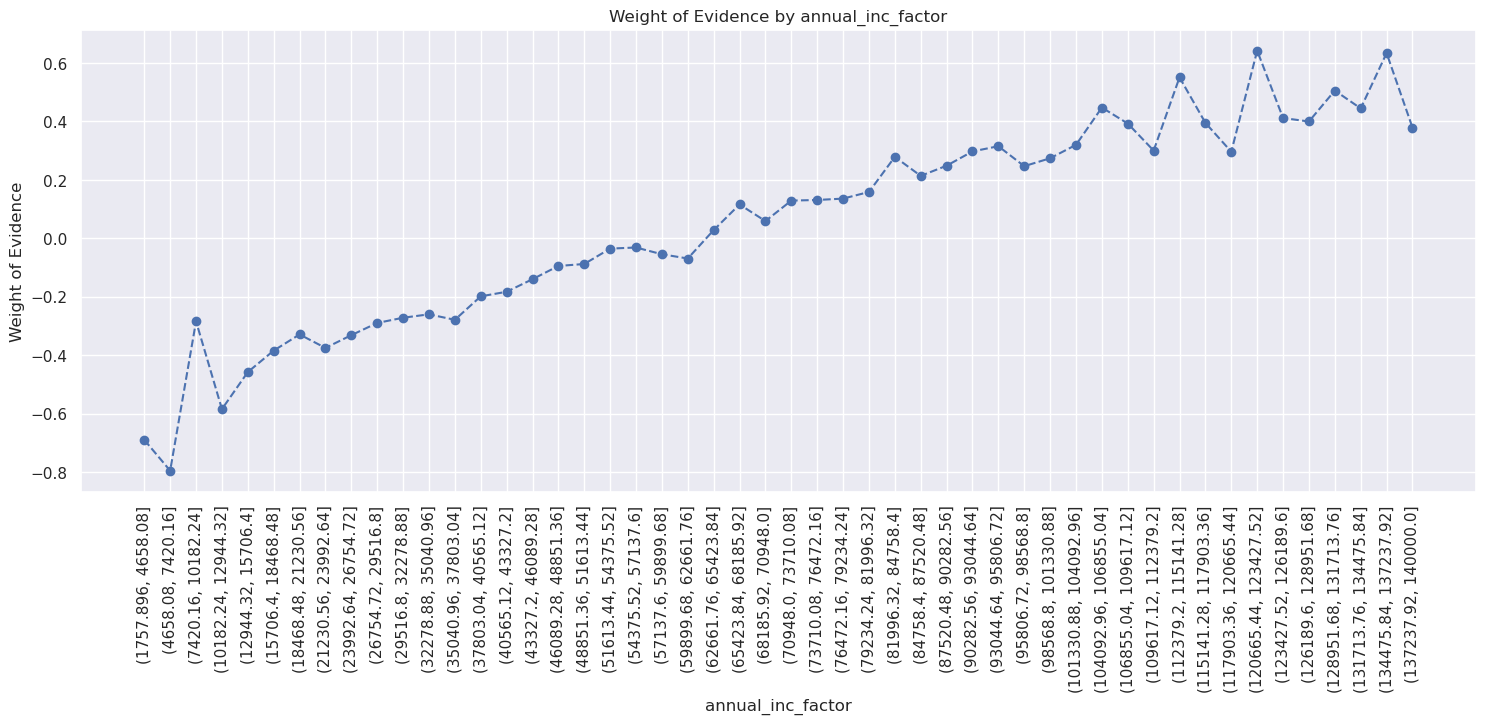

In [134]:
plot_by_woe(df_temp, 90)

WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.

All samples with more than 140K annual_inc will be in one category.

All samples with less than 20K annual inc will be in one category.

In [135]:
#Creating categories

df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

### 2. mths_since_last_delinq


In [136]:
# This feature has a lot of nulls
df_inputs_prepr['mths_since_last_delinq'].isnull().count()

466285

One strategy to deal with these missing values is to create a dummy variable that is set 1 when value is missing and 0 when value is not missing

For samples not having nulls we do the usual


In [137]:
#Fine classing samples which are not missing

df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]


df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/tmp/ipykernel_215/4264640992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
/tmp/ipykernel_215/2487834626.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_215/2487834626.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cur

mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                 (-0.188, 3.76]   6625   0.870943    0.030681   5770.0   
1                   (3.76, 7.52]  13834   0.886801    0.064066  12268.0   
2                  (7.52, 11.28]  16690   0.892331    0.077292  14893.0   
3                 (11.28, 15.04]  16547   0.888076    0.076630  14695.0   
4                  (15.04, 18.8]  11645   0.894805    0.053929  10420.0   
5                  (18.8, 22.56]  14579   0.892997    0.067516  13019.0   
6                 (22.56, 26.32]  13603   0.896052    0.062996  12189.0   
7                 (26.32, 30.08]  13221   0.895318    0.061227  11837.0   
8                 (30.08, 33.84]   9442   0.899492    0.043726   8493.0   
9                  (33.84, 37.6]  12168   0.898669    0.056351  10935.0   
10                 (37.6, 41.36]  11680   0.890411    0.054091  10400.0   
11                (41.36, 45.12]  11494   0.894119    0.053229  10277.0   
12                (45.12, 48.88]   8148   0.896784    0.037734   7307.0   
13                (48.88, 52.64]   8091   0.889260    0.037470   7195.0   
14                 (52.64, 56.4]   7563   0.893825    0.035025   6760.0   
15                 (56.4, 60.16]   7316   0.901449    0.033881   6595.0   
16                (60.16, 63.92]   5076   0.886525    0.023507   4500.0   
17                (63.92, 67.68]   6618   0.892415    0.030648   5906.0   
18                (67.68, 71.44]   6435   0.889666    0.029801   5725.0   
19                 (71.44, 75.2]   6157   0.888907    0.028513   5473.0   
20                 (75.2, 78.96]   4228   0.893567    0.019580   3778.0   
21                (78.96, 82.72]   4460   0.884978    0.020654   3947.0   
22                (82.72, 86.48]    118   0.796610    0.000546     94.0   
23                (86.48, 90.24]     46   0.913043    0.000213     42.0   
24                 (90.24, 94.0]     32   0.937500    0.000148     30.0   
25                 (94.0, 97.76]     25   0.760000    0.000116     19.0   
26               (97.76, 101.52]     17   0.941176    0.000079     16.0   
27              (101.52, 105.28]     13   0.923077    0.000060     12.0   
28              (105.28, 109.04]     11   0.818182    0.000051      9.0   
29               (109.04, 112.8]      3   0.666667    0.000014      2.0   
30               (112.8, 116.56]      8   0.875000    0.000037      7.0   
31              (116.56, 120.32]      4   1.000000    0.000019      4.0   
32              (120.32, 124.08]      4   1.000000    0.000019      4.0   
33              (124.08, 127.84]      2   1.000000    0.000009      2.0   
34               (127.84, 131.6]      6   1.000000    0.000028      6.0   
35               (131.6, 135.36]      8   0.750000    0.000037      6.0   
36              (135.36, 139.12]      2   1.000000    0.000009      2.0   
37              (139.12, 142.88]      3   1.000000    0.000014      3.0   
38              (142.88, 146.64]      2   1.000000    0.000009      2.0   
39               (146.64, 150.4]      3   0.666667    0.000014      2.0   
40               (150.4, 154.16]      2   0.500000    0.000009      1.0   
41              (154.16, 157.92]      1   1.000000    0.000005      1.0   
42              (157.92, 161.68]      1   1.000000    0.000005      1.0   
43              (161.68, 165.44]      0        NaN    0.000000      NaN   
44               (165.44, 169.2]      0        NaN    0.000000      NaN   
45               (169.2, 172.96]      1   1.000000    0.000005      1.0   
46              (172.96, 176.72]      0        NaN    0.000000      NaN   
47              (176.72, 180.48]      1   1.000000    0.000005      1.0   
48              (180.48, 184.24]      0        NaN    0.000000      NaN   
49               (184.24, 188.0]      1   1.000000    0.000005      1.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    855.0     0.029951    0.036720 -0.203783             NaN       NaN  inf  
1   1566.0     0.06

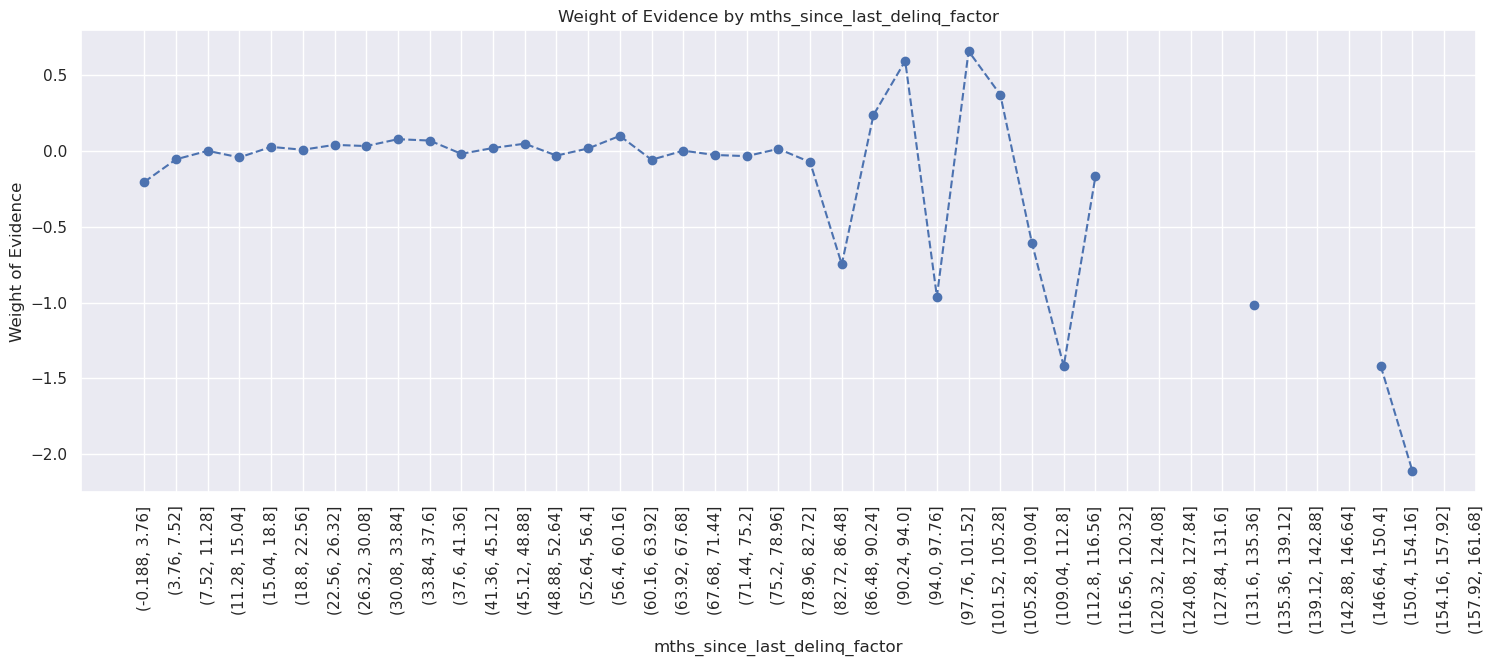

In [138]:
# Plot WoE
plot_by_woe(df_temp, 90)

Create the following categories

1. Missing

2. 0-3

3. 4-30

4. 31-56

5. ">=57"

In [139]:
# Create the categories
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### 3. dti


In [140]:
# Fine classing into 100 categories using pd.cut
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
#Compute WoE
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_215/2487834626.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_215/2487834626.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.4]    932   0.879828    0.001999   820.0  112.0   
1         (0.4, 0.8]    992   0.912298    0.002127   905.0   87.0   
2         (0.8, 1.2]   1145   0.896070    0.002456  1026.0  119.0   
3         (1.2, 1.6]   1298   0.898305    0.002784  1166.0  132.0   
4         (1.6, 2.0]   1487   0.900471    0.003189  1339.0  148.0   
5       (2.0, 2.399]   1661   0.916315    0.003562  1522.0  139.0   
6     (2.399, 2.799]   1904   0.916492    0.004083  1745.0  159.0   
7     (2.799, 3.199]   2138   0.905051    0.004585  1935.0  203.0   
8     (3.199, 3.599]   2411   0.907092    0.005171  2187.0  224.0   
9     (3.599, 3.999]   2760   0.911957    0.005919  2517.0  243.0   
10    (3.999, 4.399]   3065   0.917455    0.006573  2812.0  253.0   
11    (4.399, 4.799]   3232   0.915223    0.006931  2958.0  274.0   
12    (4.799, 5.199]   3612   0.912237    0.007746  3295.0  317.0   
13    (5.199, 5.599]   3904   0.911629    0.008373  3559.0  345.0   
14    (5.599, 5.999]   4093   0.915465    0.008778  3747.0  346.0   
15    (5.999, 6.398]   4418   0.910593    0.009475  4023.0  395.0   
16    (6.398, 6.798]   4744   0.917159    0.010174  4351.0  393.0   
17    (6.798, 7.198]   4920   0.912398    0.010551  4489.0  431.0   
18    (7.198, 7.598]   5296   0.913520    0.011358  4838.0  458.0   
19    (7.598, 7.998]   5678   0.914759    0.012177  5194.0  484.0   
20    (7.998, 8.398]   5849   0.911951    0.012544  5334.0  515.0   
21    (8.398, 8.798]   6022   0.910163    0.012915  5481.0  541.0   
22    (8.798, 9.198]   6410   0.909672    0.013747  5831.0  579.0   
23    (9.198, 9.598]   6500   0.905385    0.013940  5885.0  615.0   
24    (9.598, 9.998]   6842   0.910552    0.014673  6230.0  612.0   
25   (9.998, 10.397]   7050   0.907660    0.015120  6399.0  651.0   
26  (10.397, 10.797]   7345   0.908101    0.015752  6670.0  675.0   
27  (10.797, 11.197]   7671   0.899492    0.016451  6900.0  771.0   
28  (11.197, 11.597]   7765   0.908435    0.016653  7054.0  711.0   
29  (11.597, 11.997]   7857   0.904671    0.016850  7108.0  749.0   
30  (11.997, 12.397]   8064   0.905134    0.017294  7299.0  765.0   
31  (12.397, 12.797]   8508   0.898566    0.018246  7645.0  863.0   
32  (12.797, 13.197]   8281   0.906171    0.017760  7504.0  777.0   
33  (13.197, 13.597]   8486   0.900424    0.018199  7641.0  845.0   
34  (13.597, 13.997]   8561   0.896274    0.018360  7673.0  888.0   
35  (13.997, 14.396]   8579   0.901037    0.018399  7730.0  849.0   
36  (14.396, 14.796]   8854   0.903095    0.018988  7996.0  858.0   
37  (14.796, 15.196]   8719   0.898383    0.018699  7833.0  886.0   
38  (15.196, 15.596]   8506   0.901599    0.018242  7669.0  837.0   
39  (15.596, 15.996]   8811   0.894450    0.018896  7881.0  930.0   
40  (15.996, 16.396]   8515   0.895948    0.018261  7629.0  886.0   
41  (16.396, 16.796]   8562   0.893483    0.018362  7650.0  912.0   
42  (16.796, 17.196]   8728   0.888863    0.018718  7758.0  970.0   
43  (17.196, 17.596]   8460   0.886998    0.018143  7504.0  956.0   
44  (17.596, 17.996]   8454   0.889993    0.018131  7524.0  930.0   
45  (17.996, 18.395]   8503   0.886981    0.018236  7542.0  961.0   
46  (18.395, 18.795]   8375   0.891463    0.017961  7466.0  909.0   
47  (18.795, 19.195]   8100   0.881605    0.017371  7141.0  959.0   
48  (19.195, 19.595]   8219   0.884414    0.017627  7269.0  950.0   
49  (19.595, 19.995]   8173   0.883519    0.017528  7221.0  952.0   
50  (19.995, 20.395]   7748   0.882550    0.016616  6838.0  910.0   
51  (20.395, 20.795]   7855   0.881349    0.016846  6923.0  932.0   
52  (20.795, 21.195]   7486   0.875768    0.016055  6556.0  930.0   
53  (21.195, 21.595]   7376   0.881643    0.015819  6503.0  873.0   
54  (21.595, 21.995]   7245   0.878537    0.015538  6365.0  880.0   
55  (21.995, 22.394]   6904   0.872683    0.014806  6025.0  879.0   
56  (22.394, 22.794]   6785   0.873250    0.014551  5925.0  860.0   
57  (22.

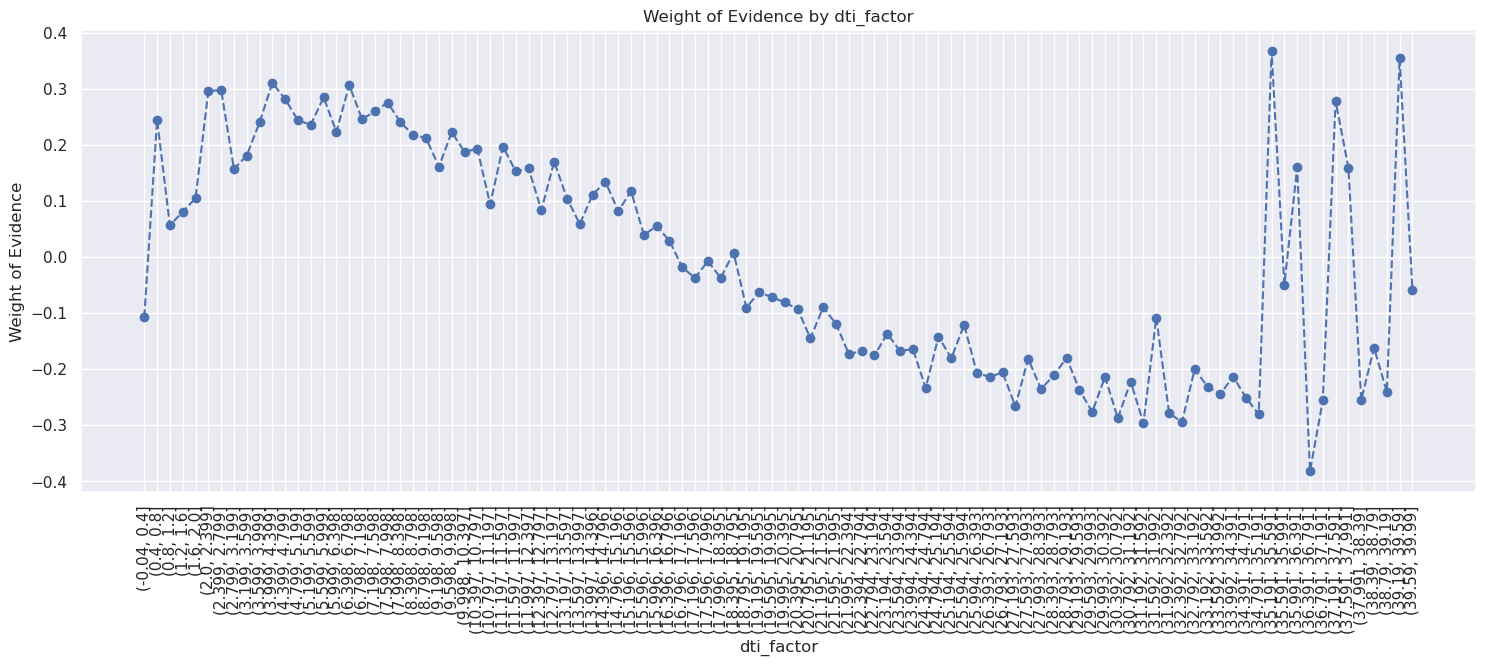

In [141]:
plot_by_woe(df_temp, 90)

Just  income, initial examination shows that most values are lower than 35.

Therefore, lets split into 2 groups one havig dti <= 35 and another having more than 35


In [142]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [143]:
# Fine classing using samples with dti <= 35
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
#Compute WoE
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/tmp/ipykernel_215/957868131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
/tmp/ipykernel_215/2487834626.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_215/2487834626.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt

dti_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0   (-0.035, 0.7]   1694   0.892562    0.003661   1512.0   182.0     0.003669   
1      (0.7, 1.4]   2057   0.894993    0.004446   1841.0   216.0     0.004467   
2      (1.4, 2.1]   2522   0.909199    0.005451   2293.0   229.0     0.005564   
3      (2.1, 2.8]   3201   0.913777    0.006918   2925.0   276.0     0.007097   
4      (2.8, 3.5]   3946   0.907501    0.008528   3581.0   365.0     0.008689   
5      (3.5, 4.2]   4814   0.913170    0.010404   4396.0   418.0     0.010667   
6      (4.2, 4.9]   5735   0.913862    0.012395   5241.0   494.0     0.012717   
7      (4.9, 5.6]   6682   0.912451    0.014442   6097.0   585.0     0.014794   
8      (5.6, 6.3]   7418   0.912780    0.016032   6771.0   647.0     0.016429   
9      (6.3, 7.0]   8204   0.914798    0.017731   7505.0   699.0     0.018210   
10     (7.0, 7.7]   9102   0.914195    0.019672   8321.0   781.0     0.020190   
11     (7.7, 8.4]  10164   0.912928    0.021967   9279.0   885.0     0.022515   
12     (8.4, 9.1]  10914   0.908649    0.023588   9917.0   997.0     0.024063   
13     (9.1, 9.8]  11513   0.908886    0.024883  10464.0  1049.0     0.025390   
14    (9.8, 10.5]  12407   0.908842    0.026815  11276.0  1131.0     0.027360   
15   (10.5, 11.2]  13177   0.901874    0.028479  11884.0  1293.0     0.028836   
16   (11.2, 11.9]  13522   0.907484    0.029224  12271.0  1251.0     0.029775   
17   (11.9, 12.6]  14410   0.903539    0.031144  13020.0  1390.0     0.031592   
18   (12.6, 13.3]  14556   0.901553    0.031459  13123.0  1433.0     0.031842   
19   (13.3, 14.0]  15099   0.898801    0.032633  13571.0  1528.0     0.032929   
20   (14.0, 14.7]  15280   0.902356    0.033024  13788.0  1492.0     0.033456   
21   (14.7, 15.4]  14895   0.899362    0.032192  13396.0  1499.0     0.032505   
22   (15.4, 16.1]  15167   0.898134    0.032780  13622.0  1545.0     0.033053   
23   (16.1, 16.8]  14968   0.893640    0.032350  13376.0  1592.0     0.032456   
24   (16.8, 17.5]  15300   0.887059    0.033067  13572.0  1728.0     0.032932   
25   (17.5, 18.2]  14885   0.892912    0.032170  13291.0  1594.0     0.032250   
26   (18.2, 18.9]  14616   0.883826    0.031589  12918.0  1698.0     0.031345   
27   (18.9, 19.6]  14038   0.884955    0.030340  12423.0  1615.0     0.030144   
28   (19.6, 20.3]  14058   0.882202    0.030383  12402.0  1656.0     0.030093   
29   (20.3, 21.0]  13817   0.881740    0.029862  12183.0  1634.0     0.029561   
30   (21.0, 21.7]  12802   0.879316    0.027668  11257.0  1545.0     0.027314   
31   (21.7, 22.4]  12292   0.874715    0.026566  10752.0  1540.0     0.026089   
32   (22.4, 23.1]  11736   0.872444    0.025364  10239.0  1497.0     0.024844   
33   (23.1, 23.8]  11556   0.876082    0.024975  10124.0  1432.0     0.024565   
34   (23.8, 24.5]  10985   0.872007    0.023741   9579.0  1406.0     0.023243   
35   (24.5, 25.2]  10044   0.870470    0.021708   8743.0  1301.0     0.021214   
36   (25.2, 25.9]   8651   0.874234    0.018697   7563.0  1088.0     0.018351   
37   (25.9, 26.6]   8333   0.869555    0.018010   7246.0  1087.0     0.017582   
38   (26.6, 27.3]   7721   0.869058    0.016687   6710.0  1011.0     0.016281   
39   (27.3, 28.0]   7424   0.867996    0.016045   6444.0   980.0     0.015636   
40   (28.0, 28.7]   6978   0.868014    0.015081   6057.0   921.0     0.014697   
41   (28.7, 29.4]   6460   0.868266    0.013962   5609.0   851.0     0.013610   
42   (29.4, 30.1]   5669   0.861528    0.012252   4884.0   785.0     0.011851   
43   (30.1, 30.8]   4289   0.864537    0.009270   3708.0   581.0     0.008997   
44   (30.8, 31.5]   4093   0.863425    0.008846   3534.0   559.0     0.008575   
45   (31.5, 32.2]   3679   0.874151    0.007951   3216.0   463.0     0.007803   
46   (32.2, 32.9]   3313   0.857833    0.007160   2842.0   471.0     0.006896   
47   (32.9, 33.6]   3059   0.867604    0.006611   2654.0   405.0     0.006440   
48   (33.6, 34.3]   2955   0.867682   

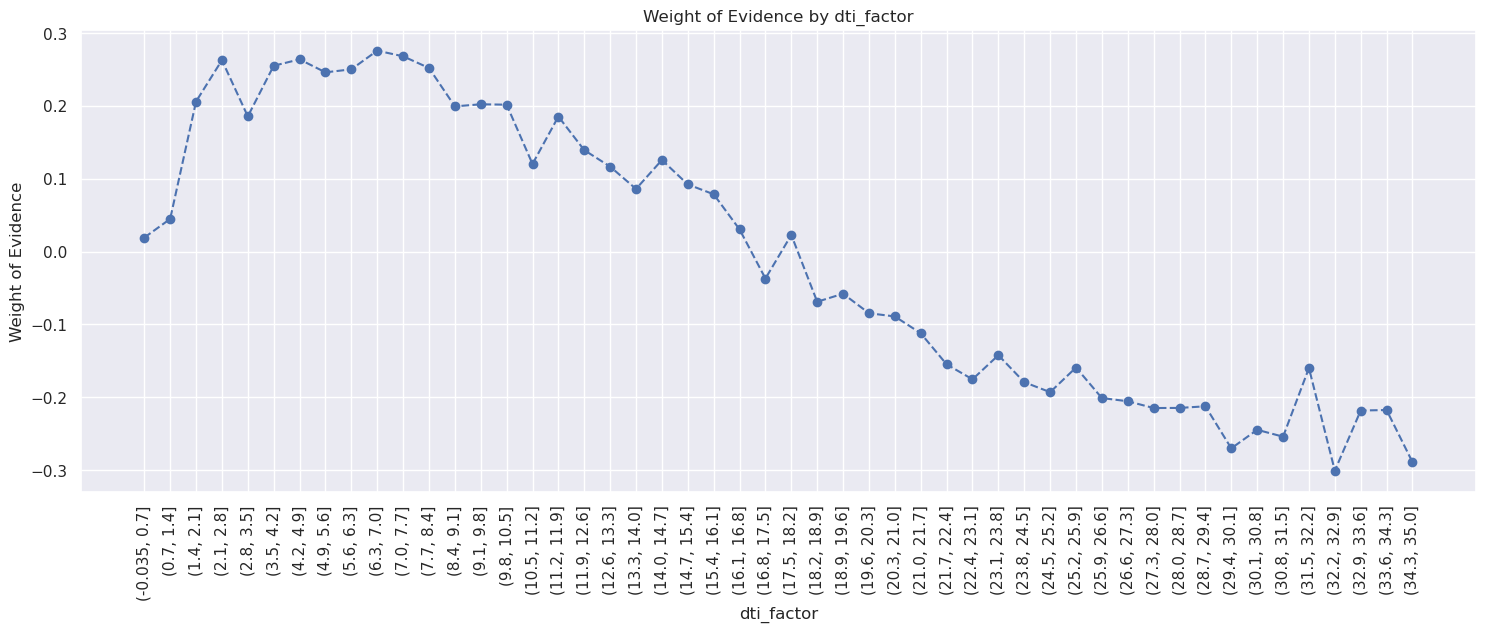

In [144]:
plot_by_woe(df_temp, 90)

In [145]:
# Create categories
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

/tmp/ipykernel_215/3043677853.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
/tmp/ipykernel_215/3043677853.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
/tmp/ipykernel_215/3043677853.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

### 4. mths_since_last_record

In [146]:
# Count missing values
df_inputs_prepr['mths_since_last_record'].isnull().count()

466285

In [147]:
# Create category having not nulls
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

# Fine classing using samples with not null values
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)

# Compute WoE
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])

df_temp

/tmp/ipykernel_215/1741104964.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
/tmp/ipykernel_215/1741104964.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
/tmp/ipykernel_215/2487834626.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a f

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.129, 2.58]   1330   0.760150    0.021233  1011.0  319.0   
1                   (2.58, 5.16]    156   0.897436    0.002491   140.0   16.0   
2                   (5.16, 7.74]    158   0.917722    0.002522   145.0   13.0   
3                  (7.74, 10.32]    306   0.915033    0.004885   280.0   26.0   
4                  (10.32, 12.9]    250   0.892000    0.003991   223.0   27.0   
5                  (12.9, 15.48]    387   0.906977    0.006178   351.0   36.0   
6                 (15.48, 18.06]    419   0.909308    0.006689   381.0   38.0   
7                 (18.06, 20.64]    308   0.931818    0.004917   287.0   21.0   
8                 (20.64, 23.22]    552   0.907609    0.008813   501.0   51.0   
9                  (23.22, 25.8]    400   0.905000    0.006386   362.0   38.0   
10                 (25.8, 28.38]    716   0.902235    0.011431   646.0   70.0   
11                (28.38, 30.96]    554   0.906137    0.008844   502.0   52.0   
12                (30.96, 33.54]    893   0.920493    0.014257   822.0   71.0   
13                (33.54, 36.12]    975   0.917949    0.015566   895.0   80.0   
14                 (36.12, 38.7]    825   0.930909    0.013171   768.0   57.0   
15                 (38.7, 41.28]   1242   0.919485    0.019828  1142.0  100.0   
16                (41.28, 43.86]   1006   0.924453    0.016061   930.0   76.0   
17                (43.86, 46.44]   1549   0.923822    0.024729  1431.0  118.0   
18                (46.44, 49.02]   1712   0.921145    0.027332  1577.0  135.0   
19                 (49.02, 51.6]   1212   0.919967    0.019349  1115.0   97.0   
20                 (51.6, 54.18]   2036   0.917976    0.032504  1869.0  167.0   
21                (54.18, 56.76]   1342   0.915797    0.021425  1229.0  113.0   
22                (56.76, 59.34]   2043   0.916789    0.032616  1873.0  170.0   
23                (59.34, 61.92]   1439   0.901320    0.022973  1297.0  142.0   
24                 (61.92, 64.5]   2090   0.913397    0.033366  1909.0  181.0   
25                 (64.5, 67.08]   2032   0.924705    0.032440  1879.0  153.0   
26                (67.08, 69.66]   1289   0.905353    0.020579  1167.0  122.0   
27                (69.66, 72.24]   1903   0.909091    0.030381  1730.0  173.0   
28                (72.24, 74.82]   1155   0.901299    0.018439  1041.0  114.0   
29                 (74.82, 77.4]   1792   0.903460    0.028609  1619.0  173.0   
30                 (77.4, 79.98]   1167   0.904027    0.018631  1055.0  112.0   
31                (79.98, 82.56]   1706   0.889215    0.027236  1517.0  189.0   
32                (82.56, 85.14]   1431   0.888190    0.022846  1271.0  160.0   
33                (85.14, 87.72]   1182   0.844332    0.018870   998.0  184.0   
34                 (87.72, 90.3]   1591   0.869893    0.025400  1384.0  207.0   
35                 (90.3, 92.88]   1192   0.864933    0.019030  1031.0  161.0   
36                (92.88, 95.46]   1970   0.859898    0.031451  1694.0  276.0   
37                (95.46, 98.04]   2195   0.868793    0.035043  1907.0  288.0   
38               (98.04, 100.62]   1558   0.877407    0.024873  1367.0  191.0   
39               (100.62, 103.2]   2514   0.876691    0.040135  2204.0  310.0   
40               (103.2, 105.78]   1899   0.883623    0.030317  1678.0  221.0   
41              (105.78, 108.36]   2908   0.879986    0.046425  2559.0  349.0   
42              (108.36, 110.94]   2030   0.892118    0.032408  1811.0  219.0   
43              (110.94, 113.52]   2658   0.883747    0.042434  2349.0  309.0   
44               (113.52, 116.1]   2552   0.876176    0.040742  2236.0  316.0   
45               (116.1, 118.68]   1550   0.901290    0.024745  1397.0  153.0   
46              (118.68, 121.26]    463   0.872570    0.007392   404.0   59.0   
47              (121.26, 123.84]      0        NaN    0.000000     NaN    NaN   
48              (123.84, 126.42]  

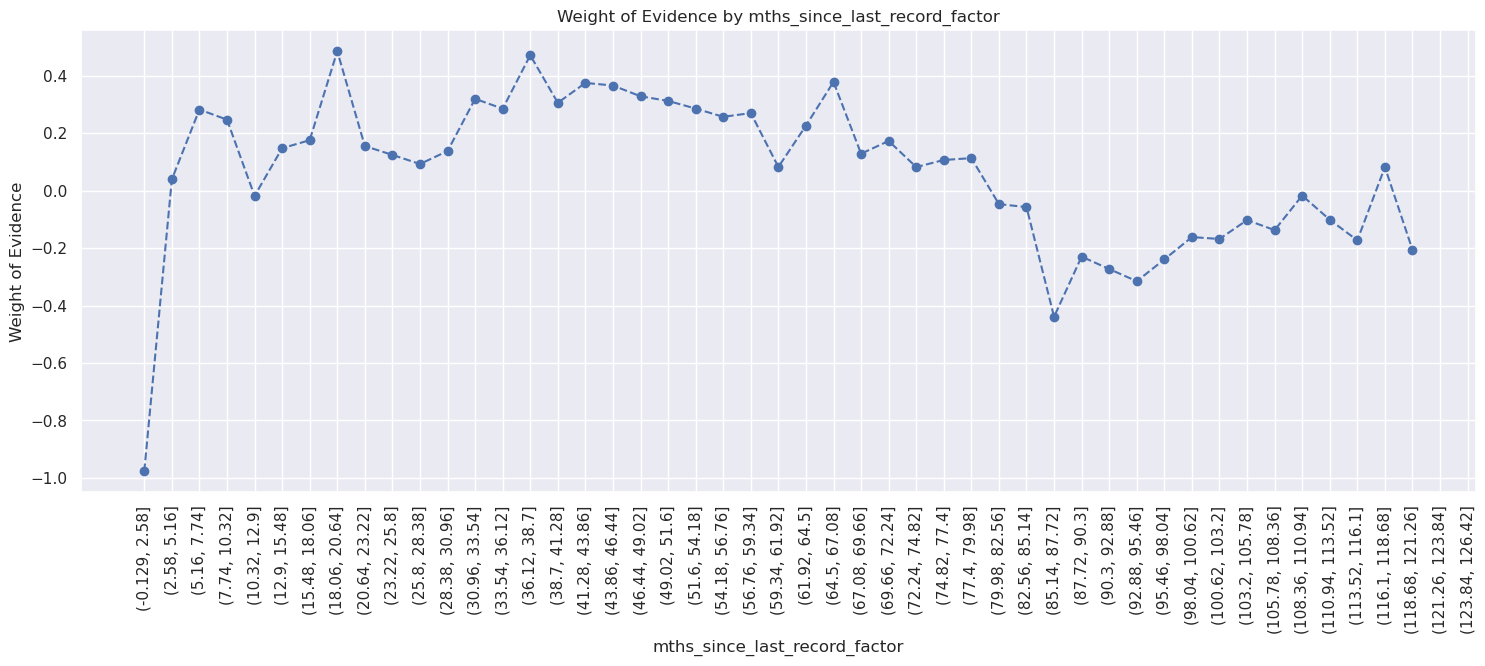

In [148]:
# Plot WoE
plot_by_woe(df_temp, 90)

In [149]:
# Create Categories

# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

/tmp/ipykernel_215/2203093046.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
/tmp/ipykernel_215/2203093046.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
/tmp/ipykernel_215/2203093046.py:6: PerformanceWarning: DataFrame is highly fragmente

In [150]:
df_inputs_prepr.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [151]:
df_inputs_prepr.shape

(466285, 322)

# Train - Test Split

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
# 80-20 split into train-test sets

loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(df_inputs_prepr,df_targets_prepr, test_size = 0.2, random_state = 42)

In [154]:
#Check the size
print (loan_data_inputs_train.shape)
print (loan_data_inputs_test.shape)
print (loan_data_targets_train.shape)
print (loan_data_targets_test.shape)

(373028, 322)
(93257, 322)
(373028,)
(93257,)


In [155]:
# Save the prepared datasets to pickle files

loan_data_inputs_train.to_pickle('loan_data_inputs_train.pkl')
loan_data_targets_train.to_pickle('loan_data_targets_train.pkl')
loan_data_inputs_test.to_pickle('loan_data_inputs_test.pkl')
loan_data_targets_test.to_pickle('loan_data_targets_test.pkl')

# Load data

In [156]:
loan_data_inputs_train = pd.read_pickle('loan_data_inputs_train.pkl')
loan_data_targets_train = pd.read_pickle('loan_data_targets_train.pkl')
loan_data_inputs_test = pd.read_pickle('loan_data_inputs_test.pkl')
loan_data_targets_test = pd.read_pickle('loan_data_targets_test.pkl')

In [157]:
loan_data_inputs_train.head()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
427211      427211  12796369   14818505      24000        24000   
206088      206088   1439740    1691948      10000        10000   
136020      136020   5214749    6556909      20425        20425   
412305      412305  13827698   15890016      17200        17200   
36159        36159    422455     496525       8400         8400   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
427211          24000.0   36 months      8.90       762.08     A        A5   
206088          10000.0   36 months     14.33       343.39     C        C1   
136020          20425.0   36 months      8.90       648.56     A        A5   
412305          17200.0   36 months     16.59       609.73     D        D1   
36159            7450.0   36 months     12.84       282.40     C        C2   

                               emp_title emp_length home_ownership  \
427211  Supervisor inventory management     3 years       MORTGAGE   
206088             mizuho corporate bank    6 years       MORTGAGE   
136020      Internal Medicine of Griffin  10+ years       MORTGAGE   
412305          Administrative Assistant    7 years           RENT   
36159                          Bank of A    5 years       MORTGAGE   

        annual_inc verification_status issue_d         loan_status pymnt_plan  \
427211     77000.0     Source Verified  Mar-14             Current          n   
206088    112000.0        Not Verified  Aug-12          Fully Paid          n   
136020     84000.0            Verified  Jun-13             Current          n   
412305     43000.0     Source Verified  Apr-14  Late (31-120 days)          n   
36159      94000.0            Verified  Jul-09         Charged Off          n   

                                                      url  \
427211  https://www.lendingclub.com/browse/loanDetail....   
206088  https://www.lendingclub.com/browse/loanDetail....   
136020  https://www.lendingclub.com/browse/loanDetail....   
412305  https://www.lendingclub.com/browse/loanDetail....   
36159   https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
427211    Borrower added on 03/12/14 > I have 5 credit...  debt_consolidation   
206088    Borrower added on 07/23/12 > I was looking f...  debt_consolidation   
136020                                                NaN  debt_consolidation   
412305                                                NaN  debt_consolidation   
36159   Unexpectd California tuition hike - Need help ...         educational   

                            title zip_code addr_state    dti  delinq_2yrs  \
427211         Debt consolidation    295xx         SC  21.91          0.0   
206088  Credit card consolidation    070xx         NJ   7.49          1.0   
136020                  Lend Club    302xx         GA  14.83          0.0   
412305         Debt consolidation    015xx         MA  13.68          1.0   
36159                Student Loan    913xx         CA  22.54          0.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
427211           Dec-86             1.0                     NaN   
206088           Dec-97             2.0                    18.0   
136020           Jul-91             1.0                    46.0   
412305           Oct-98             3.0                     6.0   
36159            Jul-98             1.0                     NaN   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
427211                     NaN      20.0      0.0      30489        53.5   
206088                     NaN      15.0      0.0      15836        53.1   
136020                     NaN       9.0      0.0      29813        89.5   
412305                     NaN       9.0      0.0       7523        60.2   
36159                      NaN      14.0      0.0      65621        81.5   

        total_acc initial_list_status  out_prncp  o

In [158]:
loan_data_targets_train.head()

427211    1
206088    1
136020    1
412305    0
36159     0
Name: good_bad, dtype: int64

In [159]:
loan_data_inputs_test.head()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
362514      362514  19677589   21900299      32500        32500   
288564      288564  29755527   32278795      11000        11000   
213591      213591   1343334    1588314      30000        30000   
263083      263083  33131681   35775007      14400        14400   
165001      165001   3293168    4066358      15000        15000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
362514          32500.0   60 months     14.99       773.01     C        C5   
288564          11000.0   60 months     20.99       297.53     E        E4   
213591          30000.0   36 months     14.65      1034.83     C        C2   
263083          14400.0   60 months     14.49       338.74     C        C4   
165001          14900.0   36 months      8.90       476.30     A        A5   

                         emp_title emp_length home_ownership  annual_inc  \
362514  Licensed vocational nurse    < 1 year       MORTGAGE     65000.0   
288564               shift manager  10+ years       MORTGAGE     60000.0   
213591         FastMed urgent care     1 year       MORTGAGE    175000.0   
263083            Registered Nurse    2 years       MORTGAGE     66000.0   
165001               Courier Times  10+ years       MORTGAGE     85000.0   

       verification_status issue_d loan_status pymnt_plan  \
362514            Verified  Jul-14  Fully Paid          n   
288564            Verified  Oct-14     Current          n   
213591            Verified  Jun-12  Fully Paid          n   
263083     Source Verified  Nov-14     Current          n   
165001            Verified  Feb-13  Fully Paid          n   

                                                      url  \
362514  https://www.lendingclub.com/browse/loanDetail....   
288564  https://www.lendingclub.com/browse/loanDetail....   
213591  https://www.lendingclub.com/browse/loanDetail....   
263083  https://www.lendingclub.com/browse/loanDetail....   
165001  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
362514                                                NaN    home_improvement   
288564                                                NaN         credit_card   
213591    Borrower added on 06/06/12 > I am seeking a ...  debt_consolidation   
263083                                                NaN  debt_consolidation   
165001    Borrower added on 02/06/13 > I need to cosol...  debt_consolidation   

                          title zip_code addr_state    dti  delinq_2yrs  \
362514         Home improvement    950xx         CA   9.32          0.0   
288564  Credit card refinancing    472xx         IN  24.19          1.0   
213591       Debt Consolidation    852xx         AZ  13.34          0.0   
263083       Debt consolidation    498xx         MI  17.69          0.0   
165001         Consolidate 2013    190xx         PA   8.30          0.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
362514           Apr-02             0.0                     NaN   
288564           Aug-03             0.0                     3.0   
213591           Mar-02             0.0                    41.0   
263083           Aug-08             0.0                     NaN   
165001           Oct-86             0.0                    39.0   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
362514                     NaN       7.0      0.0       1208         4.3   
288564                     NaN      18.0      0.0      13129        54.7   
213591                     NaN       9.0      0.0       1906        22.4   
263083                     NaN      12.0      0.0      12944        74.4   
165001                     NaN       7.0      0.0       5902        67.8   

        total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
362514       20.0                   f       0.00           0.00  38

In [160]:
loan_data_targets_test.head()

362514    1
288564    1
213591    1
263083    1
165001    1
Name: good_bad, dtype: int64

In [161]:
#Sanity check
print (loan_data_inputs_train.shape)
print (loan_data_targets_train.shape)
print (loan_data_inputs_test.shape)
print (loan_data_targets_test.shape)

(373028, 322)
(373028,)
(93257, 322)
(93257,)


# PD Model Fitting Using XGBoost Classifier

In [162]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pickle

In [163]:
# Function to clean feature names
def clean_feature_names(df):
    df.columns = df.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)
    return df

In [164]:
# Assuming df_inputs_prepr and df_targets_prepr are your preprocessed input features and target variables
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(
    df_inputs_prepr, df_targets_prepr, test_size=0.2, random_state=42
)

In [165]:
# Clean the feature names
loan_data_inputs_train = clean_feature_names(loan_data_inputs_train)
loan_data_inputs_test = clean_feature_names(loan_data_inputs_test)

In [166]:
loan_data_inputs_train.head()

Unnamed__0        id  member_id  loan_amnt  funded_amnt  \
427211      427211  12796369   14818505      24000        24000   
206088      206088   1439740    1691948      10000        10000   
136020      136020   5214749    6556909      20425        20425   
412305      412305  13827698   15890016      17200        17200   
36159        36159    422455     496525       8400         8400   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
427211          24000.0   36 months      8.90       762.08     A        A5   
206088          10000.0   36 months     14.33       343.39     C        C1   
136020          20425.0   36 months      8.90       648.56     A        A5   
412305          17200.0   36 months     16.59       609.73     D        D1   
36159            7450.0   36 months     12.84       282.40     C        C2   

                               emp_title emp_length home_ownership  \
427211  Supervisor inventory management     3 years       MORTGAGE   
206088             mizuho corporate bank    6 years       MORTGAGE   
136020      Internal Medicine of Griffin  10+ years       MORTGAGE   
412305          Administrative Assistant    7 years           RENT   
36159                          Bank of A    5 years       MORTGAGE   

        annual_inc verification_status issue_d         loan_status pymnt_plan  \
427211     77000.0     Source Verified  Mar-14             Current          n   
206088    112000.0        Not Verified  Aug-12          Fully Paid          n   
136020     84000.0            Verified  Jun-13             Current          n   
412305     43000.0     Source Verified  Apr-14  Late (31-120 days)          n   
36159      94000.0            Verified  Jul-09         Charged Off          n   

                                                      url  \
427211  https://www.lendingclub.com/browse/loanDetail....   
206088  https://www.lendingclub.com/browse/loanDetail....   
136020  https://www.lendingclub.com/browse/loanDetail....   
412305  https://www.lendingclub.com/browse/loanDetail....   
36159   https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
427211    Borrower added on 03/12/14 > I have 5 credit...  debt_consolidation   
206088    Borrower added on 07/23/12 > I was looking f...  debt_consolidation   
136020                                                NaN  debt_consolidation   
412305                                                NaN  debt_consolidation   
36159   Unexpectd California tuition hike - Need help ...         educational   

                            title zip_code addr_state    dti  delinq_2yrs  \
427211         Debt consolidation    295xx         SC  21.91          0.0   
206088  Credit card consolidation    070xx         NJ   7.49          1.0   
136020                  Lend Club    302xx         GA  14.83          0.0   
412305         Debt consolidation    015xx         MA  13.68          1.0   
36159                Student Loan    913xx         CA  22.54          0.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
427211           Dec-86             1.0                     NaN   
206088           Dec-97             2.0                    18.0   
136020           Jul-91             1.0                    46.0   
412305           Oct-98             3.0                     6.0   
36159            Jul-98             1.0                     NaN   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
427211                     NaN      20.0      0.0      30489        53.5   
206088                     NaN      15.0      0.0      15836        53.1   
136020                     NaN       9.0      0.0      29813        89.5   
412305                     NaN       9.0      0.0       7523        60.2   
36159                      NaN      14.0      0.0      65621        81.5   

        total_acc initial_list_status  out_prncp  o

In [167]:
# Define the selected features
selected_features = [
    'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
    'home_ownership_RENT_OTHER_NONE_ANY', 'home_ownership_OWN', 'home_ownership_MORTGAGE',
    'addr_state_ND_NE_IA_NV_FL_HI_AL', 'addr_state_NM_VA', 'addr_state_NY',
    'addr_state_OK_TN_MO_LA_MD_NC', 'addr_state_CA', 'addr_state_UT_KY_AZ_NJ',
    'addr_state_AR_MI_PA_OH_MN', 'addr_state_RI_MA_DE_SD_IN', 'addr_state_GA_WA_OR',
    'addr_state_WI_MT', 'addr_state_TX', 'addr_state_IL_CT', 'addr_state_KS_SC_CO_VT_AK_MS',
    'addr_state_WV_NH_WY_DC_ME_ID', 'verification_status_Not_Verified', 
    'verification_status_Source_Verified', 'verification_status_Verified',
    'purpose_educ__sm_b__wedd__ren_en__mov__house', 'purpose_credit_card', 
    'purpose_debt_consolidation', 'purpose_oth__med__vacation', 'purpose_major_purch__car__home_impr',
    'initial_list_status_f', 'initial_list_status_w', 'term_36', 'term_60', 
    'emp_length_0', 'emp_length_1', 'emp_length_2_4', 'emp_length_5_6', 
    'emp_length_7_9', 'emp_length_10', 'mths_since_issue_d__38', 'mths_since_issue_d_38_39', 
    'mths_since_issue_d_40_41', 'mths_since_issue_d_42_48', 'mths_since_issue_d_49_52',
    'mths_since_issue_d_53_64', 'mths_since_issue_d_65_84', 'mths_since_issue_d__84', 
    'int_rate__9_548', 'int_rate_9_548_12_025', 'int_rate_12_025_15_74', 
    'int_rate_15_74_20_281', 'int_rate__20_281', 'mths_since_earliest_cr_line__140',
    'mths_since_earliest_cr_line_141_164', 'mths_since_earliest_cr_line_165_247', 
    'mths_since_earliest_cr_line_248_270', 'mths_since_earliest_cr_line_271_352',
    'mths_since_earliest_cr_line__352', 'delinq_2yrs_0', 'delinq_2yrs_1_3', 
    'delinq_2yrs___4', 'inq_last_6mths_0', 'inq_last_6mths_1_2', 'inq_last_6mths_3_6', 
    'inq_last_6mths__6', 'open_acc_0', 'open_acc_1_3', 'open_acc_4_12', 
    'open_acc_13_17', 'open_acc_18_22', 'open_acc_23_25', 'open_acc_26_30', 
    'open_acc___31', 'pub_rec_0_2', 'pub_rec_3_4', 'pub_rec___5', 'total_acc___27', 
    'total_acc_28_51', 'total_acc___52', 'acc_now_delinq_0', 'acc_now_delinq___1', 
    'total_rev_hi_lim___5K', 'total_rev_hi_lim_5K_10K', 'total_rev_hi_lim_10K_20K',
    'total_rev_hi_lim_20K_30K', 'total_rev_hi_lim_30K_40K', 'total_rev_hi_lim_40K_55K', 
    'total_rev_hi_lim_55K_95K', 'total_rev_hi_lim__95K', 'annual_inc__20K', 
    'annual_inc_20K_30K', 'annual_inc_30K_40K', 'annual_inc_40K_50K', 
    'annual_inc_50K_60K', 'annual_inc_60K_70K', 'annual_inc_70K_80K', 
    'annual_inc_80K_90K', 'annual_inc_90K_100K', 'annual_inc_100K_120K', 
    'annual_inc_120K_140K', 'annual_inc__140K', 'dti___1_4', 'dti_1_4_3_5', 
    'dti_3_5_7_7', 'dti_7_7_10_5', 'dti_10_5_16_1', 'dti_16_1_20_3', 'dti_20_3_21_7', 
    'dti_21_7_22_4', 'dti_22_4_35', 'dti__35', 'mths_since_last_delinq_Missing', 
    'mths_since_last_delinq_0_3', 'mths_since_last_delinq_4_30', 'mths_since_last_delinq_31_56', 
    'mths_since_last_delinq___57', 'mths_since_last_record_Missing', 'mths_since_last_record_0_2', 
    'mths_since_last_record_3_20', 'mths_since_last_record_21_31', 'mths_since_last_record_32_80', 
    'mths_since_last_record_81_86', 'mths_since_last_record__86'
]

# Create the DataFrame for training with selected features
inputs_train_with_ref_cat = loan_data_inputs_train[selected_features]
inputs_train_with_ref_cat.head()

grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
427211        1        0        0        0        0        0        0   
206088        0        0        1        0        0        0        0   
136020        1        0        0        0        0        0        0   
412305        0        0        0        1        0        0        0   
36159         0        0        1        0        0        0        0   

        home_ownership_RENT_OTHER_NONE_ANY  home_ownership_OWN  \
427211                                   0                   0   
206088                                   0                   0   
136020                                   0                   0   
412305                                   1                   0   
36159                                    0                   0   

        home_ownership_MORTGAGE  addr_state_ND_NE_IA_NV_FL_HI_AL  \
427211                        1                                0   
206088                        1                                0   
136020                        1                                0   
412305                        0                                0   
36159                         1                                0   

        addr_state_NM_VA  addr_state_NY  addr_state_OK_TN_MO_LA_MD_NC  \
427211                 0              0                             0   
206088                 0              0                             0   
136020                 0              0                             0   
412305                 0              0                             0   
36159                  0              0                             0   

        addr_state_CA  addr_state_UT_KY_AZ_NJ  addr_state_AR_MI_PA_OH_MN  \
427211              0                       0                          0   
206088              0                       1                          0   
136020              0                       0                          0   
412305              0                       0                          0   
36159               1                       0                          0   

        addr_state_RI_MA_DE_SD_IN  addr_state_GA_WA_OR  addr_state_WI_MT  \
427211                          0                    0                 0   
206088                          0                    0                 0   
136020                          0                    1                 0   
412305                          1                    0                 0   
36159                           0                    0                 0   

        addr_state_TX  addr_state_IL_CT  addr_state_KS_SC_CO_VT_AK_MS  \
427211              0                 0                             1   
206088              0                 0                             0   
136020              0                 0                             0   
412305              0                 0                             0   
36159               0                 0                             0   

        addr_state_WV_NH_WY_DC_ME_ID  verification_status_Not_Verified  \
427211                             0                                 0   
206088                             0                                 1   
136020                             0                                 0   
412305                             0                                 0   
36159                              0                                 0   

        verification_status_Source_Verified  verification_status_Verified  \
427211                                    1                             0   
206088                                    0                             0   
136020                                    0                             1   
412305                                    1                             0   
36159                                     0                             1   

        purpose_educ__sm_b__wedd__ren_en__mov__house  purpose_c

In [168]:
# Create the DataFrame for testing with selected features
inputs_test_with_ref_cat = loan_data_inputs_test[selected_features]
inputs_test_with_ref_cat.head()

grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
362514        0        0        1        0        0        0        0   
288564        0        0        0        0        1        0        0   
213591        0        0        1        0        0        0        0   
263083        0        0        1        0        0        0        0   
165001        1        0        0        0        0        0        0   

        home_ownership_RENT_OTHER_NONE_ANY  home_ownership_OWN  \
362514                                   0                   0   
288564                                   0                   0   
213591                                   0                   0   
263083                                   0                   0   
165001                                   0                   0   

        home_ownership_MORTGAGE  addr_state_ND_NE_IA_NV_FL_HI_AL  \
362514                        1                                0   
288564                        1                                0   
213591                        1                                0   
263083                        1                                0   
165001                        1                                0   

        addr_state_NM_VA  addr_state_NY  addr_state_OK_TN_MO_LA_MD_NC  \
362514                 0              0                             0   
288564                 0              0                             0   
213591                 0              0                             0   
263083                 0              0                             0   
165001                 0              0                             0   

        addr_state_CA  addr_state_UT_KY_AZ_NJ  addr_state_AR_MI_PA_OH_MN  \
362514              1                       0                          0   
288564              0                       0                          0   
213591              0                       1                          0   
263083              0                       0                          1   
165001              0                       0                          1   

        addr_state_RI_MA_DE_SD_IN  addr_state_GA_WA_OR  addr_state_WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state_TX  addr_state_IL_CT  addr_state_KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state_WV_NH_WY_DC_ME_ID  verification_status_Not_Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status_Source_Verified  verification_status_Verified  \
362514                                    0                             1   
288564                                    0                             1   
213591                                    0                             1   
263083                                    1                             0   
165001                                    0                             1   

        purpose_educ__sm_b__wedd__ren_en__mov__house  purpose_c

In [169]:
# Define the reference categories to be dropped
ref_categories = [
    'grade_G',
    'home_ownership_RENT_OTHER_NONE_ANY',
    'addr_state_ND_NE_IA_NV_FL_HI_AL',
    'verification_status_Verified',
    'purpose_educ__sm_b__wedd__ren_en__mov__house',
    'initial_list_status_f',
    'term_60',
    'emp_length_0',
    'mths_since_issue_d__84',
    'int_rate__20_281',
    'mths_since_earliest_cr_line__140',
    'delinq_2yrs___4',
    'inq_last_6mths__6',
    'open_acc_0',
    'pub_rec_0_2',
    'total_acc___27',
    'acc_now_delinq_0',
    'total_rev_hi_lim___5K',
    'annual_inc__20K',
    'dti__35',
    'mths_since_last_delinq_0_3',
    'mths_since_last_record_0_2'
]

In [170]:
# From the dataframe with input variables, drop the variables with variable names in the list with reference categories.
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)

In [171]:
from xgboost import XGBClassifier
import pickle

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Fit the model using the training data
xgb_model.fit(inputs_train, loan_data_targets_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [172]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the outcomes on the test dataset
y_pred = xgb_model.predict(inputs_test)

# Calculate the accuracy
accuracy = accuracy_score(loan_data_targets_test, y_pred)
# Calculate the precision
precision = precision_score(loan_data_targets_test, y_pred)
# Calculate the recall
recall = recall_score(loan_data_targets_test, y_pred)
# Calculate the F1 score
f1 = f1_score(loan_data_targets_test, y_pred)

# Display the performance metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.89
Precision: 0.89
Recall: 1.00
F1 Score: 0.94


In [173]:
print (inputs_train.shape)
print (loan_data_targets_train.shape)
print (inputs_test.shape)
print (loan_data_targets_test.shape)

(373028, 104)
(373028,)
(93257, 104)
(93257,)


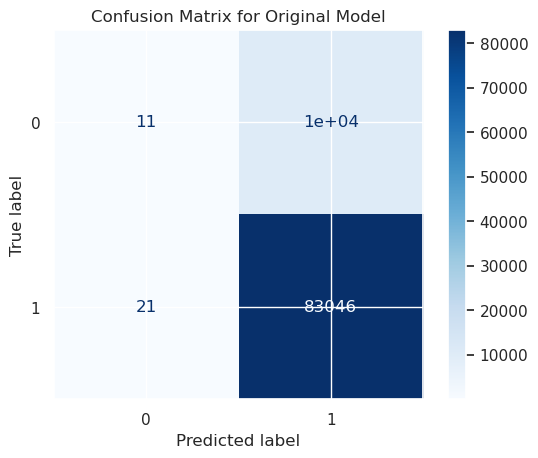

In [174]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the outcomes on the test dataset using the original model
y_pred_original = xgb_model.predict(inputs_test)

# Calculate the confusion matrix
cm = confusion_matrix(loan_data_targets_test, y_pred_original)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Original Model')
plt.show()

In [175]:
# Extract TN, FP, FN, TP
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix for the Original Model:")
print(cm)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

Confusion Matrix for the Original Model:
[[   11 10179]
 [   21 83046]]
True Negatives (TN): 11
False Positives (FP): 10179
False Negatives (FN): 21
True Positives (TP): 83046


In [176]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)


In [177]:
# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(inputs_train, loan_data_targets_train)

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Fit the model using the oversampled training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict the outcomes on the test dataset
y_pred = xgb_model.predict(inputs_test)

In [178]:
print (X_train_resampled.shape)
print (y_train_resampled.shape)
print (inputs_test.shape)
print (loan_data_targets_test.shape)

(664500, 104)
(664500,)
(93257, 104)
(93257,)


In [179]:
# Calculate the accuracy
accuracy = accuracy_score(loan_data_targets_test, y_pred)
# Calculate the precision
precision = precision_score(loan_data_targets_test, y_pred)
# Calculate the recall
recall = recall_score(loan_data_targets_test, y_pred)
# Calculate the F1 score
f1 = f1_score(loan_data_targets_test, y_pred)

# Display the performance metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.86
Precision: 0.90
Recall: 0.95
F1 Score: 0.92


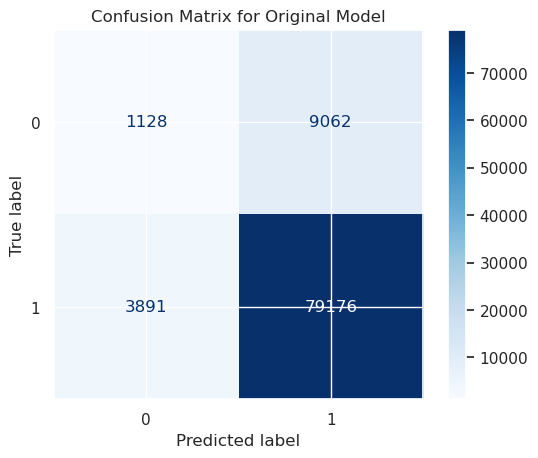

In [180]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the outcomes on the test dataset using the original model
y_pred = xgb_model.predict(inputs_test)

# Calculate the confusion matrix
cm = confusion_matrix(loan_data_targets_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Original Model')
plt.show()

In [181]:
# Get feature importance
feature_importances = xgb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

                                 Feature  Importance
41                       int_rate__9_548    0.039085
34                mths_since_issue_d__38    0.028168
19          addr_state_KS_SC_CO_VT_AK_MS    0.027116
16                      addr_state_WI_MT    0.023079
10          addr_state_OK_TN_MO_LA_MD_NC    0.022176
20          addr_state_WV_NH_WY_DC_ME_ID    0.021954
83                  annual_inc_120K_140K    0.021135
80                    annual_inc_80K_90K    0.020545
8                       addr_state_NM_VA    0.019710
82                  annual_inc_100K_120K    0.018692
13             addr_state_AR_MI_PA_OH_MN    0.018610
14             addr_state_RI_MA_DE_SD_IN    0.018412
18                      addr_state_IL_CT    0.018161
81                   annual_inc_90K_100K    0.017556
47   mths_since_earliest_cr_line_248_270    0.016723
88                          dti_7_7_10_5    0.016623
93                           dti_22_4_35    0.016477
45   mths_since_earliest_cr_line_141_164    0.

In [182]:
# Define a threshold for important features
threshold = 0.005

# Filter features by importance threshold
important_features_df = feature_importance_df[feature_importance_df['Importance'] >= threshold]

print("Important features based on threshold:")
print(important_features_df)

Important features based on threshold:
                                 Feature  Importance
41                       int_rate__9_548    0.039085
34                mths_since_issue_d__38    0.028168
19          addr_state_KS_SC_CO_VT_AK_MS    0.027116
16                      addr_state_WI_MT    0.023079
10          addr_state_OK_TN_MO_LA_MD_NC    0.022176
20          addr_state_WV_NH_WY_DC_ME_ID    0.021954
83                  annual_inc_120K_140K    0.021135
80                    annual_inc_80K_90K    0.020545
8                       addr_state_NM_VA    0.019710
82                  annual_inc_100K_120K    0.018692
13             addr_state_AR_MI_PA_OH_MN    0.018610
14             addr_state_RI_MA_DE_SD_IN    0.018412
18                      addr_state_IL_CT    0.018161
81                   annual_inc_90K_100K    0.017556
47   mths_since_earliest_cr_line_248_270    0.016723
88                          dti_7_7_10_5    0.016623
93                           dti_22_4_35    0.016477
45   mt

In [183]:
# List of important features based on threshold
important_features = important_features_df['Feature'].tolist()

In [184]:
# Subset the training and test data to only include important features
X_train_important = X_train_resampled[important_features]
X_test_important = inputs_test[important_features]

In [185]:
# Fit the model using the important features from the oversampled training data
xgb_model.fit(X_train_important, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [186]:
# Predict the outcomes on the test dataset using important features
y_pred_important = xgb_model.predict(X_test_important)

In [187]:
# Calculate the performance metrics for the model using important features
accuracy_important = accuracy_score(loan_data_targets_test, y_pred_important)
precision_important = precision_score(loan_data_targets_test, y_pred_important)
recall_important = recall_score(loan_data_targets_test, y_pred_important)
f1_important = f1_score(loan_data_targets_test, y_pred_important)

# Display the performance metrics for the model using important features
print(f'Important Features - Accuracy: {accuracy_important:.2f}')
print(f'Important Features - Precision: {precision_important:.2f}')
print(f'Important Features - Recall: {recall_important:.2f}')
print(f'Important Features - F1 Score: {f1_important:.2f}')

Important Features - Accuracy: 0.83
Important Features - Precision: 0.90
Important Features - Recall: 0.91
Important Features - F1 Score: 0.91


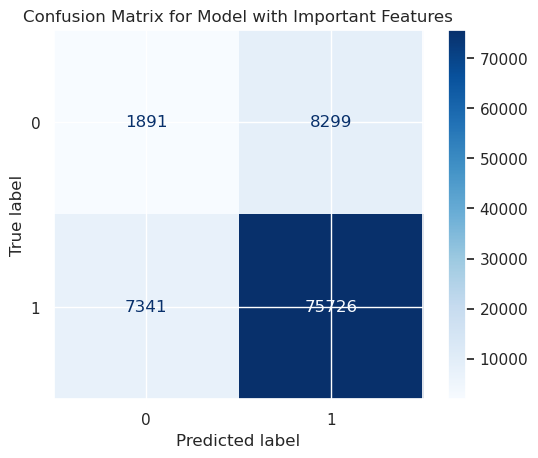

In [188]:
# Plot the confusion matrix for the model using important features
cm_important = confusion_matrix(loan_data_targets_test, y_pred_important)
disp_important = ConfusionMatrixDisplay(confusion_matrix=cm_important)
disp_important.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Model with Important Features')
plt.show()

In [189]:
print (X_train_important.shape)
print (y_train_resampled.shape)
print (X_test_important.shape)
print (loan_data_targets_test.shape)

(664500, 72)
(664500,)
(93257, 72)
(93257,)


In [213]:
# Save the PD model

pickle.dump(xgb_model, open('pd_xgb_model.sav', 'wb'))

In [190]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [191]:
# Initialize the classifiers
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)

In [192]:
# Create the ensemble model using voting classifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('gbm', gbm_model)
], voting='soft')  # 'soft' voting uses predicted probabilities

In [193]:
# Fit the ensemble model using the oversampled training data
ensemble_model.fit(X_train_important, y_train_resampled)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_typ...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...)),
                             ('gbm',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

In [194]:
# Predict the outcomes on the test dataset using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_important)

In [195]:
# Calculate the performance metrics for the ensemble model
accuracy_ensemble = accuracy_score(loan_data_targets_test, y_pred_ensemble)
precision_ensemble = precision_score(loan_data_targets_test, y_pred_ensemble)
recall_ensemble = recall_score(loan_data_targets_test, y_pred_ensemble)
f1_ensemble = f1_score(loan_data_targets_test, y_pred_ensemble)

In [196]:
# Display the performance metrics for the ensemble model
print(f'Ensemble Model - Accuracy: {accuracy_ensemble:.2f}')
print(f'Ensemble Model - Precision: {precision_ensemble:.2f}')
print(f'Ensemble Model - Recall: {recall_ensemble:.2f}')
print(f'Ensemble Model - F1 Score: {f1_ensemble:.2f}')

Ensemble Model - Accuracy: 0.84
Ensemble Model - Precision: 0.90
Ensemble Model - Recall: 0.92
Ensemble Model - F1 Score: 0.91


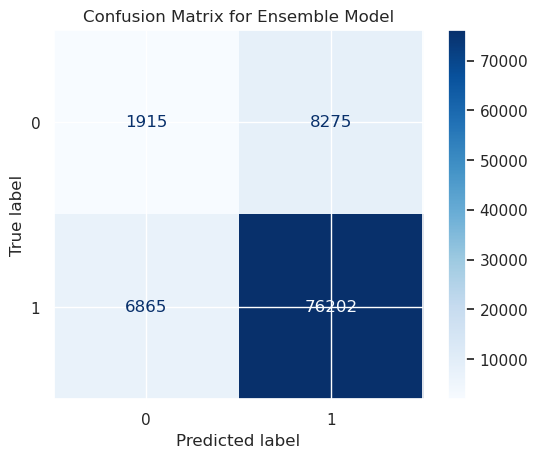

In [197]:
# Plot the confusion matrix for the ensemble model
cm_ensemble = confusion_matrix(loan_data_targets_test, y_pred_ensemble)
disp_ensemble = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble)
disp_ensemble.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Ensemble Model')
plt.show()


# Save the trained ensemble model to a file
with open('ensemble_model.pkl', 'wb') as file:
    pickle.dump(ensemble_model, file)

print("Ensemble model saved successfully.")

In [198]:
# Save the PD model

pickle.dump(ensemble_model, open('pd_ensemble_model.sav', 'wb'))

# PD Model Validation (Test)

In [199]:
# Predict the probability outcomes on the test dataset using the ensemble model
y_pred_proba_ensemble = ensemble_model.predict_proba(X_test_important)

In [200]:
#Check
print (y_pred_proba_ensemble.shape)
y_pred_proba_ensemble

(93257, 2)


array([[0.25809099, 0.74190901],
       [0.34080413, 0.65919587],
       [0.18036269, 0.81963731],
       ...,
       [0.07800521, 0.92199479],
       [0.1041173 , 0.8958827 ],
       [0.20163667, 0.79836333]])

In [201]:
# Extract both classes' probabilities
prob_of_default = y_pred_proba_ensemble[:, 0]  # Probabilities of 'default'
prob_of_non_default = y_pred_proba_ensemble[:, 1]  # Probabilities of 'non-default'

In [202]:
# Print the shapes and sample probabilities
print("Shape of probability array:", prob_of_default.shape)
print("Sample probabilities of default (first 10 samples):", prob_of_default[:10])
print("Sample probabilities of non-default (first 10 samples):", prob_of_non_default[:10])


Shape of probability array: (93257,)
Sample probabilities of default (first 10 samples): [0.25809099 0.34080413 0.18036269 0.15430361 0.11847001 0.25856887
 0.60175392 0.32363123 0.10488658 0.05866706]
Sample probabilities of non-default (first 10 samples): [0.74190901 0.65919587 0.81963731 0.84569639 0.88152999 0.74143113
 0.39824609 0.67636877 0.89511342 0.94133294]


In [203]:
# Create a separate DataFrame to hold probabilities along with actual test labels
# Assume loan_data_targets_test is correctly indexed to match the order in prob_of_default
loan_data_targets_test.reset_index(drop=True, inplace=True)  # Reset index if necessary
df_actual_predicted_probs = pd.DataFrame({
    'Actual': loan_data_targets_test,
    'Prob_of_Non_Default': prob_of_non_default
})

# Display the shape to ensure it matches expected output and preview the DataFrame
print("DataFrame shape:", df_actual_predicted_probs.shape)
print(df_actual_predicted_probs.head())

DataFrame shape: (93257, 2)
   Actual  Prob_of_Non_Default
0       1             0.741909
1       1             0.659196
2       1             0.819637
3       1             0.845696
4       1             0.881530


In [204]:
tr=0.5
# if predicted prob > 0.5 then predict 1 else predict 0

df_actual_predicted_probs['Predicted'] = np.where(df_actual_predicted_probs['Prob_of_Non_Default'] > tr, 1, 0)

In [205]:
df_actual_predicted_probs.shape

(93257, 3)

In [206]:
df_actual_predicted_probs.head()

Actual  Prob_of_Non_Default  Predicted
0       1             0.741909          1
1       1             0.659196          1
2       1             0.819637          1
3       1             0.845696          1
4       1             0.881530          1

Confusion Matrix:
[[ 1915  8275]
 [ 6865 76202]]
Accuracy: 0.84


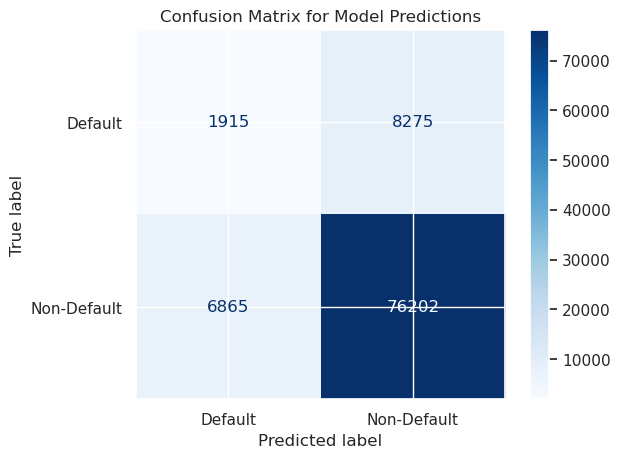

In [207]:
# Calculate the confusion matrix
cm = confusion_matrix(df_actual_predicted_probs['Actual'], df_actual_predicted_probs['Predicted'])

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy from the confusion matrix
total_predictions = cm.sum()
correct_predictions = cm[0, 0] + cm[1, 1]  # TP + TN
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.2f}")

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Default', 'Non-Default'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Model Predictions')
plt.show()

In [208]:
tr=0.7
# if predicted prob > 0.5 then predict 1 else predict 0

df_actual_predicted_probs['Predicted'] = np.where(df_actual_predicted_probs['Prob_of_Non_Default'] > tr, 1, 0)

Confusion Matrix:
[[ 5654  4536]
 [26852 56215]]
Accuracy: 0.66


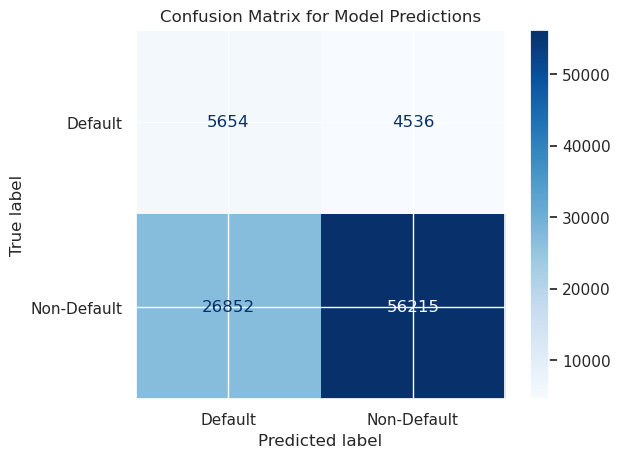

In [209]:
# Calculate the confusion matrix
cm = confusion_matrix(df_actual_predicted_probs['Actual'], df_actual_predicted_probs['Predicted'])

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy from the confusion matrix
total_predictions = cm.sum()
correct_predictions = cm[0, 0] + cm[1, 1]  # TP + TN
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.2f}")

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Default', 'Non-Default'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Model Predictions')
plt.show()

In [210]:
tr=0.9
# if predicted prob > 0.5 then predict 1 else predict 0

df_actual_predicted_probs['Predicted'] = np.where(df_actual_predicted_probs['Prob_of_Non_Default'] > tr, 1, 0)

Confusion Matrix:
[[ 9900   290]
 [72690 10377]]
Accuracy: 0.22


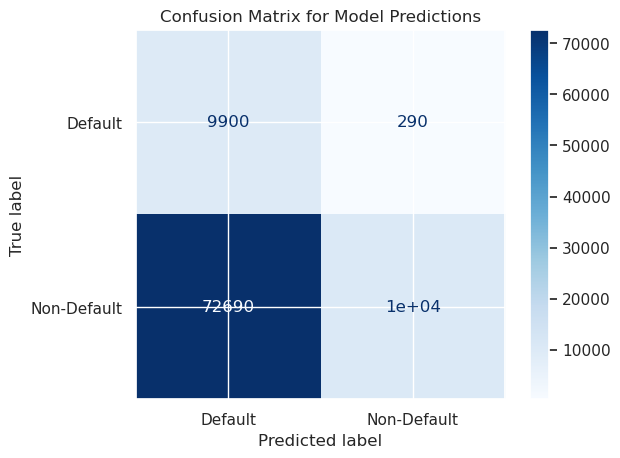

In [211]:
# Calculate the confusion matrix
cm = confusion_matrix(df_actual_predicted_probs['Actual'], df_actual_predicted_probs['Predicted'])

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy from the confusion matrix
total_predictions = cm.sum()
correct_predictions = cm[0, 0] + cm[1, 1]  # TP + TN
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.2f}")

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Default', 'Non-Default'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Model Predictions')
plt.show()

In [223]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(loan_data_targets_test, prob_of_non_default)

optimal_rate = tpr - fpr
optimal_idx = np.argmax(optimal_rate)
best_thresh = thresholds[optimal_idx]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.756612


In [220]:
tr=0.756612
# if predicted prob > 0.5 then predict 1 else predict 0

df_actual_predicted_probs['Predicted'] = np.where(df_actual_predicted_probs['Prob_of_Non_Default'] > tr, 1, 0)

Confusion Matrix:
[[ 7128  3062]
 [37515 45552]]
Accuracy: 0.56


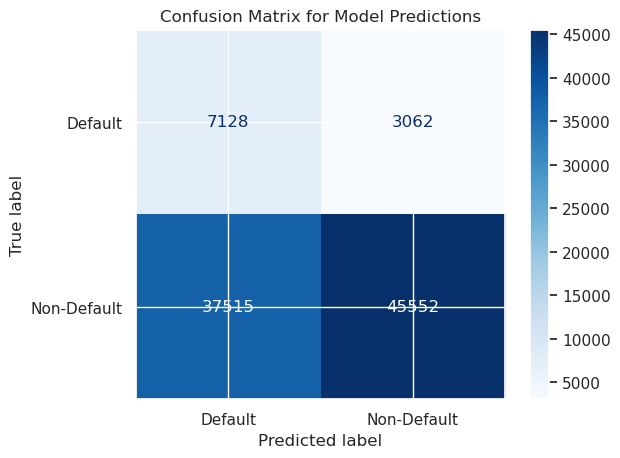

In [221]:
# Calculate the confusion matrix
cm = confusion_matrix(df_actual_predicted_probs['Actual'], df_actual_predicted_probs['Predicted'])

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy from the confusion matrix
total_predictions = cm.sum()
correct_predictions = cm[0, 0] + cm[1, 1]  # TP + TN
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.2f}")

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Default', 'Non-Default'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Model Predictions')
plt.show()

In [222]:
from sklearn.metrics import roc_auc_score, accuracy_score

# List of thresholds to test
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.756612, 0.8, 0.9]

# Dictionary to store AUC ROC scores and accuracy
metrics_scores = {}

# Calculate AUC ROC and accuracy for each threshold
for tr in thresholds:
    # Binarize the predictions based on the threshold
    predicted_classes = np.where(df_actual_predicted_probs['Prob_of_Non_Default'] > tr, 1, 0)
    
    # Compute AUC ROC
    auc_roc = roc_auc_score(df_actual_predicted_probs['Actual'], predicted_classes)
    # Compute accuracy
    accuracy = accuracy_score(df_actual_predicted_probs['Actual'], predicted_classes)
    
    # Store the AUC ROC score and accuracy
    metrics_scores[f'Threshold {tr}'] = {'AUC ROC': auc_roc, 'Accuracy': accuracy}

# Print the results
for threshold, scores in metrics_scores.items():
    print(f"{threshold}: AUC ROC = {scores['AUC ROC']:.2f}, Accuracy = {scores['Accuracy']:.2f}")


Threshold 0.3: AUC ROC = 0.51, Accuracy = 0.88
Threshold 0.4: AUC ROC = 0.53, Accuracy = 0.87
Threshold 0.5: AUC ROC = 0.55, Accuracy = 0.84
Threshold 0.6: AUC ROC = 0.59, Accuracy = 0.78
Threshold 0.7: AUC ROC = 0.62, Accuracy = 0.66
Threshold 0.756612: AUC ROC = 0.62, Accuracy = 0.56
Threshold 0.8: AUC ROC = 0.61, Accuracy = 0.47
Threshold 0.9: AUC ROC = 0.55, Accuracy = 0.22
